# <span style="color:#ffffff; font-size: 1%;">[1] ⌚ Introduction</span>

<div style=" border-bottom: 8px solid #006400; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #FFD700; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color:#006400; padding: 20px 20px;"><strong>[1] Introduction </strong></span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://snworksceo.imgix.net/tsn/ea740df1-1174-4e2c-a1ce-1bf702e597dc.sized-1000x1000.jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

Understanding human behavior through wearable sensors is like giving technology a sixth sense 👀⌚. In this competition, we’re diving into the fascinating world of **Body-Focused Repetitive Behaviors (BFRBs)** — things like hair pulling or skin picking — which can be both **physically harmful and psychologically distressing**. Powered by a custom-built wrist-worn device called **Helios**, which goes beyond traditional IMUs by including **temperature** 🌡️ and **proximity sensors** 📏, the goal is to develop models that can **distinguish BFRB-like gestures from everyday actions** like drinking from a bottle or adjusting glasses.

This challenge isn't just about building accurate models — it’s about exploring whether richer sensor data truly leads to better insights, and ultimately helping shape **smarter mental health tools** 💡🧠.

## <span style="color:#ffffff; font-size: 1%;">[1.1] Problem Statement</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> <strong>[1.1] 👋 Problem Statement</strong></span></b>

Detecting **Body-Focused Repetitive Behaviors (BFRBs)** like hair pulling or skin picking is a complex challenge due to their subtle and highly individual nature 🤯. These behaviors can easily resemble everyday gestures like scratching or adjusting glasses, making accurate detection from sensor data especially tricky 🧠. Leveraging data from **IMU, thermopile, and time-of-flight sensors** worn on the wrist, this competition aims to develop models that can **reliably distinguish BFRB-like gestures** from non-BFRB ones ✋. Solving this problem is key to building smarter, more responsive wearable devices that support **mental health monitoring** and **early intervention tools** 🩺📱.

## <span style="color:#ffffff; font-size: 1%;">[1.2] Goal</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> <strong>[1.2] 🎯 Goal</strong></span></b>

The primary goal of this competition is to **develop a predictive model** that can accurately identify **body-focused repetitive behaviors (BFRBs)** — such as hair pulling or skin picking — from **sensor data** collected via a wrist-worn device. More specifically, the model should:

* 🔍 **Distinguish between BFRB-like gestures and non-BFRB-like everyday gestures** using time-series data from **inertial, temperature, and proximity sensors**.
* 🧠 **Classify the specific type of BFRB gesture**, helping differentiate among multiple similar yet clinically distinct behaviors.
* ⚙️ Evaluate the **added value of thermopile and time-of-flight sensors** compared to IMU data alone, guiding future development of **wearable mental health tools**.

## <span style="color:#ffffff; font-size: 1%;">[1.3] Dataset Description</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> <strong>[1.3] 🗂 Dataset Description</strong></span></b>

#### 📂 **Training & Test Data** 🏋️‍♀️🔍

* **\[`train.csv`] / \[`test.csv`]**
  Time-series data from sequences containing sensor readings.
  Key columns:

  * `sequence_id` 🆔: Unique identifier for each gesture sequence
  * `sequence_counter` 🔢: Row index within the sequence
  * `acc_[x/y/z]` 🎢: IMU linear acceleration
  * `rot_[w/x/y/z]` 🔄: IMU orientation (quaternion)
  * `thm_[1-5]` 🌡️: Thermopile temperatures from 5 sensors
  * `tof_[1-5]_v[0-63]` 📏: 8x8 Time-of-Flight sensor pixel readings (distance)


> **Data Hierarchy Overview:**
> Each subject performs multiple gesture sequences. Every `sequence_id` represents a single gesture trial, captured as a time-series where each row (indexed by `sequence_counter`) records synchronized sensor readings at a specific timestamp.
> 
> Subject<br>
>└── sequence_id (1 per gesture trial)<br>
>  ├── sequence_counter = 0 → sensor readings (acc_x, acc_y, ..., tof_5_v63)<br>
>  ├── sequence_counter = 1 → sensor readings<br>
>  ├── ...<br>
>  └── sequence_counter = N → sensor readings#
>
> **Data structure**: Each sequence_id = Transition → Pause → Gesture
  
✅ **Train-only Columns**:

* `gesture`: Actual gesture label
* `behavior`: Phase of the gesture (`Transition`, `Pause`, `Gesture`)
* `sequence_type`: Target vs Non-Target gesture
* `orientation`: Subject's physical posture
* `subject`: Participant ID

---

#### 🧑‍🔬 **Demographic Data** 👶🧑‍🦱

* **\[`train_demographics.csv`] / \[`test_demographics.csv`]**
  Participant-level metadata to enhance modeling:

  * `age`, `sex`, `adult_child`, `handedness` ✋
  * `height_cm`, `shoulder_to_wrist_cm`, `elbow_to_wrist_cm` 📏

---

#### 🚨 **Note:**

* Some sequences may contain missing sensor values due to hardware communication failures.
* The “test.csv” is NOT the hidden test used for leaderboard scoring. Submissions run through our server API, and the true hold-out is kept entirely hidden—so it’s best NOT to analyze that public snippet for final model decisions.


## <span style="color:#ffffff; font-size: 1%;">[1.4] Evaluation Metrics</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> <strong>[1.4] 🧪 Evaluation Metrics</strong></span></b>

Your model's performance in this competition will be measured using an **averaged F1-score** across two classification tasks:

1. **Binary Classification F1-Score** 🟦
   Distinguish between **BFRB-like** (target) and **non-BFRB-like** (non-target) gestures.

2. **Multi-Class F1-Score** 🧩
   Classify the **specific gesture** performed. All non-BFRB gestures are collapsed into a single `non_target` class.

#### 🔢 Final Score Calculation

The **final score** is the **average** of:

* Binary F1-Score
* Macro F1-Score (across all gestures, with non-BFRBs collapsed into one class)

$$
\text{Final Score} = \frac{1}{2} \left( \text{F1}_{\text{binary}} + \text{F1}_{\text{macro}} \right)
$$

---

#### 📘 Metric Details

#### 1. **Binary F1-Score**

This measures how well your model distinguishes **target vs. non-target**:

$$
\text{F1}_{\text{binary}} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Where:

* **Precision** = $\frac{\text{TP}}{\text{TP} + \text{FP}}$
* **Recall** = $\frac{\text{TP}}{\text{TP} + \text{FN}}$

---

##### 2. **Macro F1-Score (Multi-Class)**

This averages the F1-score **equally across all gesture classes**, including one collapsed `non_target` class:

$$
\text{F1}_{\text{macro}} = \frac{1}{C} \sum_{i=1}^{C} \text{F1}_i
$$

Where:

* $C$ is the number of gesture classes (target gestures + 1 non-target class)
* $\text{F1}_i$ is the F1-score for class $i$, computed the same way as binary F1 but per class


## <span style="color:#ffffff; font-size: 1%;">[1.5] Background</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> <strong>[1.5] 👁️ Background </strong></span></b>

Below is a focused breakdown of each sensor type in the Helios device, what data columns they produce, and how to interpret them in the context of distinguishing BFRB vs. non-BFRB gestures:

🔽 [Jump to : Multivariate Sensor Feature Visualisations (📝 EDA)](#EDA-MFR-MSFA)  

<div style="text-align: center;"><img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F16459904%2F0ff03ac3f2c2d2bf9e0eafc0135b52c2%2FScreenshot%202025-08-11%20at%203.59.48PM.png?generation=1754921390651163&alt=media" alt="helios" style="width:300px;"/></div>

#### 📌 **1. IMU (Inertial Measurement Unit)**

#### ⏩ What It Is

* Combines an **accelerometer**, **gyroscope**, and **magnetometer** into one module (BNO080/BNO085).
* Provides both **linear acceleration** and **3D orientation** data in real time.

#### ⏩ Data Columns

* `acc_x`, `acc_y`, `acc_z` : Linear acceleration along each Cartesian axis (m/s²).
* `rot_w`, `rot_x`, `rot_y`, `rot_z` : Quaternion components representing 3D rotation/orientation.

#### ⏩ How to Interpret

* **Acceleration (acc\_\*)**
  • High‐magnitude spikes indicate rapid movement (e.g., hand snapping toward face).
  • Low, steady values imply minimal motion (e.g., pause phase).
* **Rotation (rot\_\*)**
  • Quaternion → convert to a scalar “angle” (θ = 2·arccos(rot\_w)) to measure wrist twist.
  • Sudden changes in quaternion values signal abrupt orientation shifts (e.g., flipping wrist).

**Use Case**:
* Distinguish “hair pulling” vs. “air gesturing” by examining peak acceleration combined with rotation angles.
* IMU alone tells you “how fast” and “which way” the wrist moved.

---

#### 📌 **2. Thermopile Sensors (thm\_1 … thm\_5)**

#### ⏩ What They Are

* Five **infrared temperature sensors** placed around the watch face (MLX90632).
* Measure **skin‐adjacent heat** without contact.

#### ⏩ Data Columns

* `thm_1`, `thm_2`, `thm_3`, `thm_4`, `thm_5`
  • Temperature in °C detected by each thermopile element at that timestamp.

#### ⏩ How to Interpret

* **High value (\~30–38 °C)** → sensor is close to warm skin (e.g., cheek, neck).
* **Lower value (\~20–25 °C)** → sensor points into open air (no direct skin contact).
* A **rising trend** in a particular thermopile channel indicates the wrist approaching a warm body part.
* If all thermopiles stay near ambient, the gesture likely doesn’t involve skin contact (e.g., “wave hello,” “write name in air”).

**Use Case**:
* **Confirm contact**: Distinguish “pinch skin” vs. “pinch knee” by comparing which thermopiles heat up first.
* **Segment phases**: During “Transition → Pause → Gesture,” temperature spikes mark the moment of contact.

---

#### **📌 3. Time-of-Flight (ToF) Sensors (tof\_1\_v0 … tof\_5\_v63)**

#### ⏩ What They Are

* Five **8×8 pixel** Time-of-Flight (VL53L7CX) arrays integrated on the watch.
* Measure **distance** (0–254 units, with –1 meaning “no echo”) from each pixel to the nearest object.

#### ⏩ Data Columns

* For each sensor i (1–5), 64 columns:
  • `tof_1_v0, tof_1_v1, …, tof_1_v63` (and similarly for `tof_2_…`, etc.)
  • Each `v0–v63` represents one pixel’s raw distance reading.

#### ⏩ How to Interpret

* **Value ≈ 0–50** → object (e.g., skin) is very close (few centimeters).
* **Value ≈ 100–200** → object is farther away (10–20 cm).
* **–1** → no reflection detected (empty space).
* **Spatial pattern**: An 8×8 grid of low values forms an “image” of a curved surface (e.g., cheek).
* **Temporal change**: A cluster of pixels transitioning from –1 → low distance marks the instant of contact.

**Use Case**:
* **Gesture signature**: “Cheek-pinch” produces a localized 8×8 hot spot near the face; “drink from cup” shows a different shape.
* **Phase detection**: Before contact, most pixels read –1; on contact, a contiguous block of low values appears.

---

#### **📝 Overall Interpretation Guidelines**

🔽 [Jump to : Multivariate Sensor Feature Visualisations (📝 EDA)](#EDA-MFR-MSFA)  

1. **IMU (acc + rot)** → “How fast” and “which direction” the wrist is moving.
2. **Thermopile (thm\_)** → confirms “skin contact vs. air,” pinpointing *where* on the body the hand moves.
3. **ToF (tof\_)** → fine‐grained 8×8 proximity “image,” revealing the shape/distance of the approached object.

By **combining**:

* IMU → identifies motion pattern,
* Thermopile → detects contact/heat,
* ToF → maps spatial proximity,

you can robustly differentiate between subtle BFRB gestures (e.g., hair‐pull, skin‐pinch) and innocuous movements (e.g., wave, drink). Train your model to exploit these complementary signals rather than relying on IMU alone.

# <span style="color:#ffffff; font-size: 1%;">[2] 🔍 Dataset Overview</span>
### <span style="color:#ffffff; font-size: 1%;">DO</span>

<div style=" border-bottom: 8px solid #006400; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #FFD700; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color:#006400; padding: 20px 20px;"><strong>[2] 📊🔍 Dataset Overview </strong></span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://snworksceo.imgix.net/tsn/ea740df1-1174-4e2c-a1ce-1bf702e597dc.sized-1000x1000.jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

🔽 [Jump to : 🤔💭 Thinking Out Loud!! (Dataset Overview Insights)](#TOU-DO)  

## <span style="color:#ffffff; font-size: 1%;">[2.1] Loading the Datasets & Libraries</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> <strong>[2.1] Loading the Datasets & Libraries</strong></span></b>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np

In [3]:
# Load the datasets
train_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv")
train_dem_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/train_demographics.csv")
test_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/test.csv")
test_dem_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/test_demographics.csv")

## <span style="color:#ffffff; font-size: 1%;">[2.2] Initial Observations or Trends</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> <strong>[2.2] Initial Observations or Trends</strong></span></b>

In [4]:
datasets = {
    "Train Data": train_df,
    "Train Demographics": train_dem_df,
    "Test Data": test_df,
    "Test Demographics": test_dem_df,
}

# Print shapes
for name, df in datasets.items():
    num_rows, num_cols = df.shape
    print(f"{name}:")
    print(f"  Number of Rows: {num_rows}")
    print(f"  Number of Columns: {num_cols}\n")

Train Data:
  Number of Rows: 574945
  Number of Columns: 341

Train Demographics:
  Number of Rows: 81
  Number of Columns: 8

Test Data:
  Number of Rows: 107
  Number of Columns: 336

Test Demographics:
  Number of Rows: 2
  Number of Columns: 8



In [5]:
# Count duplicate rows in train_df
train_duplicates = train_df.duplicated().sum()

# Count duplicate rows in test_df
test_duplicates = test_df.duplicated().sum()

# Count duplicate rows in train_dem_df (optional)
train_dem_duplicates = train_dem_df.duplicated().sum()

# Count duplicate rows in test_dem_df (optional)
test_dem_duplicates = test_dem_df.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_df: {train_duplicates}")
print(f"Number of duplicate rows in test_df: {test_duplicates}")
print(f"Number of duplicate rows in train_dem_df: {train_dem_duplicates}")
print(f"Number of duplicate rows in test_dem_df: {test_dem_duplicates}")

Number of duplicate rows in train_df: 0
Number of duplicate rows in test_df: 0
Number of duplicate rows in train_dem_df: 0
Number of duplicate rows in test_dem_df: 0


In [6]:
display(train_df.head(2))
display(train_dem_df.head(2))

row_id sequence_type sequence_id  sequence_counter      subject  \
0  SEQ_000007_000000        Target  SEQ_000007                 0  SUBJ_059520   
1  SEQ_000007_000001        Target  SEQ_000007                 1  SUBJ_059520   

                       orientation                                   behavior  \
0  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
1  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   

        phase             gesture     acc_x  ...  tof_5_v54  tof_5_v55  \
0  Transition  Cheek - pinch skin  6.683594  ...       -1.0       -1.0   
1  Transition  Cheek - pinch skin  6.949219  ...       -1.0       -1.0   

   tof_5_v56  tof_5_v57  tof_5_v58  tof_5_v59  tof_5_v60  tof_5_v61  \
0       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
1       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   

   tof_5_v62  tof_5_v63  
0       -1.0       -1.0  
1       -1.0       -1.0  

[2 rows x 341 columns]

subject  adult_child  age  sex  handedness  height_cm  \
0  SUBJ_000206            1   41    1           1      172.0   
1  SUBJ_001430            0   11    0           1      167.0   

   shoulder_to_wrist_cm  elbow_to_wrist_cm  
0                    50               25.0  
1                    51               27.0

In [7]:
display(test_df.head(2))
display(test_dem_df.head(2))

row_id sequence_id  sequence_counter      subject     acc_x  \
0  SEQ_000001_000000  SEQ_000001                 0  SUBJ_055840  9.039062   
1  SEQ_000001_000001  SEQ_000001                 1  SUBJ_055840  9.421875   

      acc_y     acc_z     rot_w     rot_x     rot_y  ...  tof_5_v54  \
0  5.261719  0.800781  0.367188 -0.397400 -0.629028  ...       97.0   
1  3.460938 -1.113281  0.353882 -0.507141 -0.652710  ...      175.0   

   tof_5_v55  tof_5_v56  tof_5_v57  tof_5_v58  tof_5_v59  tof_5_v60  \
0       87.0      206.0       -1.0      195.0       -1.0       -1.0   
1      158.0       -1.0       -1.0       -1.0       -1.0       -1.0   

   tof_5_v61  tof_5_v62  tof_5_v63  
0       -1.0      111.0       -1.0  
1      211.0      187.0      178.0  

[2 rows x 336 columns]

subject  adult_child  age  sex  handedness  height_cm  \
0  SUBJ_016452            1   25    1           1      165.0   
1  SUBJ_055840            0   13    0           1      177.0   

   shoulder_to_wrist_cm  elbow_to_wrist_cm  
0                    52               23.0  
1                    52               27.0

#### **[2.2.1] Participant & Contextual Features**

In [8]:
# Define excluded prefixes
excluded_prefixes = ('acc_', 'rot_', 'thm_', 'tof_')

def filtered_describe(df, name):
    # Exclude sensor columns
    filtered_cols = [col for col in df.columns 
                     if not col.startswith(excluded_prefixes) and pd.api.types.is_numeric_dtype(df[col])]
    
    # Describe and style
    print(f'\n➡️ Description of numerical columns in {name}')
    return df[filtered_cols].describe().T.style.background_gradient(cmap='viridis')

# Only analyze train sets!
display(filtered_describe(train_df, "train_df"))
display(filtered_describe(train_dem_df, "train_dem_df"))


➡️ Description of numerical columns in train_df



➡️ Description of numerical columns in train_dem_df


In [9]:
# Define prefixes to exclude
excluded_prefixes = ('acc_', 'rot_', 'thm_', 'tof_')
sensor_cols = [col for col in train_df.columns if not col.startswith(excluded_prefixes)]

# Sensor Data Summary for TRAIN
missing_sensor_train = pd.DataFrame({
    'Feature': sensor_cols,
    '[TRAIN] Missing Count': train_df[sensor_cols].isnull().sum().values,
    '[TRAIN] Missing %': (train_df[sensor_cols].isnull().sum().values / len(train_df)) * 100
})

unique_sensor_train = pd.DataFrame({
    'Feature': sensor_cols,
    'Unique Values [TRAIN]': train_df[sensor_cols].nunique().values
})

dtypes_sensor = pd.DataFrame({
    'Feature': sensor_cols,
    'Data Type': train_df[sensor_cols].dtypes.values
})

# Merge all summaries (NO test set)
sensor_summary = missing_sensor_train \
    .merge(unique_sensor_train, on='Feature', how='left') \
    .merge(dtypes_sensor, on='Feature', how='left')

# Display styled DataFrame (mask NaNs just for styling)
styled_df = sensor_summary.fillna(0)
styled_df.style.background_gradient(cmap='viridis')

In [10]:
# Demographic columns (no exclusions)
dem_cols = train_dem_df.columns

# Missing values in train demographics
missing_demo_train = pd.DataFrame({
    'Feature': dem_cols,
    '[TRAIN DEMO] Missing Count': train_dem_df[dem_cols].isnull().sum().values,
    '[TRAIN DEMO] Missing %': (train_dem_df[dem_cols].isnull().sum().values / len(train_dem_df)) * 100
})

# Unique value counts in train demographics
unique_demo_train = pd.DataFrame({
    'Feature': dem_cols,
    'Unique Values [TRAIN DEMO]': train_dem_df[dem_cols].nunique().values
})

# Data types
dtypes_demo = pd.DataFrame({
    'Feature': dem_cols,
    'Data Type': train_dem_df[dem_cols].dtypes.values
})

# Merge summaries (train only)
demo_summary = (
    missing_demo_train
    .merge(unique_demo_train, on='Feature', how='left')
    .merge(dtypes_demo, on='Feature', how='left')
)

# Display styled summary
demo_summary.style.background_gradient(cmap='viridis')

#### **[2.2.2] Sensor-Based Features**

In [11]:
import pandas as pd

# Sensor column groups (use train_df only)
acc_cols = [col for col in train_df.columns if col.startswith('acc_')]
rot_cols = [col for col in train_df.columns if col.startswith('rot_')]
thm_cols = [col for col in train_df.columns if col.startswith('thm_')]
tof_cols = [col for col in train_df.columns if col.startswith('tof_')]

# Helper function for summary stats (train only)
def sensor_summary(df, cols, name, dataset_name):
    summary = pd.DataFrame({
        'Feature': cols,
        f'{dataset_name} Missing %': df[cols].isnull().mean().values * 100,
        f'{dataset_name} Min': df[cols].min().values,
        f'{dataset_name} Max': df[cols].max().values,
        f'{dataset_name} Mean': df[cols].mean().values,
        f'{dataset_name} Std': df[cols].std().values
    })
    summary.insert(0, 'Sensor', name)
    return summary

# Compute train summary for each sensor type
def train_sensor_summary(train_df, sensor_cols_dict):
    all_train = []
    for sensor_name, cols in sensor_cols_dict.items():
        all_train.append(sensor_summary(train_df, cols, sensor_name, 'Train'))
    train_summary = pd.concat(all_train, ignore_index=True)
    return train_summary

# Sensor groups to process
sensor_cols_dict = {
    'acc': acc_cols,
    'rot': rot_cols,
    'thm': thm_cols,
    'tof': tof_cols
}

# Run train summary only
sensor_train_summary = train_sensor_summary(train_df, sensor_cols_dict)

# Show sensor-level averages for train
summary_by_group = sensor_train_summary.groupby('Sensor').mean(numeric_only=True)

# Display styled table
summary_by_group.style.background_gradient(cmap='viridis')

> 📝 The above code computes summary statistics (min, max, mean, std) and missing value percentages for each sensor > > > channel in the training set, grouped by sensor type (acc, rot, thm, tof).
> While this is useful for a quick overview of sensor data quality, it only considers null values.
> For Time-of-Flight (TOF) sensors, missingness is also encoded as -1 (no reflection detected), so a deeper analysis is > needed to capture functional missingness in addition to nulls.
>
> Furthermore, because the hidden test set is expected to have IMU values mostly filled and other sensors (thm, tof) missing for ~50% of sequences, it’s important to:
> - Analyse missingness patterns thoroughly for each sensor type.
> - Pay special attention to IMU-only cases to plan separate preprocessing or model routing.

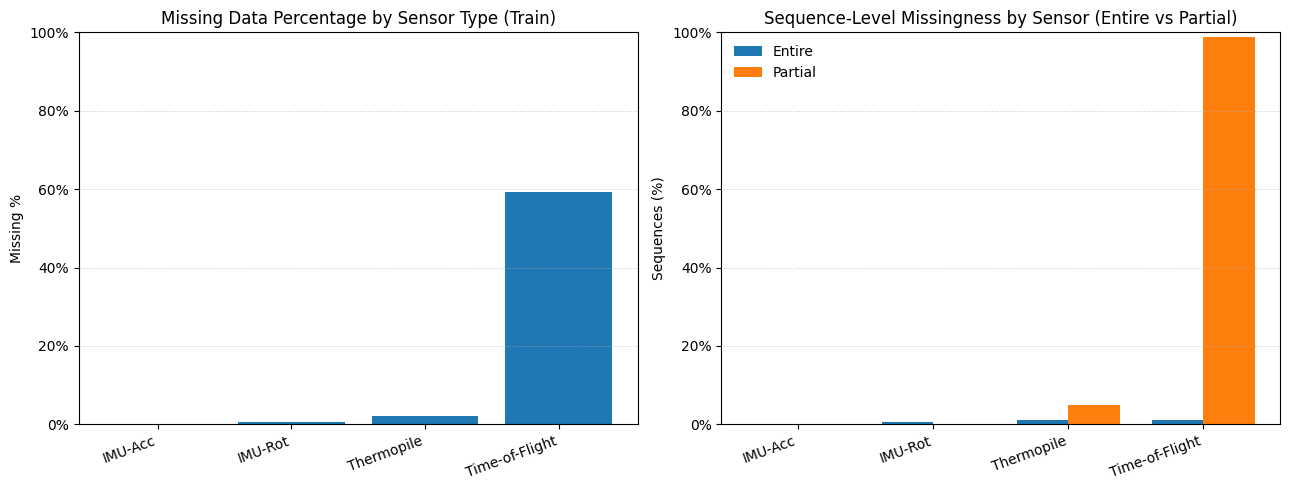

In [12]:
# ── Missingness Summary & Sequence-Level Missingness (polished) ─────────────────
import warnings; warnings.filterwarnings("ignore")
from matplotlib.ticker import PercentFormatter

# Work on a copy (do not affect originals)
df = train_df.copy()

# Sensor groups
acc_cols = [c for c in df.columns if c.startswith('acc_')]
rot_cols = [c for c in df.columns if c.startswith('rot_')]
thm_cols = [c for c in df.columns if c.startswith('thm_')]
tof_cols = [c for c in df.columns if c.startswith('tof_')]

sensor_groups = {
    'IMU-Acc': acc_cols,
    'IMU-Rot': rot_cols,
    'Thermopile': thm_cols,
    'Time-of-Flight': tof_cols
}

# Helper: overall missing % for a set of columns (treat TOF -1 as missing)
def compute_missing_percentages(df, cols, special_value=None):
    if special_value is None:
        miss = df[cols].isnull()
    else:
        miss = df[cols].isnull() | (df[cols] == special_value)
    return float(miss.mean().mean() * 100.0)

# 1) Dataset-level missing % per sensor type
missing_per_sensor = {}
for name, cols in sensor_groups.items():
    if name == 'Time-of-Flight':
        missing_per_sensor[name] = compute_missing_percentages(df, cols, special_value=-1)
    else:
        missing_per_sensor[name] = compute_missing_percentages(df, cols)

# 2) Sequence-level missingness: % sequences entirely vs partially missing per sensor
sequence_results = []
seq_groups = df.groupby('sequence_id')

for name, cols in sensor_groups.items():
    if name == 'Time-of-Flight':
        miss_mask = df[cols].isnull() | (df[cols] == -1)
    else:
        miss_mask = df[cols].isnull()

    # Entirely missing for a sequence: for every row in that sequence, all columns are missing
    entirely_missing = seq_groups.apply(lambda x: miss_mask.loc[x.index].all(axis=1).all())
    entire_pct = entirely_missing.mean() * 100.0

    # Partially missing: some missing anywhere in the sequence, but not entirely missing
    any_missing = seq_groups.apply(lambda x: miss_mask.loc[x.index].any(axis=1).any())
    partially_missing = any_missing & (~entirely_missing)
    partial_pct = partially_missing.mean() * 100.0

    sequence_results.append((name, 'Entire', entire_pct))
    sequence_results.append((name, 'Partial', partial_pct))

seq_df = pd.DataFrame(sequence_results, columns=['Sensor', 'MissingType', 'Percent'])
seq_pivot = (
    seq_df.pivot(index='Sensor', columns='MissingType', values='Percent')
          .reindex(list(sensor_groups.keys()))
          .fillna(0.0)
)

# ── Visualization: two panels side-by-side ─────────────────────────────────────
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))

# Panel A: Dataset-level missing %
ax1.bar(list(missing_per_sensor.keys()), list(missing_per_sensor.values()))
ax1.set_title('Missing Data Percentage by Sensor Type (Train)', fontsize=12)
ax1.set_ylabel('Missing %')
ax1.yaxis.set_major_formatter(PercentFormatter())
ax1.set_xticklabels(missing_per_sensor.keys(), rotation=20, ha='right')
ax1.grid(axis='y', linestyle=':', linewidth=0.7, alpha=0.7)
ax1.set_ylim(0, 100)

# Panel B: Sequence-level missingness (grouped bars)
sensors = seq_pivot.index.tolist()
x = np.arange(len(sensors))
width = 0.38

entire_vals = seq_pivot['Entire'].to_numpy()
partial_vals = seq_pivot['Partial'].to_numpy()

ax2.bar(x - width/2, entire_vals, width, label='Entire')
ax2.bar(x + width/2, partial_vals, width, label='Partial')

ax2.set_xticks(x)
ax2.set_xticklabels(sensors, rotation=20, ha='right')
ax2.set_ylabel('Sequences (%)')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_title('Sequence-Level Missingness by Sensor (Entire vs Partial)', fontsize=12)
ax2.grid(axis='y', linestyle=':', linewidth=0.7, alpha=0.7)
ax2.set_ylim(0, 100)
ax2.legend(frameon=False)

plt.tight_layout()
plt.show()

> 📝 The above code first computes missing value percentages for each sensor type in the training set, treating TOF’s -1 > as missing. It then visualizes:
> Missing % by sensor type (dataset level)
> Sequence-level missingness, distinguishing:
> - Entire missing sequences for that sensor (no valid readings at all)
> - Partial missing sequences (some valid readings present)


### <span style="color:#ffffff; font-size: 1%;">TOU-DO</span>

<div style="background-color:#E8F8F5; border-left:8px solid #1ABC9C; padding:20px; border-radius:8px; font-size:14px; color:#000000;"> 
  <h3 style="font-size: 18px; margin-bottom: 10px;"><strong>🤔💭 Thinking Out Loud!! (Dataset Overview Insights)</strong></h3>
    <hr> 
  <p>Okay, let me walk through what I’m seeing…</p>
  <p>⏩ <strong>Total Rows & Identifiers:</strong>  
  Total number of rows is 574,945, and the number of unique <code>row_id</code> values is the same — meaning each row has a unique ID independent of sequence.</p>
  <p>⏩ <strong>Sequence Counts:</strong>  
  There are 8,151 unique <code>sequence_id</code> values. While that may sound like a lot, it’s relatively small when considering modeling needs.</p>
  <p>⏩ <strong>Sequence Lengths:</strong>  
  <code>sequence_counter</code> ranges from 0 to 699 with a mean around 43, directly indicating the average sequence length.</p>
  <p>⏩ <strong>Participants:</strong>  
  Ages range from 10 to 53 years, with a mean of 21. The <code>adult_child</code> column flags participants as either adults or children (2 unique values).</p>
  <p>⏩ <strong>Missingness Overview (Train):</strong>  
  - Around 60% of total rows have missing TOF values (marked as <code>-1</code>).  
  - Roughly 3–4% of rows have missing Thermopile values.  
  - At the sequence level, all sequences contain some <code>-1</code> for TOF, but only a very small percentage have the entire sequence missing for TOF.  
  - For Thermopile, about 5–8% of sequences are partially missing, and only around 2–3% have the entire sequence missing.  
  - IMU sensors have minimal to no missing values.</p>
  <p>⏩ <strong>Hidden Test Composition:</strong>  
  The competition specifies that in the hidden test set, about half the sequences will have only IMU data populated, while thermopile and time-of-flight readings will be entirely missing. This is to test whether models can still perform well without the extra sensors.</p>

  <p>🌟 <strong>Additional Strategic Reflections:</strong>  
  Although the dataset is large in row count, it’s relatively small in unique sequences, so robust feature engineering and careful cross-validation are more important than massive ensemble modeling.</p>

  <p>🚨 Important Note: <strong>The “test.csv” you see locally is NOT the hidden test used for leaderboard scoring. Submissions run through the server API, and the actual hold-out set remains fully hidden — avoid basing final model choices solely on the public snippet.</strong></p>
</div>  

# <span style="color:#ffffff; font-size: 1%;">[3] 💡 Exploratory Data Analysis (EDA)</span>
### <span style="color:#ffffff; font-size: 1%;">EDA</span>

<div style=" border-bottom: 8px solid #006400; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #FFD700; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color:#006400; padding: 20px 20px;"><strong>[3] 📈💡EDA </strong></span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://snworksceo.imgix.net/tsn/ea740df1-1174-4e2c-a1ce-1bf702e597dc.sized-1000x1000.jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

🔽 [Jump to : 🤔💭 Thinking Out Loud!! (📝 Non Target Key Insights)](#TOL-NTKI)  
🔽 [Jump to : 🤔💭 Thinking Out Loud!! (📝 Target Key Insights)](#TOL-TKI)  

## <span style="color:#ffffff; font-size: 1%;">[3.1] Numerical Feature Distribution Analysis (Univariate Analysis)</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> [3.1] Numerical Feature Distribution Analysis <strong>(Univariate Analysis)</strong></span></b>

#### **[3.1.1] Participant & Contextual Features**

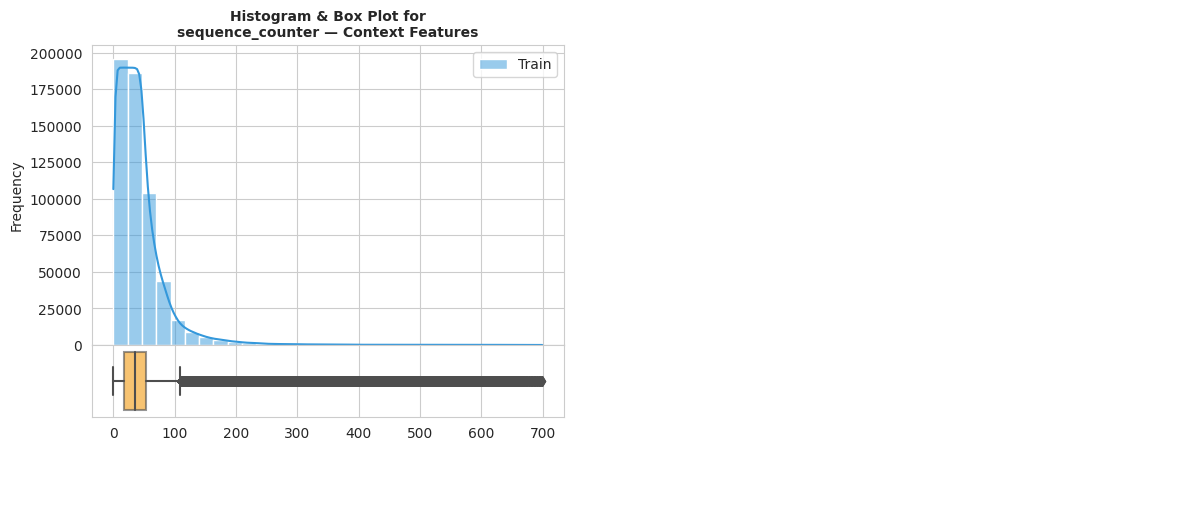

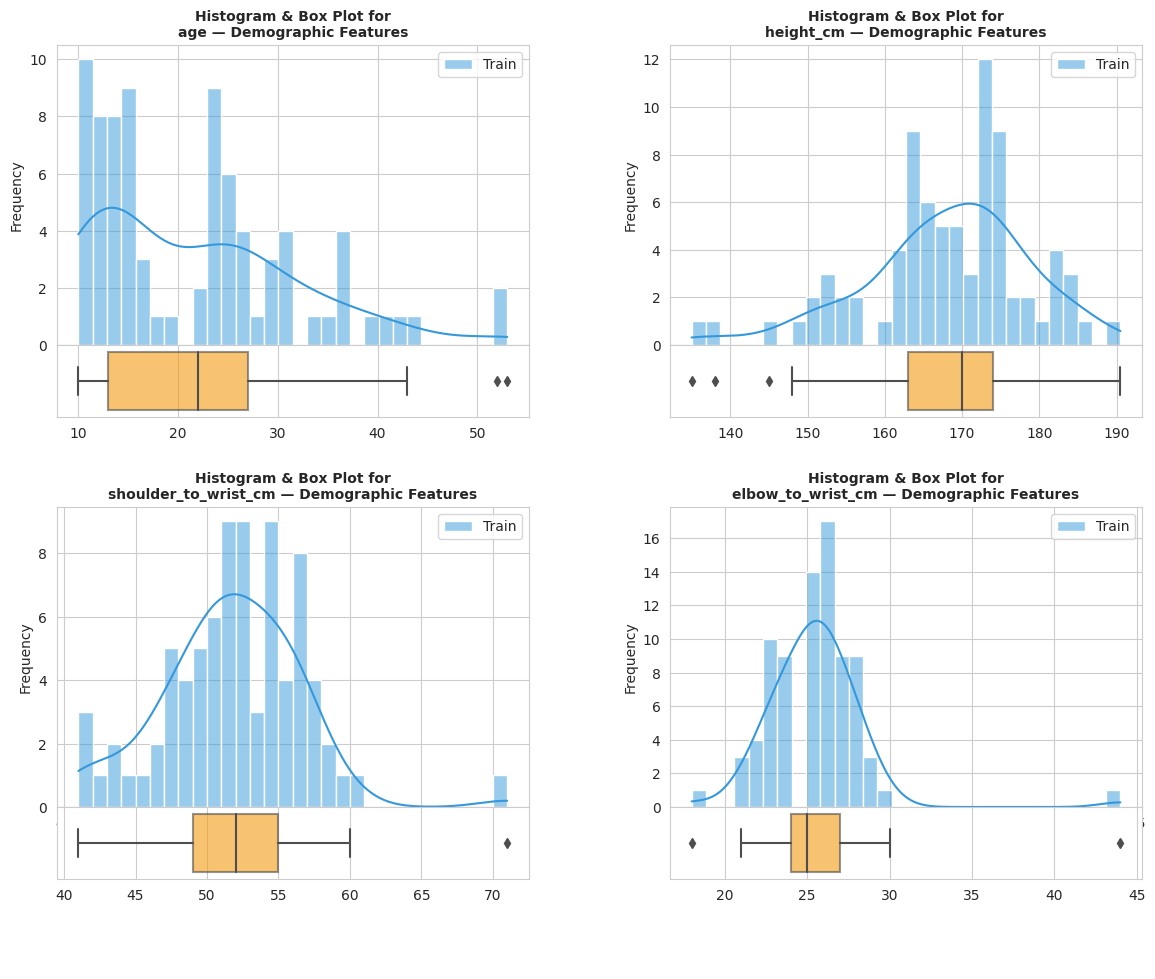

In [13]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="Glyph.*missing from current font")

# Custom colors
hist_color = '#3498db'
box_color = '#f39c12'

# Filtering setup
sensor_prefixes = ('acc_', 'rot_', 'thm_', 'tof_')
categorical_columns = ['phase', 'behavior', 'orientation', 'sequence_type',
                       'adult_child', 'sex', 'handedness']
target_columns = ['gesture']

def get_numerical_variables(df, excluded_prefixes, excluded_columns):
    return [col for col in df.columns 
            if pd.api.types.is_numeric_dtype(df[col])
            and not col.startswith(excluded_prefixes)
            and col not in excluded_columns]

# Prepare train datasets
train_main = train_df.copy()
train_demo = train_dem_df.copy()
train_main['Dataset'] = 'Train'
train_demo['Dataset'] = 'Train'

main_data = train_main
demo_data = train_demo

main_numeric_vars = get_numerical_variables(main_data, sensor_prefixes, categorical_columns)
demo_numeric_vars = get_numerical_variables(demo_data, (), categorical_columns)

def create_combined_feature_plots(vars_list, data, dataset_label):
    sns.set_style('whitegrid')
    
    n_vars = len(vars_list)
    n_cols = 2
    n_features_per_row = n_cols
    n_feature_rows = math.ceil(n_vars / n_features_per_row)
    n_plot_rows = n_feature_rows * 3  # hist, box, spacer

    fig, axes = plt.subplots(
        n_plot_rows,
        n_cols,
        figsize=(14, n_feature_rows * 6),
        gridspec_kw={
            'height_ratios': [5, 1.2, 1.5] * n_feature_rows,
            'hspace': 0,
            'wspace': 0.3
        }
    )

    for idx, var in enumerate(vars_list):
        feature_row = idx // n_cols
        col = idx % n_cols
        base_row = feature_row * 3

        # Histogram
        ax_hist = axes[base_row, col]
        sns.histplot(data=data, x=var, kde=True, bins=30, color=hist_color, ax=ax_hist, label='Train')
        ax_hist.set_xlabel(var)
        ax_hist.set_ylabel("Frequency")
        ax_hist.set_title(
            f"Histogram & Box Plot for\n{var} — {dataset_label}",
            fontweight='bold',
            fontsize=10
        )
        ax_hist.legend()

        # Boxplot
        ax_box = axes[base_row + 1, col]
        sns.boxplot(data=data, x=var, palette=[box_color], ax=ax_box, boxprops=dict(facecolor=box_color, alpha=0.6))
        ax_box.set_xlabel("")
        ax_box.set_ylabel("")
        ax_box.set_title("")

        # Spacer row — turn off
        axes[base_row + 2, col].axis('off')

    # Hide unused axes
    total_cells = n_feature_rows * n_cols
    if n_vars < total_cells:
        for j in range(n_vars, total_cells):
            feature_row = j // n_cols
            col = j % n_cols
            base_row = feature_row * 3
            axes[base_row, col].axis('off')
            axes[base_row + 1, col].axis('off')
            axes[base_row + 2, col].axis('off')

    plt.show()

# Plot context features
create_combined_feature_plots(main_numeric_vars, main_data, "Context Features")

# Plot demographic features
create_combined_feature_plots(demo_numeric_vars, demo_data, "Demographic Features")

# Cleanup
train_main.drop('Dataset', axis=1, inplace=True)
train_demo.drop('Dataset', axis=1, inplace=True)

#### **[3.1.2] Sensor-Based Features**

In [14]:
import numpy as np
import pandas as pd

# 1) Copy train and test so we don’t modify original DataFrames
train_temp = train_df.copy()
test_temp  = test_df.copy()

# 2) ACCELEROMETER: compute magnitude at each timestamp
train_temp['acc_mag'] = np.sqrt(
    train_temp['acc_x']**2 + train_temp['acc_y']**2 + train_temp['acc_z']**2
)
test_temp['acc_mag'] = np.sqrt(
    test_temp['acc_x']**2 + test_temp['acc_y']**2 + test_temp['acc_z']**2
)

# 3) ROTATION: compute “rotation angle” from quaternion w component
#    (Note: rot_w is in [-1,1], so arccos is valid. We ignore NaNs if any.)
train_temp['rot_angle'] = 2 * np.arccos(train_temp['rot_w'].clip(-1,1))
test_temp['rot_angle']  = 2 * np.arccos(test_temp['rot_w'].clip(-1,1))

# 4) Group by sequence_id and aggregate accelerometer summaries
acc_agg_funcs = {
    'acc_mag': ['mean', 'std', 'max']
}
train_acc_summary = train_temp.groupby('sequence_id').agg(acc_agg_funcs)
test_acc_summary  = test_temp.groupby('sequence_id').agg(acc_agg_funcs)

# Flatten column MultiIndex
train_acc_summary.columns = ['acc_mag_' + stat for stat in ['mean', 'std', 'max']]
test_acc_summary.columns  = ['acc_mag_' + stat for stat in ['mean', 'std', 'max']]

# 5) Group by sequence_id and aggregate rotation summaries
rot_agg_funcs = {
    'rot_angle': ['mean', 'std', 'max']
}
train_rot_summary = train_temp.groupby('sequence_id').agg(rot_agg_funcs)
test_rot_summary  = test_temp.groupby('sequence_id').agg(rot_agg_funcs)

train_rot_summary.columns = ['rot_angle_' + stat for stat in ['mean', 'std', 'max']]
test_rot_summary.columns  = ['rot_angle_' + stat for stat in ['mean', 'std', 'max']]

# 6) THERMOPILE: five sensors thm_1 … thm_5
thm_cols = [f"thm_{i}" for i in range(1, 6)]

# Define aggregation functions: mean + std
thm_agg_funcs = {col: ['mean', 'std'] for col in thm_cols}

train_thm_summary = train_temp.groupby('sequence_id').agg(thm_agg_funcs)
test_thm_summary  = test_temp.groupby('sequence_id').agg(thm_agg_funcs)

# Flatten MultiIndex columns
flattened_thm_cols = []
for sensor in thm_cols:
    for stat in ['mean','std']:
        flattened_thm_cols.append(f"{sensor}_{stat}")

train_thm_summary.columns = flattened_thm_cols
test_thm_summary.columns  = flattened_thm_cols

# 7) TIME‐OF‐FLIGHT: each sensor i has 64 pixel columns: tof_i_v0 … tof_i_v63
# We'll create one “tof_i_mean_at_ts” per timestamp, then aggregate per sequence.

def compute_tof_sequence_summary(df):
    # Initialize a dict to hold the per‐sequence DataFrames
    seq_summaries = {}

    for i in range(1, 6):
        # Build a list of columns for sensor i
        tof_cols = [f"tof_{i}_v{pix}" for pix in range(64)]
        # Replace -1 with NaN so they don't skew the mean; cast to float
        ts_grid = df[tof_cols].replace(-1, np.nan).astype(float)
        # Compute “mean across all 64 pixels” for each timestamp
        df[f"tof_{i}_mean_at_ts"] = ts_grid.mean(axis=1)
    
    # Now, group by sequence_id and compute per‐sequence mean & std of those means
    agg_dict = {f"tof_{i}_mean_at_ts": ['mean','std'] for i in range(1, 6)}
    summary = df.groupby('sequence_id').agg(agg_dict)
    # Flatten MultiIndex columns
    flat_cols = [f"tof_{i}_{stat}" for i in range(1, 6) for stat in ['mean','std']]
    summary.columns = flat_cols
    return summary

train_tof_summary = compute_tof_sequence_summary(train_temp)
test_tof_summary  = compute_tof_sequence_summary(test_temp)

# 8) Merge accel, rotation, thm, tof summaries (on sequence_id)
train_sensor_summary = (
    train_acc_summary
    .join(train_rot_summary, how='outer')
    .join(train_thm_summary, how='outer')
    .join(train_tof_summary, how='outer')
)

test_sensor_summary = (
    test_acc_summary
    .join(test_rot_summary, how='outer')
    .join(test_thm_summary, how='outer')
    .join(test_tof_summary, how='outer')
)

# 9) Add “Dataset” column so we can do box+hist side‐by‐side
train_sensor_summary['Dataset'] = 'Train'
test_sensor_summary['Dataset']  = 'Test'

# 10) Concatenate into one DataFrame for plotting
combined_sensor_summary = pd.concat(
    [train_sensor_summary, test_sensor_summary],
    axis=0
).reset_index(drop=True)

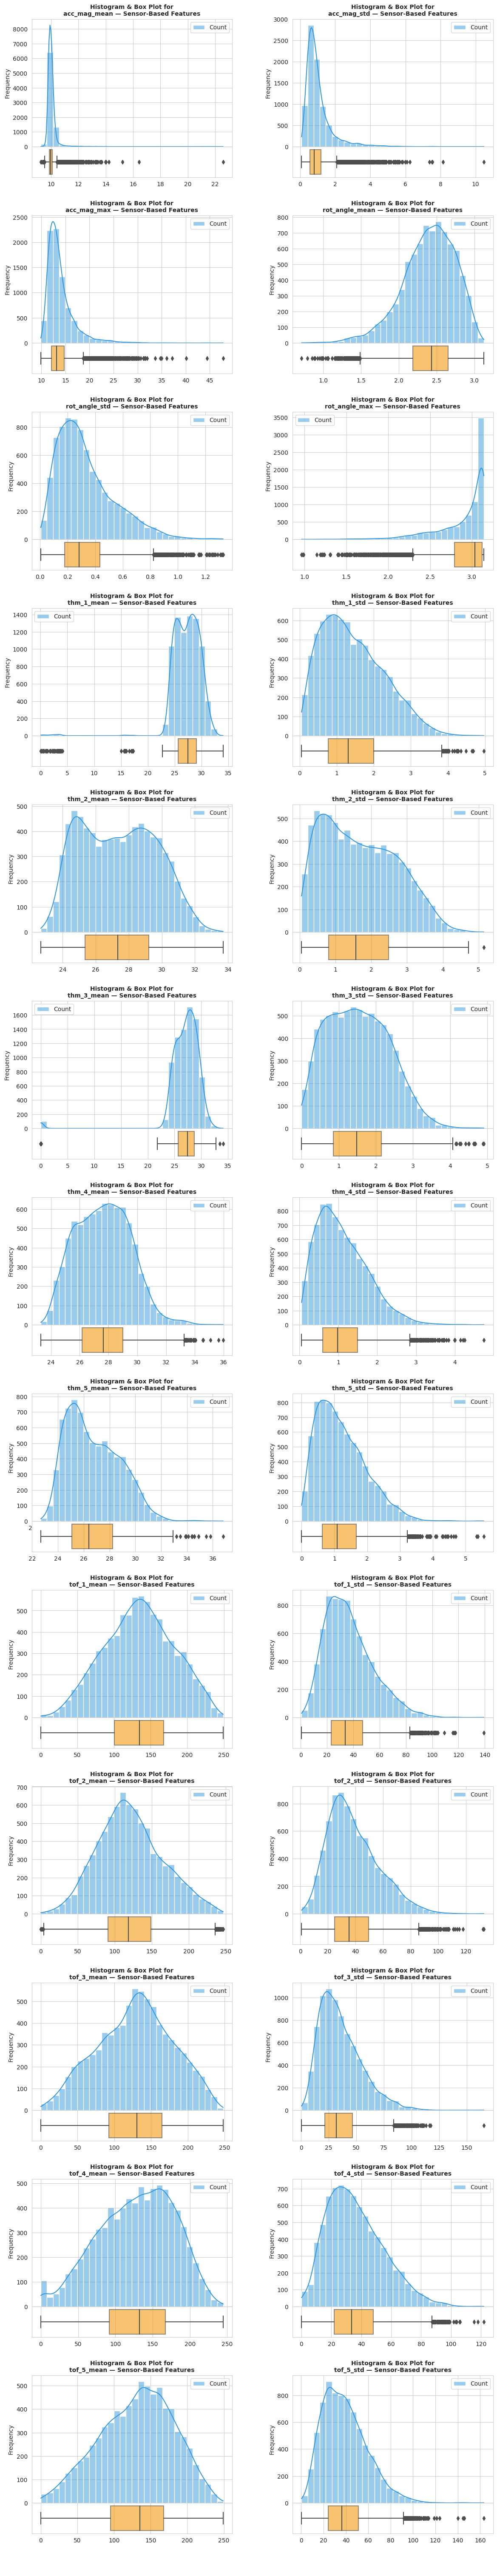

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Custom colors
hist_color = '#3498db'
box_color = '#f39c12'

# Filter to Train dataset
train_sensor_summary = combined_sensor_summary[combined_sensor_summary['Dataset'] == 'Train']

# Sensor features to plot
sensor_summary_vars = [col for col in train_sensor_summary.columns if col != 'Dataset']

def create_combined_feature_plots(vars_list, data, dataset_label):
    sns.set_style('whitegrid')
    
    n_vars = len(vars_list)
    n_cols = 2
    n_features_per_row = n_cols
    n_feature_rows = math.ceil(n_vars / n_features_per_row)

    # For each feature row: histogram, boxplot, spacer → 3 rows per feature row
    n_plot_rows = n_feature_rows * 3  # hist, box, spacer
    
    fig, axes = plt.subplots(
        n_plot_rows,
        n_cols,
        figsize=(14, n_feature_rows * 6),
        gridspec_kw={
            'height_ratios': [5, 1.2, 1.5] * n_feature_rows,
            'hspace': 0,
            'wspace': 0.3
        }
    )

    for idx, var in enumerate(vars_list):
        feature_row = idx // n_cols
        col = idx % n_cols
        base_row = feature_row * 3  # hist at base_row, box at base_row+1, spacer at base_row+2

        # Histogram
        ax_hist = axes[base_row, col]
        sns.histplot(data=data, x=var, kde=True, bins=30, color=hist_color, ax=ax_hist, label='Count')
        ax_hist.set_xlabel(var)
        ax_hist.set_ylabel("Frequency")
        ax_hist.set_title(
            f"Histogram & Box Plot for\n{var} — {dataset_label}",
            fontweight='bold',
            fontsize=10
        )
        ax_hist.legend()

        # Boxplot
        ax_box = axes[base_row + 1, col]
        sns.boxplot(data=data, x=var, palette=[box_color], ax=ax_box, boxprops=dict(facecolor=box_color, alpha=0.6))
        ax_box.set_xlabel("")
        ax_box.set_ylabel("")
        ax_box.set_title("")

        # Spacer row — turn off
        axes[base_row + 2, col].axis('off')

    # Hide any unused axes at end (only needed if odd number of features)
    total_cells = n_feature_rows * n_cols
    if n_vars < total_cells:
        for j in range(n_vars, total_cells):
            feature_row = j // n_cols
            col = j % n_cols
            base_row = feature_row * 3
            axes[base_row, col].axis('off')
            axes[base_row + 1, col].axis('off')
            axes[base_row + 2, col].axis('off')

    plt.show()

# Run the plotter
create_combined_feature_plots(sensor_summary_vars, train_sensor_summary, "Sensor-Based Features")

## <span style="color:#ffffff; font-size: 1%;">[3.2] Categorical Feature Analysis (Univariate Analysis)</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400">  [3.2] Categorical Feature Analysis <strong>(Univariate Analysis)</strong></span></b>

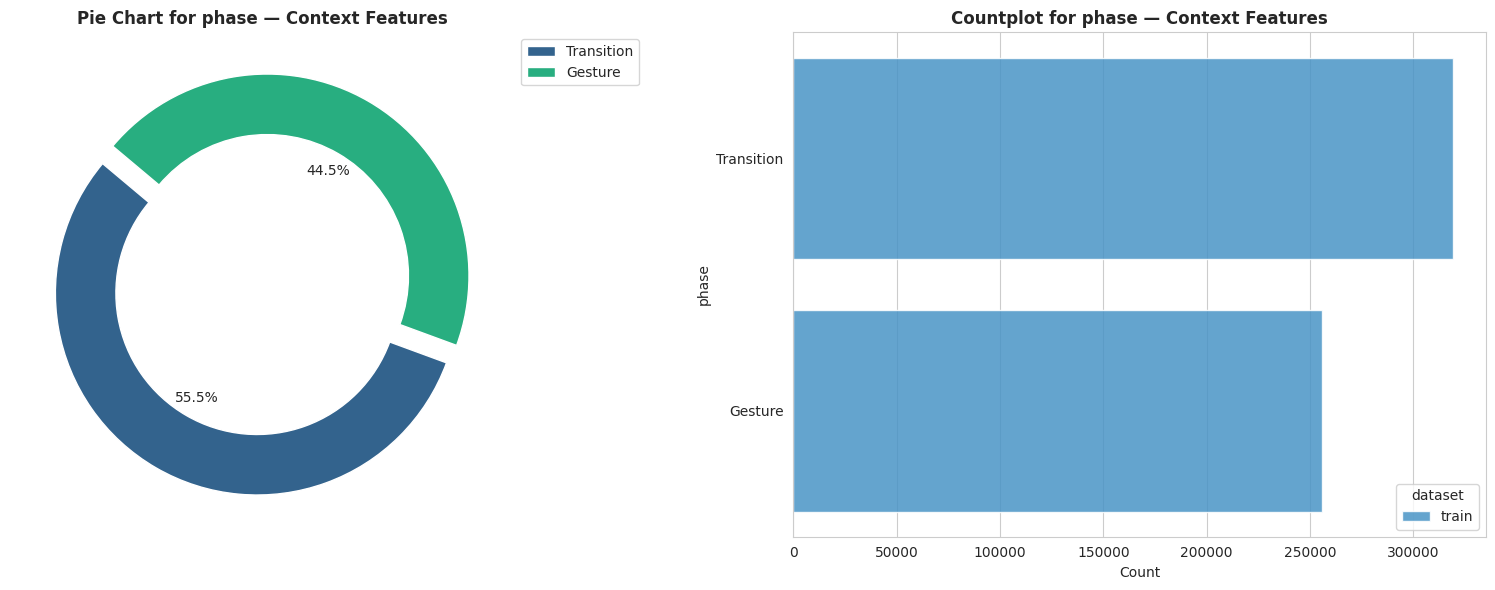

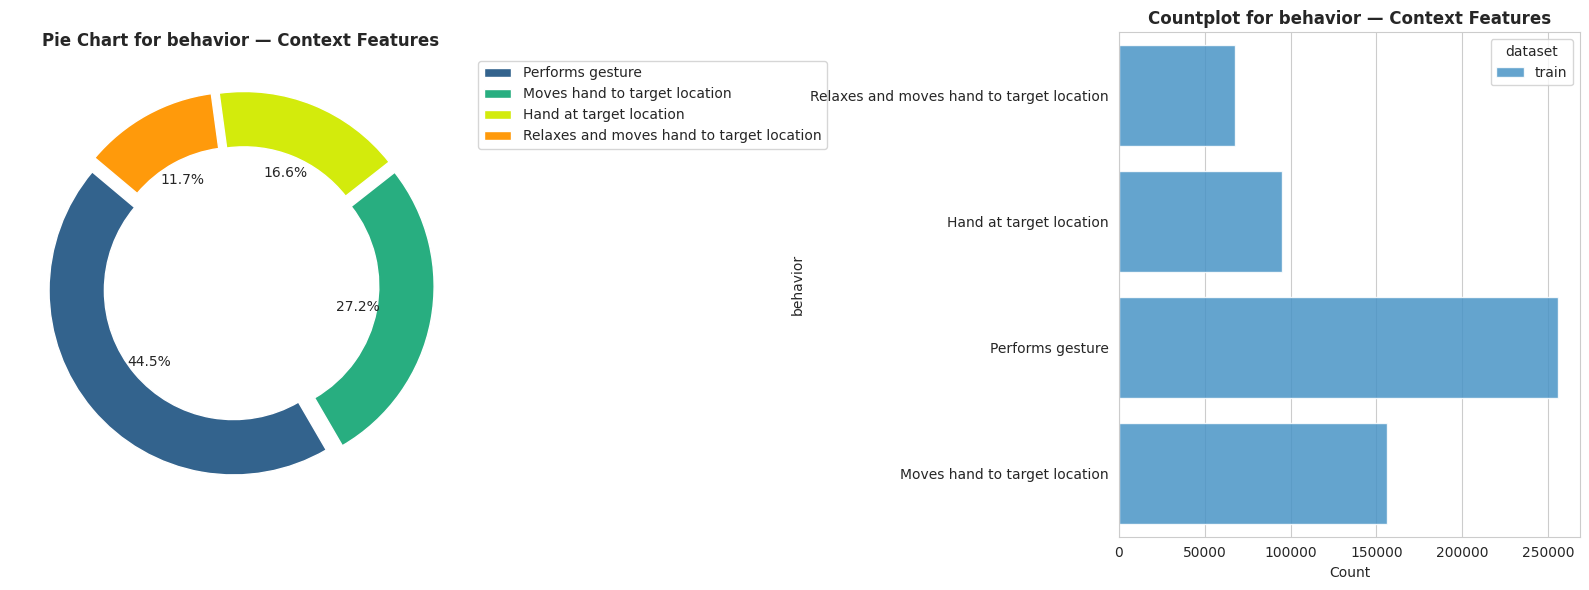

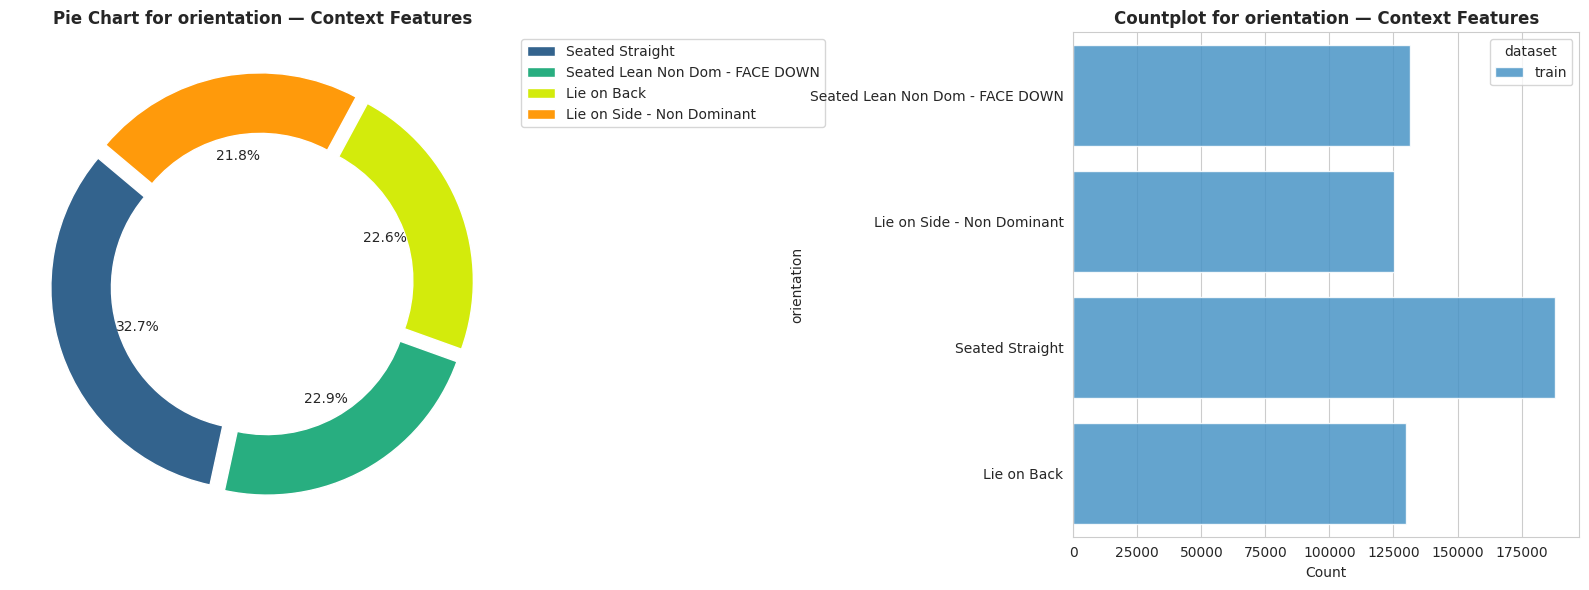

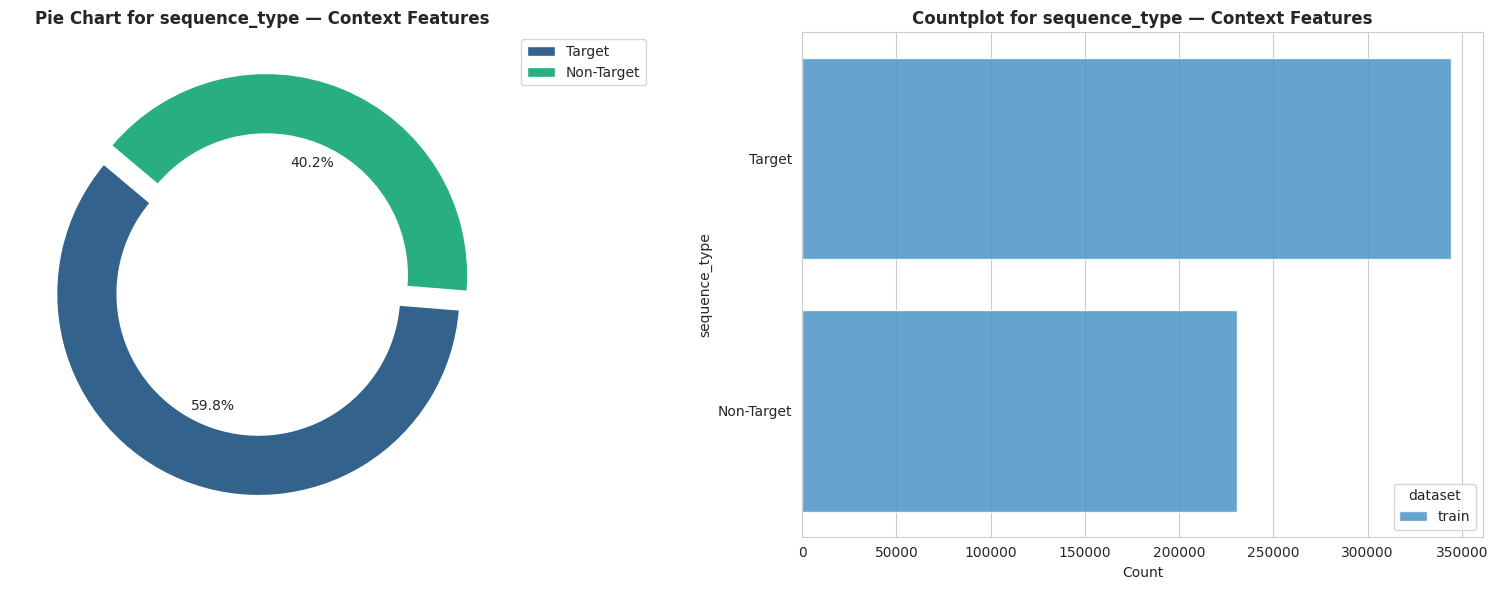

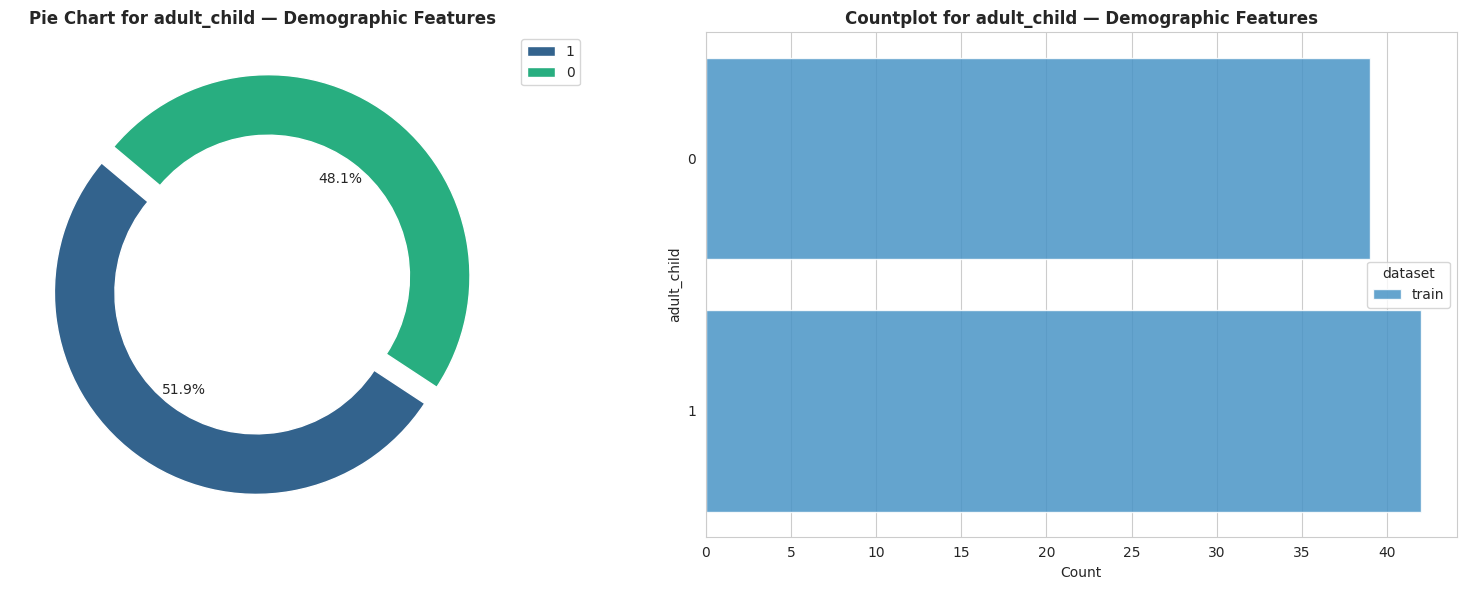

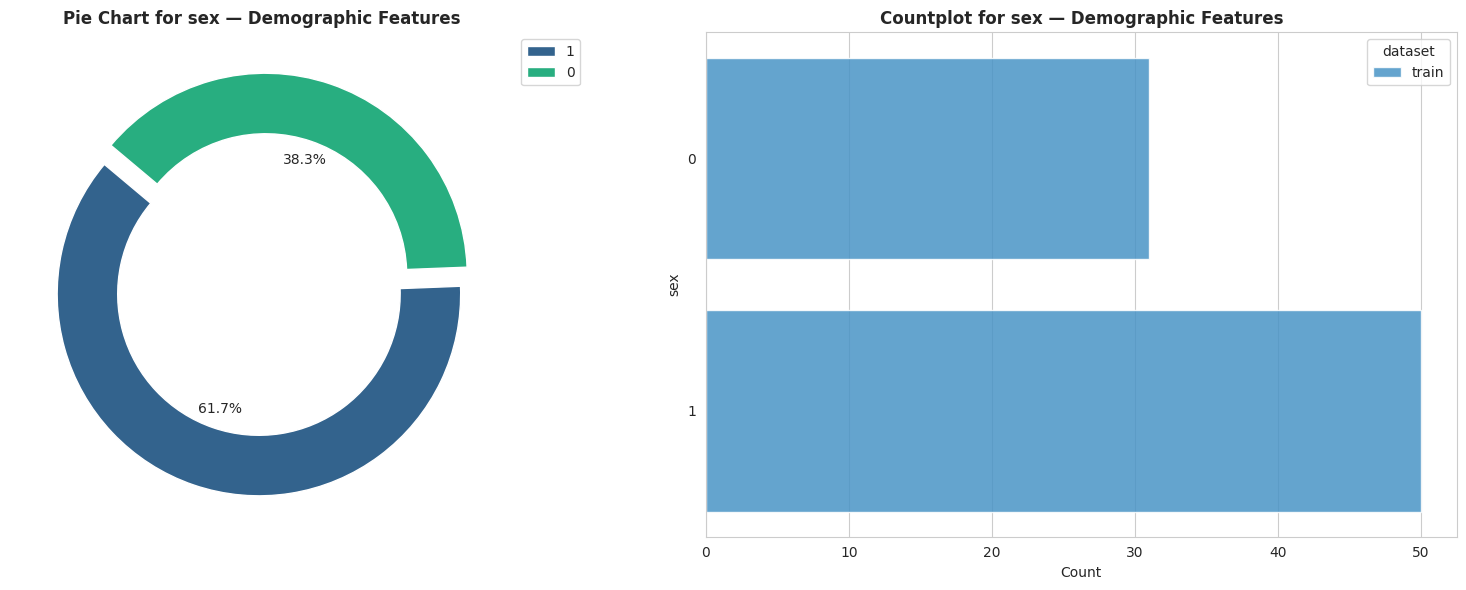

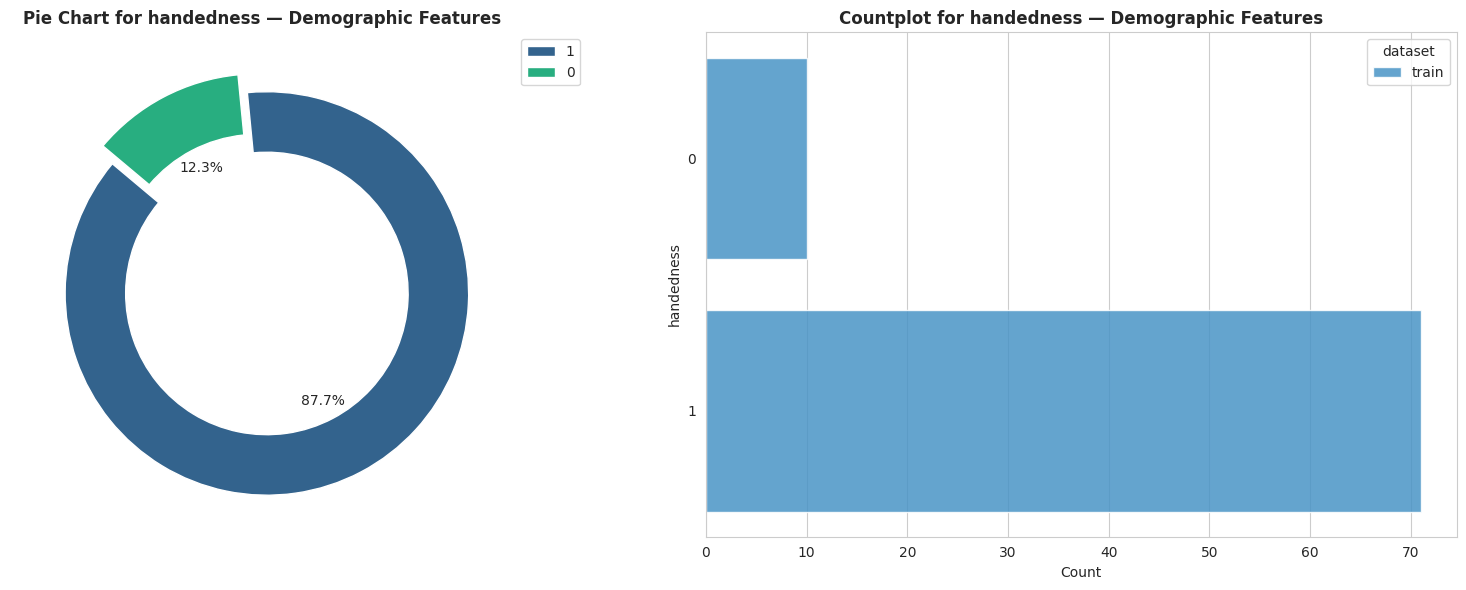

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

# Define palettes
pie_chart_palette = ['#33638d', '#28ae80', '#d3eb0c', '#ff9a0b', '#7e03a8', '#35b779',
                     '#fde725', '#440154', '#90d743', '#482173', '#22a884', '#f8961e']
custom_palette = ['#3498db']  # Only Train

# 🔹 Categorical variables to analyze (excluding 'gesture')
categorical_variables = [col for col in categorical_columns if col != 'gesture']

# --- Prep main dataset (train only)
train_main = train_df.copy()
train_main['dataset'] = 'train'
main_combined = train_main.copy()

# --- Prep demographic dataset (train only)
train_demo = train_dem_df.copy()
train_demo['dataset'] = 'train'
demo_combined = train_demo.copy()

# --- Unified plotting function
def create_categorical_plots(variable, data, source_name):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Pie Chart (left)
    plt.subplot(1, 2, 1)
    value_counts = data[variable].value_counts()

    # Collapse small categories
    threshold = 0.05 * value_counts.sum()
    filtered_values = value_counts.copy()
    filtered_values[value_counts < threshold] = 0
    filtered_values = filtered_values[filtered_values > 0]
    other_count = value_counts.sum() - filtered_values.sum()
    if other_count > 0:
        filtered_values['Other'] = other_count

    wedges, texts, autotexts = plt.pie(
        filtered_values,
        autopct=lambda p: f'{p:.1f}%' if p > 5 else '',
        colors=pie_chart_palette[:len(filtered_values)],
        startangle=140,
        wedgeprops=dict(width=0.3),
        explode=[0.05 if p > 5 else 0 for p in filtered_values],
        textprops={'fontsize': 10}
    )

    plt.title("\n".join(textwrap.wrap(f"Pie Chart for {variable} — {source_name}", width=50)), fontweight='bold')
    plt.legend(filtered_values.index, loc="upper left", bbox_to_anchor=(1, 1))

    # Horizontal Countplot (right)
    plt.subplot(1, 2, 2)
    sns.countplot(
        data=data,
        y=variable,
        hue='dataset',  # still present, but only "train"
        palette=custom_palette,
        alpha=0.85
    )
    plt.ylabel(variable)
    plt.xlabel("Count")
    plt.title("\n".join(textwrap.wrap(f"Countplot for {variable} — {source_name}", width=50)), fontweight='bold')
    plt.tight_layout()
    plt.show()

# --- Plot all categorical variables from main dataset (train only)
for var in categorical_variables:
    if var in main_combined.columns:
        create_categorical_plots(var, main_combined, "Context Features")

# --- Plot all categorical variables from demographic dataset (train only)
for var in categorical_variables:
    if var in demo_combined.columns:
        create_categorical_plots(var, demo_combined, "Demographic Features")

# Cleanup
train_main.drop('dataset', axis=1, inplace=True)
train_demo.drop('dataset', axis=1, inplace=True)

### <span style="color:#ffffff; font-size: 1%;">TOL-NTKI</span>

<div style="background-color:#E8F8F5; border-left:8px solid #1ABC9C; padding:20px; border-radius:8px; font-size:14px; color:#000000;">
  <h3 style="font-size:16px; margin-bottom:10px;">🤔💭 Thinking Out Loud!! (Non Target Key Insights)</h3>
  <hr>
  <p>⏩ <strong>Sequence Length (<code>sequence_counter</code>):</strong> Gestures vary widely in duration — some sequences are very short, others much longer. Models must handle <code>variable-length</code> inputs rather than assuming a fixed window.</p>
  <p>⏩ <strong>Height (<code>height_cm</code>):</strong> Most participants are within typical adult ranges, but there are outliers from <code>135 cm</code> to ~<code>190 cm</code>. Wrist-motion amplitudes can correlate with stature, affecting motion magnitudes.</p>
  <p>⏩ <strong>Shoulder-to-Wrist (<code>shoulder_to_wrist_cm</code>):</strong> Ranges ~<code>41–71 cm</code> with most in <code>49–55 cm</code>. This measure captures arm leverage; differences here mean wrist paths can occupy different spatial volumes, influencing ToF proximity readings.</p>
  <p>⏩ <strong>Elbow-to-Wrist (<code>elbow_to_wrist_cm</code>):</strong> Smaller scale (~<code>18–44 cm</code>) but important — forearm length directly limits how far the wrist can travel toward the face in gestures.</p>
  <p>⏩ <strong>Accelerometer Magnitude:</strong></p>
  <ul>
    <li><code>acc_mag_mean</code> ~<code>10 m/s²</code> consistently — baseline motion level.</li>
    <li><code>acc_mag_std</code> shows spread from near-static to very jerky sequences.</li>
    <li><code>acc_mag_max</code> captures extreme motion peaks — forceful tugs appear here.</li>
  </ul>
  <p>⏩ <strong>Rotation Angle:</strong></p>
  <ul>
    <li><code>rot_angle_mean</code> ~<code>2.4 rad</code> — typical wrist tilt during gestures.</li>
    <li><code>rot_angle_max</code> reaches near π radians, showing full twists in some cases.</li>
  </ul>
  <p>⏩ <strong>Thermopile Means:</strong></p>
  <ul>
    <li>All <code>thm</code> means ~<code>27–28 °C</code> — consistent with gestures near skin.</li>
    <li>Near-zero values indicate wrist far from warmth (Transition/Pause).</li>
    <li>Occasional spikes to <code>31–32 °C</code> in test imply closer or warmer contact points.</li>
  </ul>
  <p>⏩ <strong>Thermopile Variability:</strong> High <code>thm_*_std</code> (up to ~<code>5 °C</code>) marks strong shifts between “far” and “touching” — often characteristic of contact gestures like hair pulls or cheek pinches.</p>
  <p>⏩ <strong>ToF Means:</strong></p>
  <ul>
    <li>Values span full <code>0–250</code> range.</li>
    <li>Near-zero indicates direct contact; higher values reflect “air” gestures (e.g., waving).</li>
  </ul>
  <p>⏩ <strong>ToF Variability:</strong></p>
  <ul>
    <li>Train shows high <code>tof_std</code> (up to ~<code>140</code>) from rapid in-and-out motions — typical of BFRB tugs.</li>
    <li>Test <code>tof_std</code> lower (~<code>20–40</code>), suggesting smoother or steadier distances.</li>
  </ul>
  <p>⏩ <strong>Handedness:</strong> ~<code>88%</code> right-handed in train — minimal variation expected from this factor.</p>
</div>

## <span style="color:#ffffff; font-size: 1%;">[3.3] Target Feature Analysis (Univariate Analysis)</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400">  [3.3] Target Feature Analysis  <strong>(Univariate Analysis)</strong></span></b>

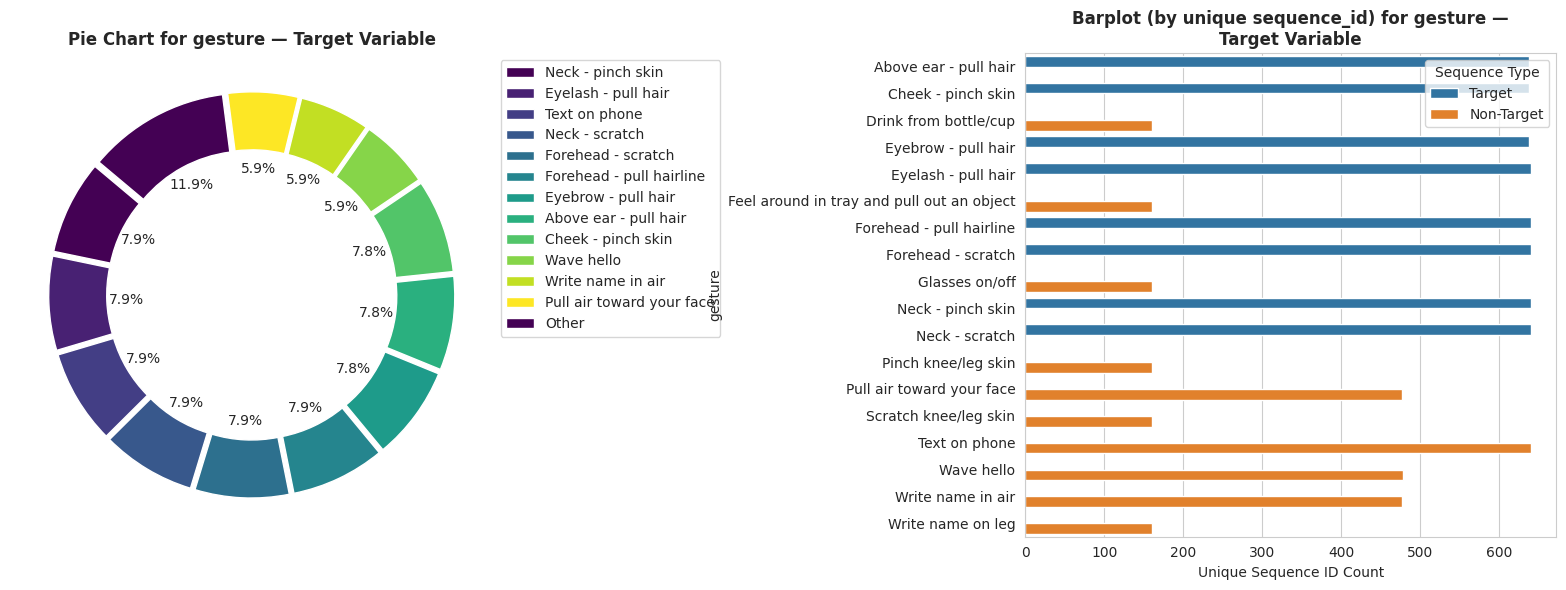

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

from matplotlib.cm import viridis
from matplotlib.colors import to_hex

# Generate a viridis palette with 12 colors
pie_chart_palette = [to_hex(viridis(i / 11)) for i in range(12)]

# Bar colors for gesture vs non-gesture
gesture_palette = {
    'Target': '#1f77b4',        # Blue
    'Non-Target': '#ff7f0e'     # Orange
}

# Define target column(s)
target_columns = ['gesture']

# Prepare the main data (ONLY train set)
train_main = train_df.copy()
train_main['dataset'] = 'train'  # kept if you want to add back more logic later

# Unified plotting function for target variables (train only)
def create_target_plots(variable, data, source_name):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Pie Chart (left) - same as before
    plt.subplot(1, 2, 1)
    value_counts = (
    data.groupby(variable)['sequence_id']
    .nunique()
    .sort_values(ascending=False)
    )

    threshold = 0.05 * value_counts.sum()
    filtered_values = value_counts.copy()
    filtered_values[value_counts < threshold] = 0
    filtered_values = filtered_values[filtered_values > 0]
    other_count = value_counts.sum() - filtered_values.sum()
    if other_count > 0:
        filtered_values['Other'] = other_count

    wedges, texts, autotexts = plt.pie(
        filtered_values,
        autopct=lambda p: f'{p:.1f}%' if p > 5 else '',
        colors=pie_chart_palette[:len(filtered_values)],
        startangle=140,
        wedgeprops=dict(width=0.3),
        explode=[0.05 if p > 5 else 0 for p in filtered_values],
        textprops={'fontsize': 10}
    )

    plt.title("\n".join(textwrap.wrap(f"Pie Chart for {variable} — {source_name}", width=50)), fontweight='bold')
    plt.legend(filtered_values.index, loc="upper left", bbox_to_anchor=(1, 1))

    # Bar Chart (right) — counts of unique sequence_id
    plt.subplot(1, 2, 2)
    group_df = (
        data.groupby([variable, 'sequence_type'])['sequence_id']
        .nunique()
        .reset_index(name='sequence_count')
    )

    sns.barplot(
        data=group_df,
        y=variable,
        x='sequence_count',
        hue='sequence_type',
        palette=gesture_palette
    )

    plt.ylabel(variable)
    plt.xlabel("Unique Sequence ID Count")
    plt.title("\n".join(textwrap.wrap(f"Barplot (by unique sequence_id) for {variable} — {source_name}", width=50)), fontweight='bold')
    plt.legend(title='Sequence Type', loc='upper right')
    plt.tight_layout()
    plt.show()

# Plot target column(s) (train only)
for var in target_columns:
    if var in train_main.columns:
        create_target_plots(var, train_main, "Target Variable")

# Cleanup
train_main.drop('dataset', axis=1, inplace=True)

### <span style="color:#ffffff; font-size: 1%;">TOL-TKI</span>

<div style="background-color: #E8F8F5; border-left: 8px solid #1ABC9C; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h3 style="font-size: 16px; margin-bottom: 10px;">🤔💁‍♀️ Thinking Out Loud!! (📝Target Key Insights: <strong><code>gesture)</code></strong></h3>
  <hr>
  <p><strong>⏩ Multimodal, Nearly Uniform Spread Across Many Classes 🧐</strong></p>
  <ul>
    <li>The <em>train</em> set shows <strong>18 distinct gestures</strong>, each capturing ~2–14% of all samples—no single class dominates by more than ~14%.</li>
    <li>Top activities like <strong><code>Text on phone</code></strong> and <strong><code>Neck – scratch</code></strong> each occupy roughly <strong>10% of the data</strong>, but lots of mid‐frequency gestures hover around 7–8% (e.g., <code>Eyebrow – pull hair</code>, <code>Forehead – scratch</code>).</li>
    <li>Lower‐frequency gestures like <strong><code>Write name on leg</code></strong> and <strong><code>Pinch knee/leg skin</code></strong> sit near the <em>1.5–2%</em> range, suggesting a long tail of rarer events.</li>
  </ul>
  <p><strong>✅ Practical Implications:</strong>  
    - A model must handle a <strong>fine‐grained, multi‐class ratio</strong> without overfitting to the most common gestures.  
    - The moderate class imbalance (10% vs. ~2%) signals a need for <em>class‐balanced sampling</em> or <em>weighted loss</em> so rare gestures still get learned.  
  </p>
  <hr>
  <p><strong>⏩ All Gestures Are Potentially BFRB or Non‐BFRB—Labeling Matters 📑</strong></p>
  <ul>
    <li>Half of these classes belong to the <em>BFRB‐like</em> category (e.g., <code>Forehead – pull hairline</code>, <code>Cheek – pinch skin</code>), and half are <em>non‐BFRB</em> everyday actions (e.g., <code>Drink from bottle/cup</code>, <code>Wave hello</code>).</li>
    <li>Because the distribution across BFRB vs. non‐BFRB is fairly balanced when collapsing to binary, the first stage (target vs. non‐target) should be robust—there isn’t an extreme skew toward non‐target gestures.</li>
  </ul>
  <p><strong>✅ Practical Implications:</strong>  
    - Start with a <em>binary‐classification</em> pipeline (BFRB vs. non‐BFRB).  
    - Then refine to the <em>multi‐class</em> problem, ensuring that the model doesn’t conflate subtleties (e.g., pinching vs. scratching skin) without good feature separation.  
  </p>
</div>

## <span style="color:#ffffff; font-size: 1%;">[3.3] Multivariate Feature Relationship</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400">  [3.4] <strong>Multivariate Feature Relationship</strong></span></b>

### <span style="color:#ffffff; font-size: 1%;">EDA-MFR-MSFA</span>

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> [3.4.1] <strong>Sensor Feature Analysis</strong> for <strong>all Gestures </strong>(Single Random Subject)</span></b>

In [19]:
# subj_info = train_dem_df[train_dem_df['subject'] == subject_id].iloc[0]

# print(f"⏩ Details of the random subject being considered")
# print(f"Subject ID:              {subject_id}")
# print(f"  • Age:                 {subj_info['age']} years")
# print(f"  • Adult/Child:         {'Adult' if subj_info['adult_child']==1 else 'Child'}")
# print(f"  • Sex:                 {'Male' if subj_info['sex']==1 else 'Female'}")
# print(f"  • Handedness:          {'Right-handed' if subj_info['handedness']==1 else 'Left-handed'}")
# print(f"  • Height:              {subj_info['height_cm']} cm")
# print(f"  • Shoulder→Wrist:      {subj_info['shoulder_to_wrist_cm']} cm")
# print(f"  • Elbow→Wrist:         {subj_info['elbow_to_wrist_cm']} cm")

#### ⏩ 1. **IMU Plots**
#### **📌 Interpretation Guide**
   * Acceleration Magnitude (`acc_mag`): shows how “forceful” the wrist moved. Peaks often correspond to rapid hand motion.
   * Rotation Angle (`rot_angle`): represents how far the wrist twisted from its neutral orientation. Sudden jumps may indicate quick flips.
   * The shaded “Transition” region (gray) highlights when the hand is approaching the gesture target; “Gesture” (red) highlights actual contact/motion.
   * Comparing these two lines within each sequence helps distinguish, for example, a BFRB “hair pull” (high acc + sharp rotation) from a gentle non-BFRB motion.

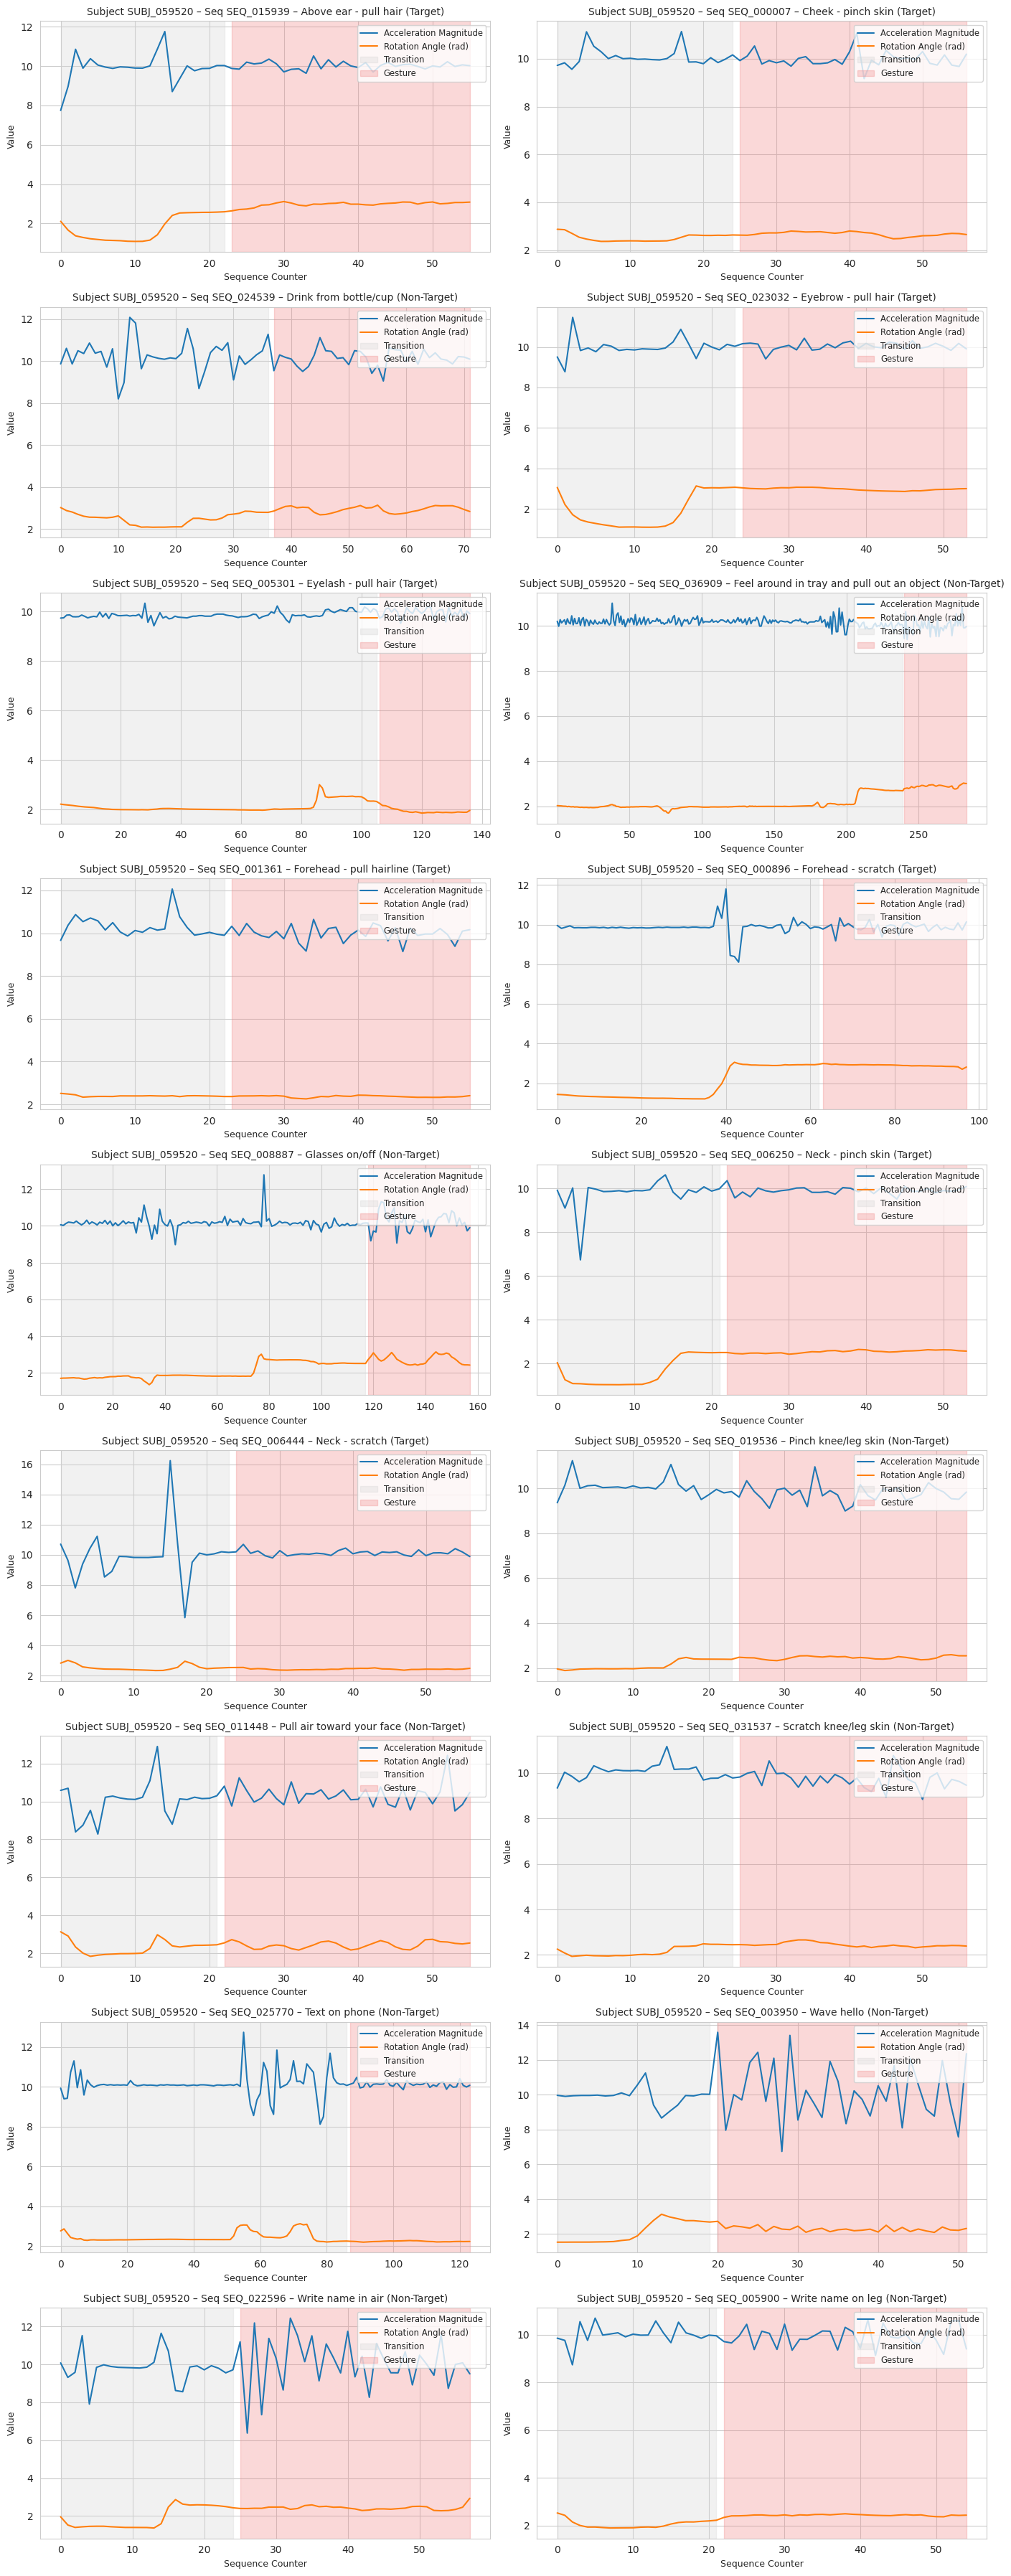

In [20]:
# ─── Cell 1: IMU Time Series Plots ───────────────────────────────────────────────────────────────────────────────────────
# This cell computes the acceleration magnitude (√(acc_x²+acc_y²+acc_z²)) and the rotation angle (θ = 2·arccos(rot_w))
# for each timestamp in a chosen subject’s sequences. It then plots, for each gesture sequence, two lines:
#   • acc_mag (acceleration magnitude)
#   • rot_angle (orientation angle)
# The background is shaded by ‘phase’: “Transition” vs. “Gesture” in different colors.
# Each subplot title shows the gesture name and its sequence_type. Two plots are arranged per row.

import numpy as np
import matplotlib.pyplot as plt

# Select one subject (e.g., first in the list)
subject_id = train_df['subject'].unique()[0]
subj_df = train_df[train_df['subject'] == subject_id].copy()

# Compute derived IMU features
subj_df['acc_mag'] = np.sqrt(
    subj_df['acc_x']**2 + subj_df['acc_y']**2 + subj_df['acc_z']**2
)
subj_df['rot_w_clipped'] = subj_df['rot_w'].clip(-1, 1)
subj_df['rot_angle'] = 2 * np.arccos(subj_df['rot_w_clipped'])

# Pick one sequence_id per unique gesture label
# Group by the integer-encoded 'gesture' column, then take the first sequence_id in each group
gesture_to_seq = subj_df.groupby('gesture')['sequence_id'].first().to_dict()
# Convert to a list of sequence_ids
seq_ids = list(gesture_to_seq.values())

n = len(seq_ids)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows), sharex=False, sharey=False)
axes = axes.flatten()

for i, seq in enumerate(seq_ids):
    ax = axes[i]
    seq_df = subj_df[subj_df['sequence_id'] == seq].sort_values('sequence_counter')
    times = seq_df['sequence_counter']

    # Plot the two derived IMU lines
    ax.plot(times, seq_df['acc_mag'],
            label='Acceleration Magnitude', color='tab:blue', linewidth=1.5)
    ax.plot(times, seq_df['rot_angle'],
            label='Rotation Angle (rad)', color='tab:orange', linewidth=1.5)

    # Shade by phase: “Transition” vs “Gesture”
    used_labels = set()
    for phase_label, color in [('Transition', 'lightgray'),
                               ('Gesture', 'lightcoral')]:
        mask = seq_df['phase'] == phase_label
        if mask.any():
            # Find contiguous intervals where phase == phase_label
            idxs = seq_df.index[mask]
            breaks = np.where(np.diff(idxs) != 1)[0]
            spans = []
            start_idx = idxs[0]
            for b in breaks:
                end_idx = idxs[b]
                spans.append((start_idx, end_idx))
                start_idx = idxs[b + 1]
            spans.append((start_idx, idxs[-1]))
            # Draw each span; label only once per phase in this subplot
            for (start_i, end_i) in spans:
                t0 = seq_df.loc[start_i, 'sequence_counter']
                t1 = seq_df.loc[end_i, 'sequence_counter']
                label_arg = phase_label if phase_label not in used_labels else None
                ax.axvspan(t0, t1, color=color, alpha=0.3, label=label_arg)
                used_labels.add(phase_label)

    # Subplot titles and labels
    gesture_name = seq_df['gesture'].iloc[0]
    seq_type = seq_df['sequence_type'].iloc[0]
    ax.set_title(f"Subject {subject_id} – Seq {seq} – {gesture_name} ({seq_type})",
                 fontsize=10)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Value", fontsize=9)
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True)

# Turn off any empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### ⏩ 2. **Thermopile Plots**
#### **📌 Interpretation Guide**
   * Each of the five `thm_i` curves measures skin‐adjacent heat. A rising `thm_i` indicates the wrist getting closer to a warm body part (e.g., face, neck).
   * The bold “Average Temperature” line aggregates all five sensors to reveal overall contact events (spikes) vs. air phases (low flat regions).
   * Shading by “Transition” vs. “Gesture” helps confirm that temperature rises primarily occur during the “Gesture” phase (i.e., actual contact).

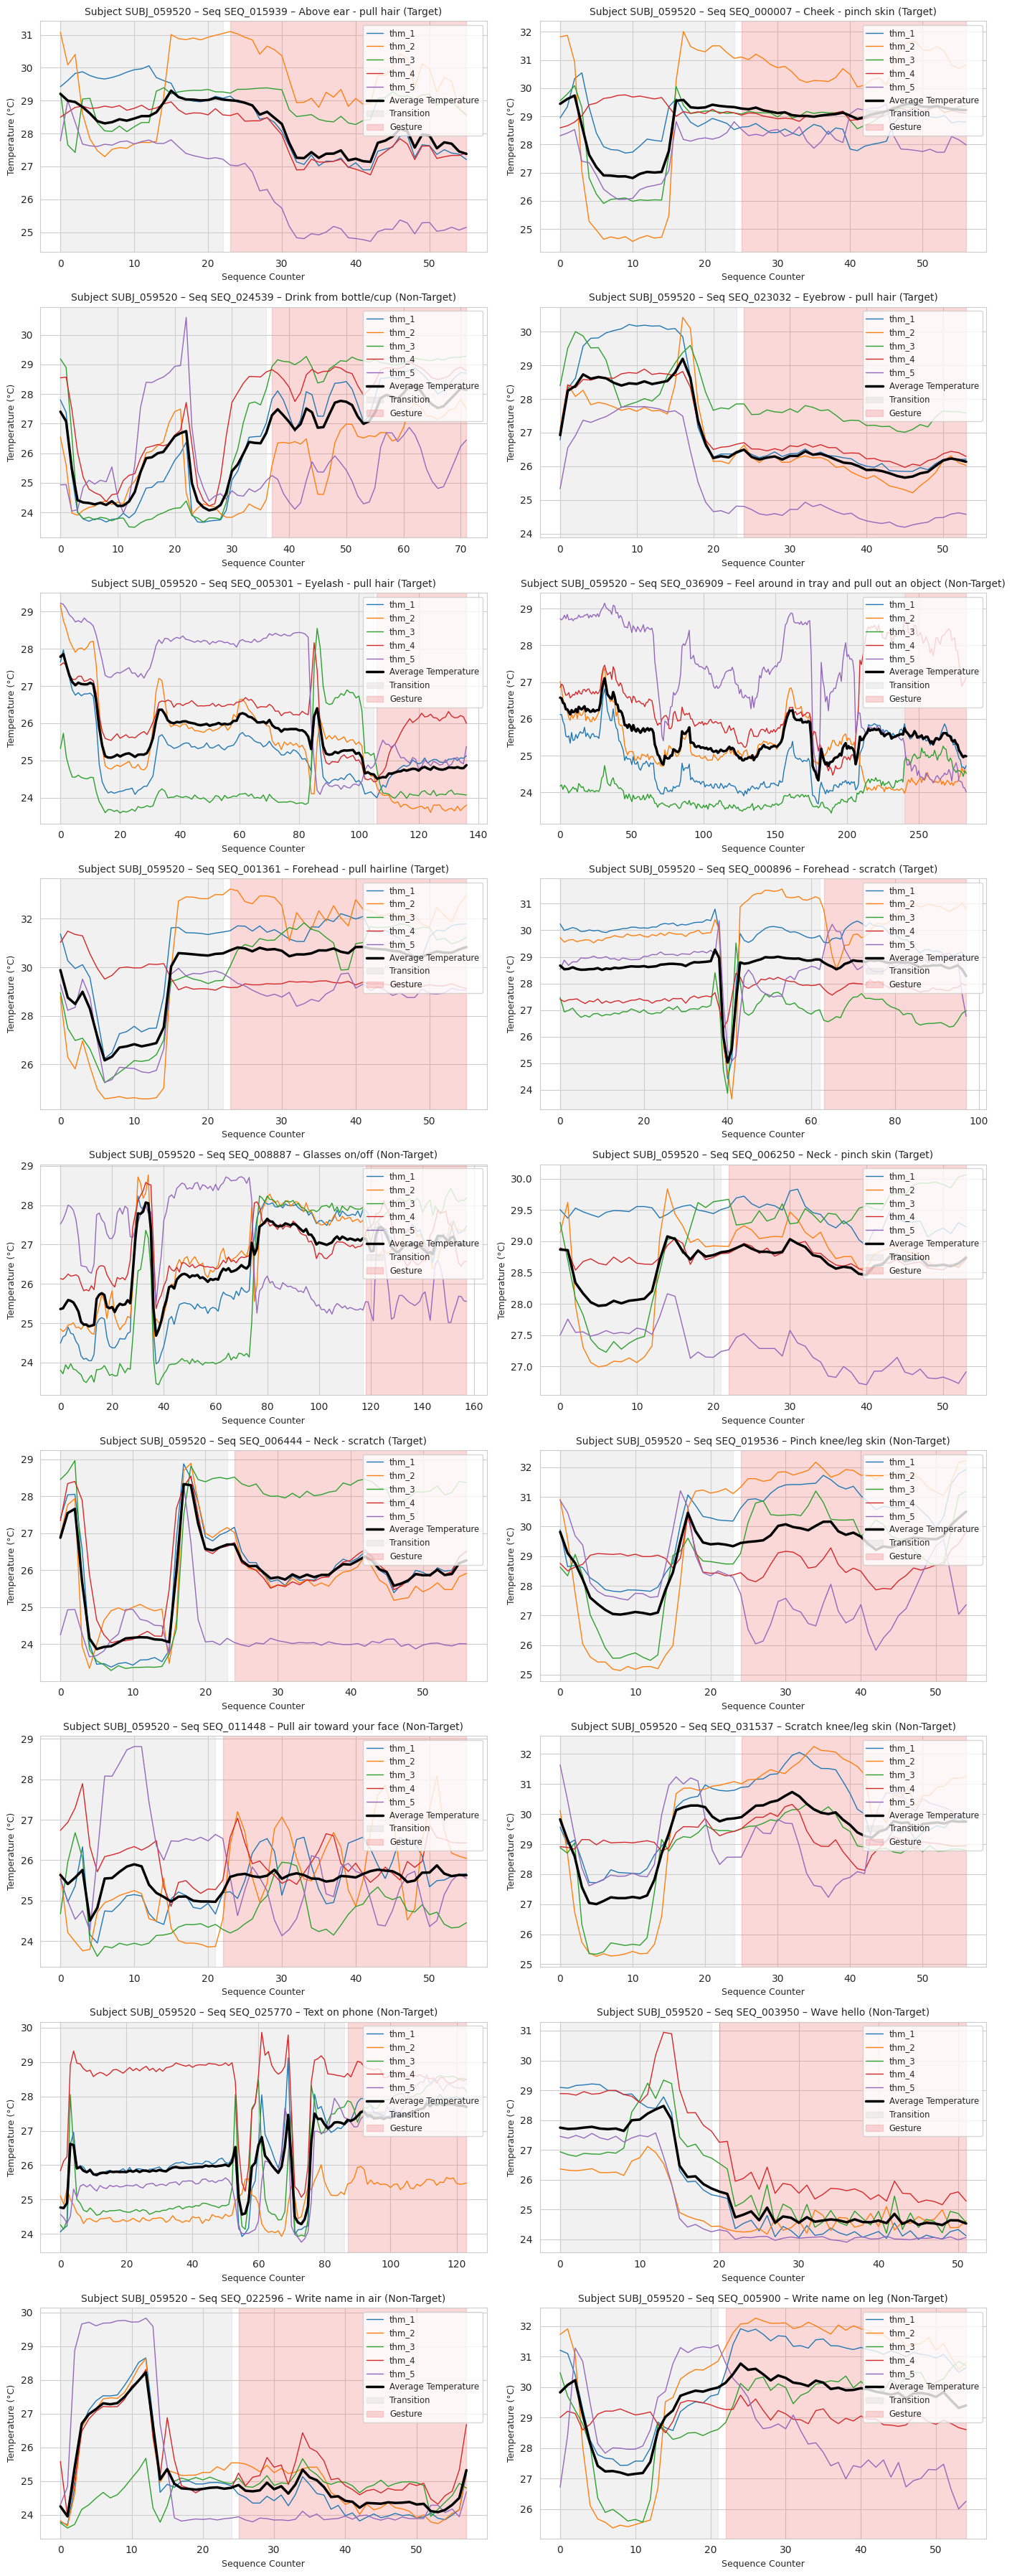

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Use the same subject_id and seq_ids (one per unique gesture) from Cell 1
therm_df = subj_df.copy()

# Gather thermopile columns and compute their per-timestamp mean
thm_cols = [f'thm_{i}' for i in range(1, 6)]
therm_df['thm_mean'] = therm_df[thm_cols].mean(axis=1)

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows), sharex=False, sharey=False)
axes = axes.flatten()

for i, seq in enumerate(seq_ids):
    ax = axes[i]
    seq_thm = therm_df[therm_df['sequence_id'] == seq].sort_values('sequence_counter')
    times = seq_thm['sequence_counter']
    # Determine y-range for shading (not strictly needed since axvspan spans entire y-axis)
    # Plot each thermopile channel
    for col in thm_cols:
        ax.plot(times, seq_thm[col], label=col, linewidth=1)
    # Plot the average as a bold black line
    ax.plot(times, seq_thm['thm_mean'], label='Average Temperature', color='black', linewidth=2.5)
    # Shade by phase using axvspan
    for phase_label, color in [('Transition', 'lightgray'), ('Gesture', 'lightcoral')]:
        mask = seq_thm['phase'] == phase_label
        if mask.any():
            idxs = seq_thm.index[mask]
            breaks = np.where(np.diff(idxs) != 1)[0]
            spans = []
            start_idx = idxs[0]
            for b in breaks:
                end_idx = idxs[b]
                spans.append((start_idx, end_idx))
                start_idx = idxs[b + 1]
            spans.append((start_idx, idxs[-1]))
            for (start_i, end_i) in spans:
                t0 = seq_thm.loc[start_i, 'sequence_counter']
                t1 = seq_thm.loc[end_i, 'sequence_counter']
                ax.axvspan(t0, t1, color=color, alpha=0.3, label=phase_label)
    # Labels and legend for this subplot
    gesture_name = seq_thm['gesture'].iloc[0]
    seq_type = seq_thm['sequence_type'].iloc[0]
    ax.set_title(f"Subject {subject_id} – Seq {seq} – {gesture_name} ({seq_type})", fontsize=10)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Temperature (°C)", fontsize=9)
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True)

# Turn off any unused subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### ⏩ 3. **ToF Plots**
#### **📌 Interpretation Guide**
   * Each `tof_i_mean` is the mean of its 8×8 grid, capturing how “close” the wrist was to an object (e.g., skin). Low values (\~0–50) → very close; higher (\~100–200) → farther away; –1 (masked) → no echo.
   * Monitoring all five sensors’ mean distances over time shows when the hand transitions into proximity (values suddenly drop) and when it moves away.
   * The same “Transition”/“Gesture” shading confirms that distance minima align with actual contact (in the “Gesture” phase).

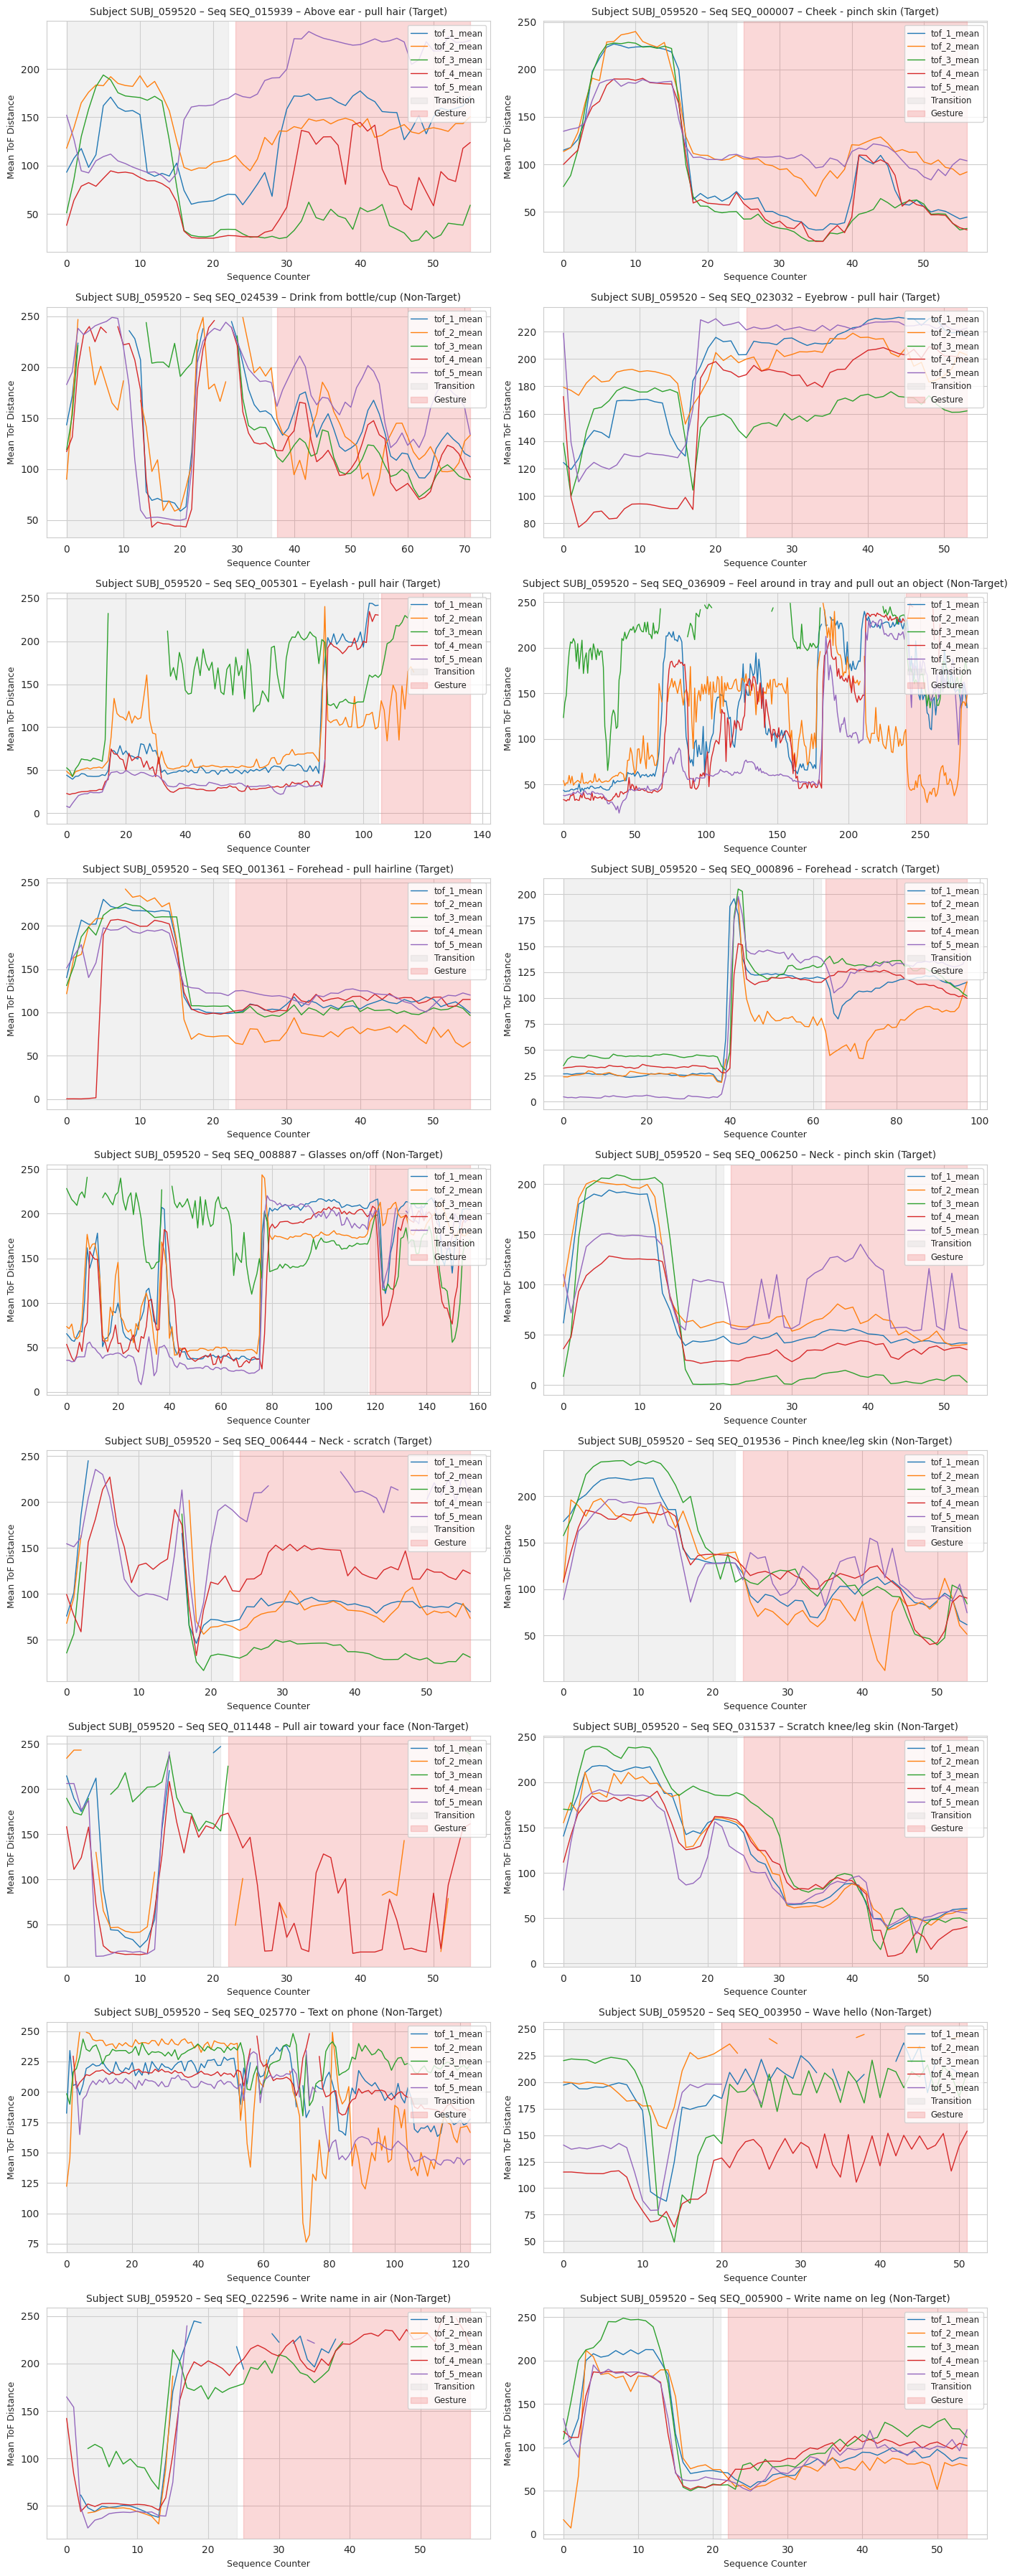

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Use the same subject_id and seq_ids (one per unique gesture) from Cell 1
tof_df = subj_df.copy()

# Identify the 64 columns for each ToF sensor and compute their per-timestamp mean
mean_cols = []
for i_sensor in range(1, 6):
    pixel_cols = [f'tof_{i_sensor}_v{pix}' for pix in range(64)]
    tof_df[f'tof_{i_sensor}_mean'] = tof_df[pixel_cols].replace(-1, np.nan).mean(axis=1)
    mean_cols.append(f'tof_{i_sensor}_mean')

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows), sharex=False, sharey=False)
axes = axes.flatten()

for i, seq in enumerate(seq_ids):
    ax = axes[i]
    seq_tof = tof_df[tof_df['sequence_id'] == seq].sort_values('sequence_counter')
    times = seq_tof['sequence_counter']

    # Plot mean of each ToF sensor
    for col in mean_cols:
        ax.plot(times, seq_tof[col], label=col, linewidth=1)

    # Shade by phase using axvspan
    for phase_label, color in [('Transition', 'lightgray'), ('Gesture', 'lightcoral')]:
        mask = seq_tof['phase'] == phase_label
        if mask.any():
            idxs = seq_tof.index[mask]
            breaks = np.where(np.diff(idxs) != 1)[0]
            spans = []
            start_idx = idxs[0]
            for b in breaks:
                end_idx = idxs[b]
                spans.append((start_idx, end_idx))
                start_idx = idxs[b + 1]
            spans.append((start_idx, idxs[-1]))
            for (start_i, end_i) in spans:
                t0 = seq_tof.loc[start_i, 'sequence_counter']
                t1 = seq_tof.loc[end_i, 'sequence_counter']
                ax.axvspan(t0, t1, color=color, alpha=0.3, label=phase_label)

    # Labels and legend for this subplot
    gesture_name = seq_tof['gesture'].iloc[0]
    seq_type     = seq_tof['sequence_type'].iloc[0]
    ax.set_title(f"Subject {subject_id} – Seq {seq} – {gesture_name} ({seq_type})", fontsize=10)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Mean ToF Distance", fontsize=9)
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True)

# Turn off any unused subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> [3.4.2] <strong>Sensor Feature Analysis</strong> Across <strong>Demographics and Physiology Features</strong></span></b>

#### 📌 Feature in Consideration: **Handedness**

In this cell, we visualize how left‐handed versus right‐handed subjects perform the same gesture (“Write name on leg”). We extract one sequence from each group and plot four sensor modalities side‐by‐side.

By comparing left‐ vs. right‐handed examples, we look for consistent shifts in how each wrist’s sensors respond as the hand approaches and writes on the leg. Since the Helios device’s sensors are arranged around the wrist, handedness changes which thermopile or ToF faces the leg first, and alters the IMU axes’ motion direction.

**⏩ How to Interpret & Implications (Senor Features):**

* **IMU (acc\_x/y/z):**  Observe which acceleration axis peaks first or higher when the hand moves inward. A right‐handed “write” likely shows a larger positive acc\_x (lateral) as the wrist pivots differently than a left hand. Models can learn to swap or re‐align axis information based on handedness rather than misinterpret gesture onset.
* **Rotation (rot\_w/x/y/z):** Watch for a tilt bias: right‐handed users may rotate the wrist inward (e.g., rot\_y ramp earlier), left‐handed might rotate outward first. A slower rot\_angle rise on one side signals how the forearm twists—adjust temporal alignment to avoid handedness‐based misclassification.
* **Thermopiles (thm\_1–5):** Note which thermopile channel spikes first as skin heat enters the 50° FoV. For right‐hands, a specific thermopile index (e.g., thm\_2 on the inner wrist) warms earlier than in left‐handed sequences. Using this, the algorithm can normalize which thermopile to trust based on reported handedness.
* **ToF Mean Distance (tof\_1–5):** Identify which ToF sensor’s mean distance drops earliest as the hand approaches the leg. A right‐handed user’s index “front” ToF (e.g., tof\_3\_mean) might register proximity sooner than the left, flipping for left‐handers. Training on these systematic ToF timing offsets prevents overfitting to one handedness.


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# (1) Merge train_demographics into train_df if not already done
train_df = train_df.merge(
    train_dem_df,
    on="subject",
    how="left"
)

⏩ Plots for All Subjects for One Gesture

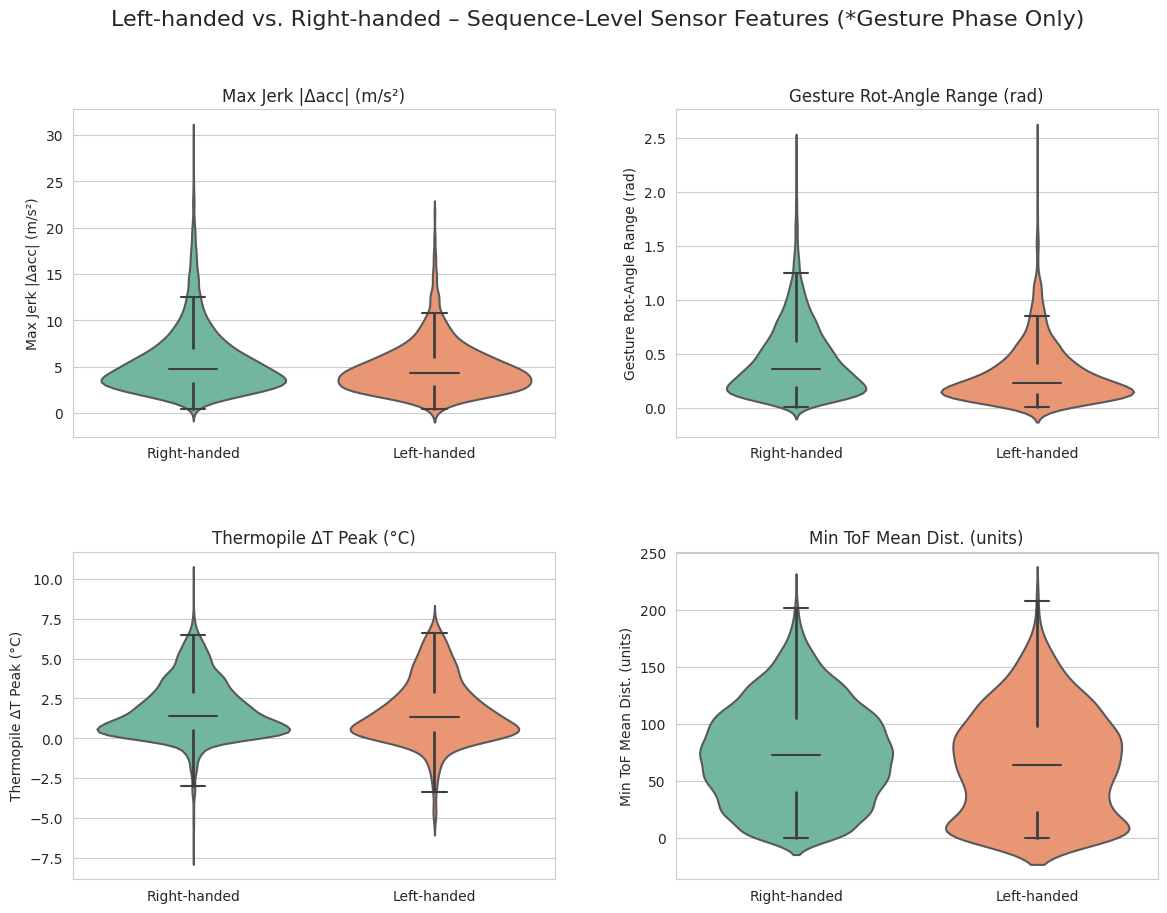

In [24]:
import warnings, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# ─── 1. Choose grouping variable ───────────────────────────────────────────────────────
group_col = "handedness"
group_map = {0: "Left-handed", 1: "Right-handed"}

# ─── 2. Build sequence-level summary table ─────────────────────────────────────────────
seq_summaries = []

for seq_id, seq in train_df.groupby("sequence_id"):
    
    g_label = seq[group_col].iloc[0]
    if pd.isna(g_label):                    # skip if demographic missing
        continue
    
    # ----- Phase masks -----
    gest_mask = seq["phase"] == "Gesture"
    
    # ----- 1) Acceleration jerk -----
    # jerk = |Δacc_mag / Δt| ; use max over entire seq
    acc_mag = np.sqrt(seq["acc_x"]**2 + seq["acc_y"]**2 + seq["acc_z"]**2).values
    jerk = np.abs(np.diff(acc_mag))                         # Δt = 1 frame
    max_jerk = jerk.max() if len(jerk) else np.nan
    
    # ----- 2) Rotation angular range (Gesture phase only) -----
    rot_angle = 2*np.arccos(seq["rot_w"].clip(-1,1))
    rot_range = rot_angle[gest_mask].max() - rot_angle[gest_mask].min() if gest_mask.any() else np.nan
    
    # ----- 3) Thermopile peak ΔT (Gesture peak minus Transition baseline) -----
    thm_cols = [f"thm_{i}" for i in range(1,6)]
    thm_mean = seq[thm_cols].ffill().bfill().mean(axis=1)
    baseline = thm_mean[seq["phase"]=="Transition"].median()
    peak_dt  = thm_mean[gest_mask].max() - baseline if gest_mask.any() else np.nan
    
    # ----- 4) ToF closest mean distance (min over all 5 sensors) -----
    tof_means = []
    for i in range(1,6):
        col = f"tof_{i}_mean"
        if col not in seq:
            # compute on the fly (replace -1 by NaN)
            pix = seq[[f"tof_{i}_v{p}" for p in range(64)]].replace(-1, np.nan)
            seq[col] = pix.mean(axis=1)
        tof_means.append(seq[col])
    tof_overall = pd.concat(tof_means, axis=1).mean(axis=1)
    min_tof = tof_overall.min()
    
    seq_summaries.append({
        "sequence_id":       seq_id,
        group_col:           g_label,
        "max_jerk":          max_jerk,
        "rot_range":         rot_range,
        "thm_peak_delta":    peak_dt,
        "tof_min_distance":  min_tof
    })

summary_df = pd.DataFrame(seq_summaries).dropna()

# Map group labels to readable strings
summary_df["Group"] = summary_df[group_col].map(group_map)

# ─── 3. Plot distributions ────────────────────────────────────────────────────────────
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.35, wspace=0.25)

metrics = [
    ("max_jerk",         "Max Jerk |Δacc| (m/s²)"),
    ("rot_range",        "Gesture Rot-Angle Range (rad)"),
    ("thm_peak_delta",   "Thermopile ΔT Peak (°C)"),
    ("tof_min_distance", "Min ToF Mean Dist. (units)")
]

for ax, (metric, nice_name) in zip(axes.flatten(), metrics):
    sns.violinplot(
        data=summary_df,
        x="Group", y=metric, palette="Set2",
        inner=None, ax=ax
    )
    sns.boxplot(
        data=summary_df,
        x="Group", y=metric,
        width=0.2, showcaps=True, boxprops={'facecolor':'white'},
        showfliers=False, whiskerprops={'linewidth':2},
        ax=ax
    )
    ax.set_title(nice_name, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel(nice_name, fontsize=10)

fig.suptitle(f"{group_map[0]} vs. {group_map[1]} – Sequence-Level Sensor Features (*Gesture Phase Only)", fontsize=16)
plt.show()

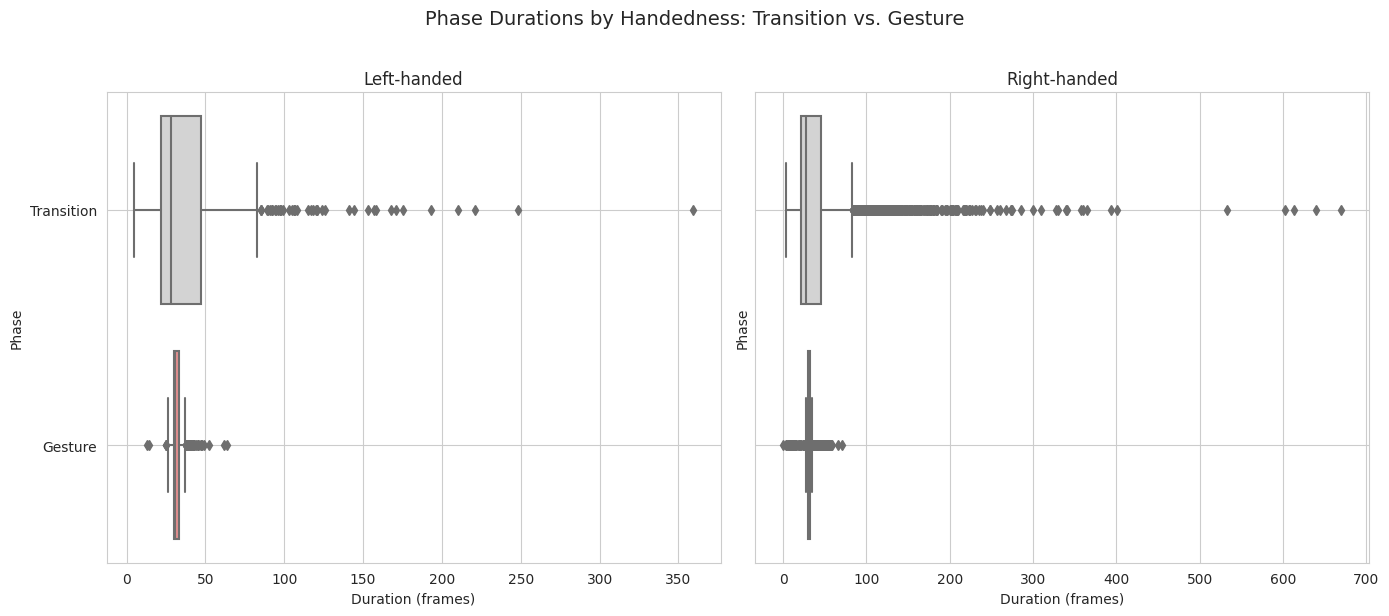

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ─── Compute per-sequence phase durations ────────────────────────────────────────────────────────────
# Assumes train_df already has demographics merged and 'phase' column

# Count number of frames per phase, per sequence
dur_df = (
    train_df
    .groupby(['sequence_id', 'handedness'])['phase']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

# Keep only Transition & Gesture (in case Pause exists)
dur_df = dur_df[['sequence_id', 'handedness', 'Transition', 'Gesture']]

# Melt to long form for boxplot
dur_long = dur_df.melt(
    id_vars=['sequence_id', 'handedness'],
    value_vars=['Transition', 'Gesture'],
    var_name='phase',
    value_name='duration_frames'
)

# Map handedness to labels
dur_long['Group'] = dur_long['handedness'].map({0: 'Left-handed', 1: 'Right-handed'})

# ─── Plot horizontal boxplots side-by-side ───────────────────────────────────────────────────────────
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
plt.subplots_adjust(wspace=0.2)

for ax, group_label in zip(axes, ['Left-handed', 'Right-handed']):
    subset = dur_long[dur_long['Group'] == group_label]
    sns.boxplot(
        data=subset,
        x='duration_frames',
        y='phase',
        orient='h',
        palette=['lightgray', 'lightcoral'],
        ax=ax
    )
    ax.set_title(f"{group_label}", fontsize=12)
    ax.set_xlabel("Duration (frames)", fontsize=10)
    ax.set_ylabel("Phase", fontsize=10)
    ax.grid(True)

fig.suptitle("Phase Durations by Handedness: Transition vs. Gesture", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

⏩ Plots for Randomly Selected Subjects and One Gesture

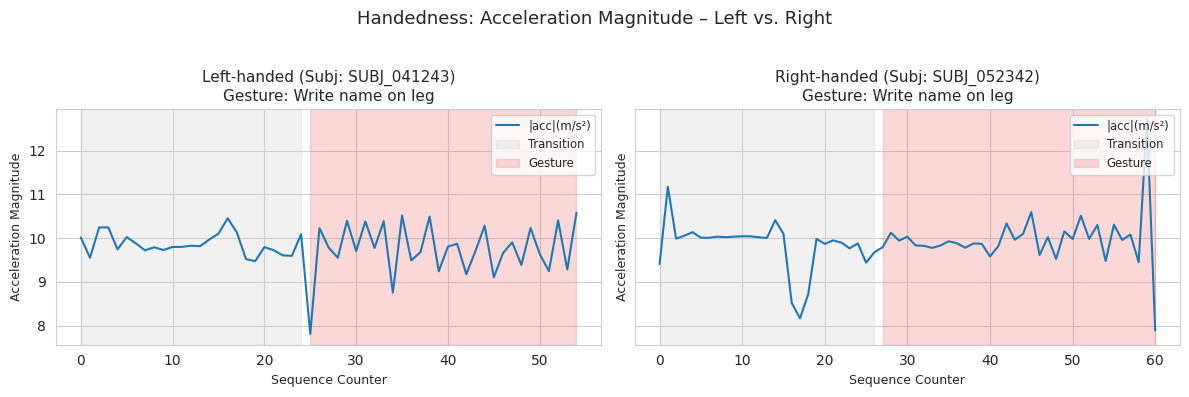

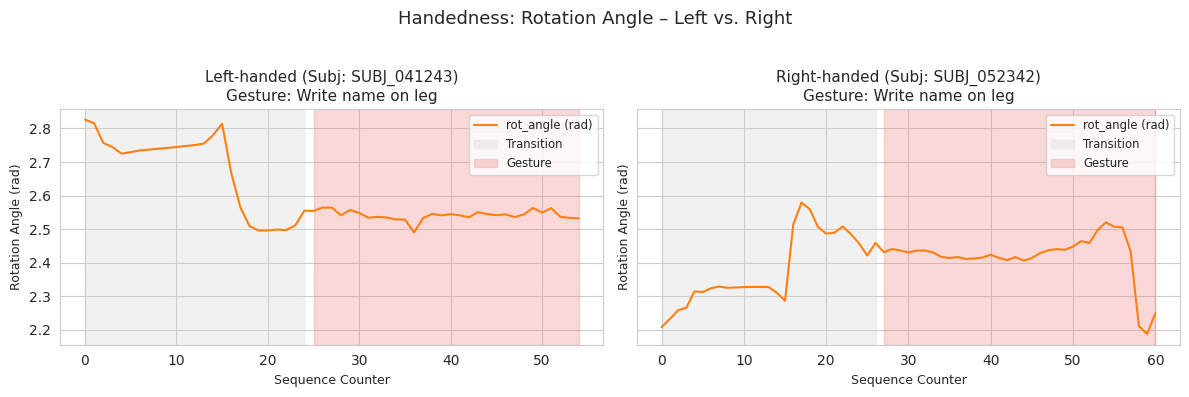

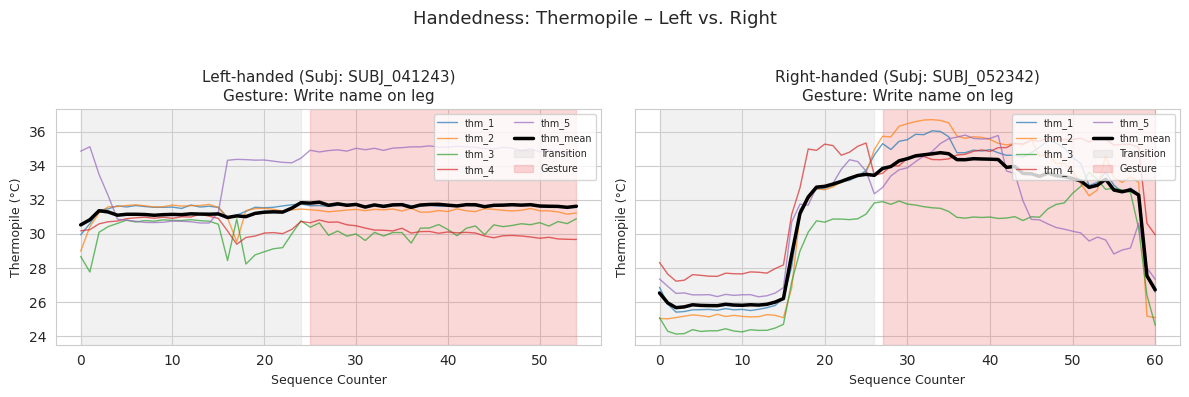

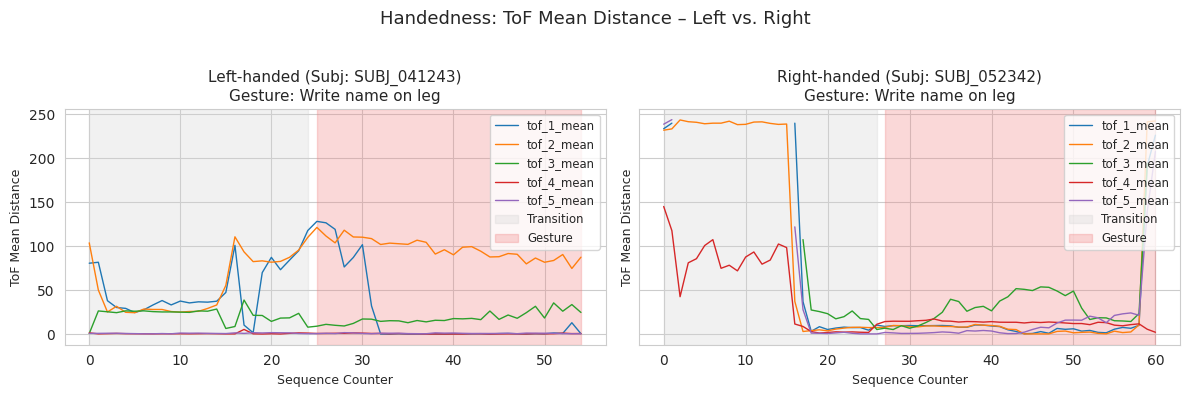

In [26]:
# ─── Cell A: Handedness Comparison for IMU, Rot, Thermopile, and ToF ────────────────────────────────────────────

# (2) Pick one gesture to compare (change as needed)
gesture_to_plot = "Write name on leg"

# (3) Filter to only rows with that gesture, and split by handedness
df_gesture = train_df[train_df["gesture"] == gesture_to_plot].copy()

# Left‐handed group (handedness == 0) and Right‐handed group (handedness == 1)
left_group  = df_gesture[df_gesture["handedness"] == 0]
right_group = df_gesture[df_gesture["handedness"] == 1]

# (4) From each group, pick a single sequence_id at random (or first) for plotting
#     If no left‐handed example exists, you may need another gesture.
if left_group["sequence_id"].nunique() == 0:
    raise ValueError("No left‐handed example of that gesture found. Choose a different gesture.")

left_seq  = left_group["sequence_id"].unique()[0]
right_seq = right_group["sequence_id"].unique()[0]

# (5) Extract the two sequences, sort by sequence_counter
df_left  = train_df[(train_df["sequence_id"] == left_seq)].sort_values("sequence_counter")
df_right = train_df[(train_df["sequence_id"] == right_seq)].sort_values("sequence_counter")

# (6) Compute IMU derived features: acc_mag and rot_angle
for df in (df_left, df_right):
    df["acc_mag"] = np.sqrt(df["acc_x"]**2 + df["acc_y"]**2 + df["acc_z"]**2)
    df["rot_w_clipped"] = df["rot_w"].clip(-1, 1)
    df["rot_angle"] = 2 * np.arccos(df["rot_w_clipped"])

# (7) Plotting helper to shade phases
def shade_phases(ax, seq_df):
    used = set()
    for phase_label, color in [("Transition", "lightgray"), ("Gesture", "lightcoral")]:
        mask = seq_df["phase"] == phase_label
        if not mask.any():
            continue
        idxs = seq_df.index[mask]
        diffs = np.where(np.diff(idxs) != 1)[0]
        spans = []
        start = idxs[0]
        for b in diffs:
            end = idxs[b]
            spans.append((start, end))
            start = idxs[b + 1]
        spans.append((start, idxs[-1]))
        for (s, e) in spans:
            t0 = seq_df.loc[s, "sequence_counter"]
            t1 = seq_df.loc[e, "sequence_counter"]
            label = phase_label if phase_label not in used else None
            ax.axvspan(t0, t1, color=color, alpha=0.3, label=label)
            used.add(phase_label)

# (8) Now produce **four** separate figures (each with 2 subplots side‐by‐side):

# -----------------------------------------------------------------------------
# A.1: IMU: Acceleration Magnitude
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_left, df_right],
    [f"Left‐handed (Subj: {df_left['subject'].iloc[0]})",
     f"Right‐handed (Subj: {df_right['subject'].iloc[0]})"]
):
    ax.plot(df_seq["sequence_counter"], df_seq["acc_mag"],
            color="tab:blue", lw=1.5, label="|acc|(m/s²)")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Acceleration Magnitude", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Handedness: Acceleration Magnitude – Left vs. Right", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# A.2: IMU: Rotation Angle
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_left, df_right],
    [f"Left‐handed (Subj: {df_left['subject'].iloc[0]})",
     f"Right‐handed (Subj: {df_right['subject'].iloc[0]})"]
):
    ax.plot(df_seq["sequence_counter"], df_seq["rot_angle"],
            color="tab:orange", lw=1.5, label="rot_angle (rad)")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Rotation Angle (rad)", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Handedness: Rotation Angle – Left vs. Right", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# A.3: Thermopile: 5 Channels + Average
# -----------------------------------------------------------------------------
# (Compute thermopile mean if not already done)
for df in (df_left, df_right):
    thm_cols = [f"thm_{i}" for i in range(1,6)]
    df["thm_mean"] = df[thm_cols].mean(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_left, df_right],
    [f"Left‐handed (Subj: {df_left['subject'].iloc[0]})",
     f"Right‐handed (Subj: {df_right['subject'].iloc[0]})"]
):
    times = df_seq["sequence_counter"]
    # Plot the five raw channels
    for col in [f"thm_{i}" for i in range(1,6)]:
        ax.plot(times, df_seq[col], lw=1, label=col, alpha=0.7)
    # Plot the average as bold
    ax.plot(times, df_seq["thm_mean"], color="black", lw=2.5, label="thm_mean")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Thermopile (°C)", fontsize=9)
    ax.legend(loc="upper right", fontsize="x-small", ncol=2)
    ax.grid(True)
plt.suptitle("Handedness: Thermopile – Left vs. Right", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# A.4: ToF: Five Mean‐Distance Channels
# -----------------------------------------------------------------------------
# (Compute ToF mean per‐sensor)
for df in (df_left, df_right):
    for i_sensor in range(1,6):
        pixel_cols = [f"tof_{i_sensor}_v{pix}" for pix in range(64)]
        df[f"tof_{i_sensor}_mean"] = df[pixel_cols].replace(-1, np.nan).mean(axis=1)

mean_cols = [f"tof_{i}_mean" for i in range(1,6)]
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_left, df_right],
    [f"Left‐handed (Subj: {df_left['subject'].iloc[0]})",
     f"Right‐handed (Subj: {df_right['subject'].iloc[0]})"]
):
    times = df_seq["sequence_counter"]
    for col in mean_cols:
        ax.plot(times, df_seq[col], lw=1, label=col)
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("ToF Mean Distance", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Handedness: ToF Mean Distance – Left vs. Right", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 📌 Feature in Consideration: **Adult vs. Child**

Here, we select one gesture (e.g., “Neck – pinch skin”) and compare an adult versus a child sequence.

Each panel contrasts how children versus adults perform the gesture. Children often move more abruptly (higher “acc\_mag” peaks) and may generate different thermal/proximity profiles because of smaller limb length.

**⏩ How to Interpret & Implications (Sensor Features):**

* **Acceleration magnitude:** If the child’s “acc\_mag” curve is spikier and larger in amplitude, the model should understand that high‐magnitude IMU bursts do not always indicate a BFRB; they could reflect a child’s natural vigor.
* **Rotation angle:** Adults might hold more steady rotation during the pause, whereas children’s “rot\_angle” might oscillate. This informs the model to treat minor oscillations differently if the subject is a child.
* **Thermopile:** Children’s thermopile values may rise more sharply (closer contact) but also cool off faster; integrating this helps the model differentiate between genuine contact and faster rebounds typical of children.
* **ToF:** If a child’s ToF mean distances drop sooner (hands are closer), the model can learn to adjust distance thresholds based on age, avoiding misclassifying a child’s large motion as a different gesture.

⏩ Plots for All Subjects and One Gesture

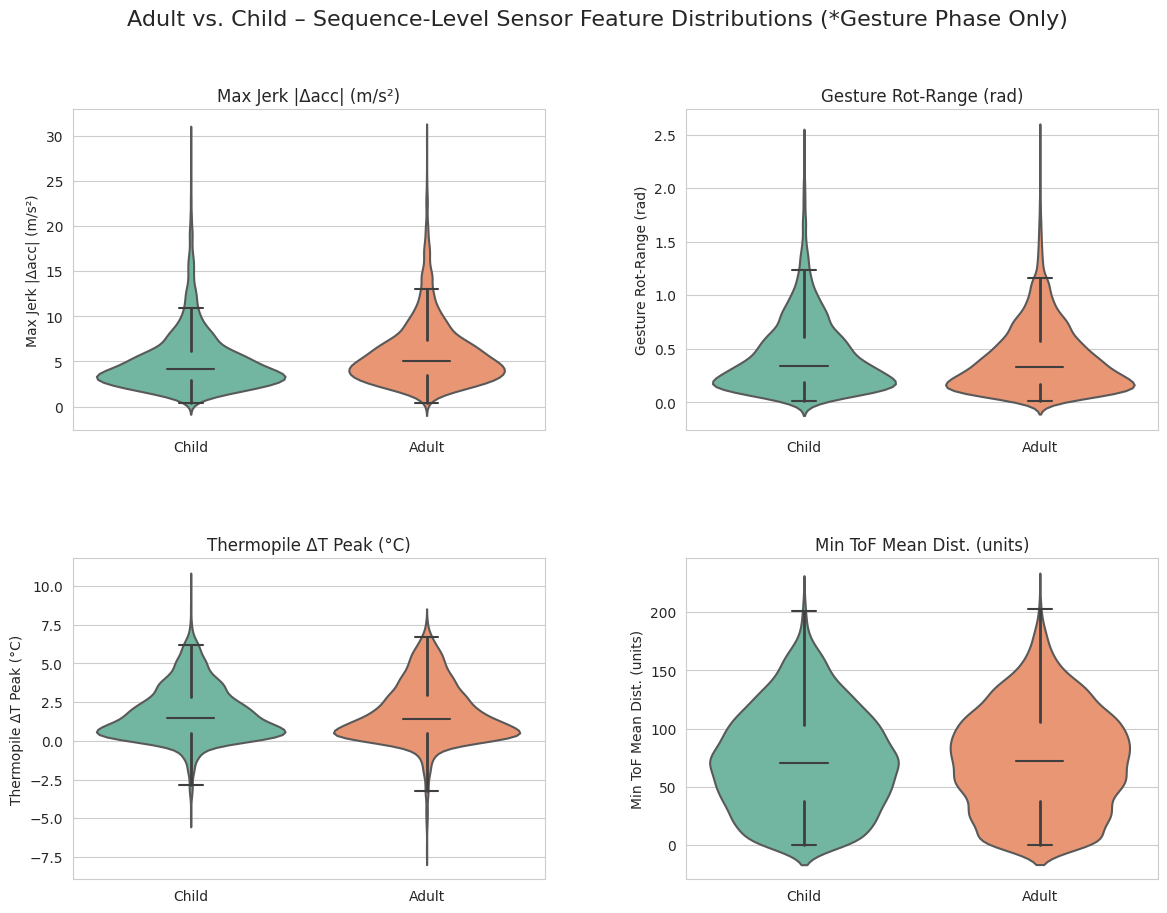

In [27]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ─── 1. Build sequence-level summaries for Adult vs. Child ─────────────────────────
seq_summaries = []
for seq_id, seq in train_df.groupby("sequence_id"):
    grp = seq["adult_child"].iloc[0]  # 0=child, 1=adult
    # Skip if no phase labels
    if seq["phase"].isna().all():
        continue
    # 1) Max Jerk (IMU)
    acc_mag = np.sqrt(seq["acc_x"]**2 + seq["acc_y"]**2 + seq["acc_z"]**2).values
    jerk    = np.abs(np.diff(acc_mag))
    max_jerk = jerk.max() if len(jerk) else np.nan
    # 2) Rotation range during Gesture
    rot_angle = 2 * np.arccos(seq["rot_w"].clip(-1,1))
    mask_g = seq["phase"]=="Gesture"
    rot_range = rot_angle[mask_g].max() - rot_angle[mask_g].min() if mask_g.any() else np.nan
    # 3) Thermopile peak ΔT
    thm = seq[[f"thm_{i}" for i in range(1,6)]].ffill().bfill().mean(axis=1)
    base = thm[seq["phase"]=="Transition"].median()
    peak_dt = thm[mask_g].max() - base if mask_g.any() else np.nan
    # 4) ToF min distance
    tof_means = []
    for i in range(1,6):
        col = f"tof_{i}_mean"
        if col not in seq:
            pix = seq[[f"tof_{i}_v{p}" for p in range(64)]].replace(-1,np.nan)
            seq[col] = pix.mean(axis=1)
        tof_means.append(seq[col])
    tof_min = pd.concat(tof_means,axis=1).mean(axis=1).min()
    seq_summaries.append({
        "sequence_id": seq_id,
        "adult_child": grp,
        "max_jerk": max_jerk,
        "rot_range": rot_range,
        "thm_peak_delta": peak_dt,
        "tof_min_distance": tof_min
    })

summary_df = pd.DataFrame(seq_summaries).dropna()
summary_df["Group"] = summary_df["adult_child"].map({0:"Child", 1:"Adult"})

# ─── 2. Plot distributions side-by-side ───────────────────────────────────────────────
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14,10), sharey=False)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

metrics = [
    ("max_jerk",         "Max Jerk |Δacc| (m/s²)"),
    ("rot_range",        "Gesture Rot-Range (rad)"),
    ("thm_peak_delta",   "Thermopile ΔT Peak (°C)"),
    ("tof_min_distance", "Min ToF Mean Dist. (units)")
]

for ax, (col, label) in zip(axes.flatten(), metrics):
    sns.violinplot(
        x="Group", y=col, data=summary_df,
        palette="Set2", inner=None, ax=ax
    )
    sns.boxplot(
        x="Group", y=col, data=summary_df,
        width=0.2, showcaps=True, boxprops={'facecolor':'white'},
        showfliers=False, whiskerprops={'linewidth':2}, ax=ax
    )
    ax.set_title(label, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel(label, fontsize=10)

fig.suptitle("Adult vs. Child – Sequence-Level Sensor Feature Distributions (*Gesture Phase Only)", fontsize=16)
plt.show()

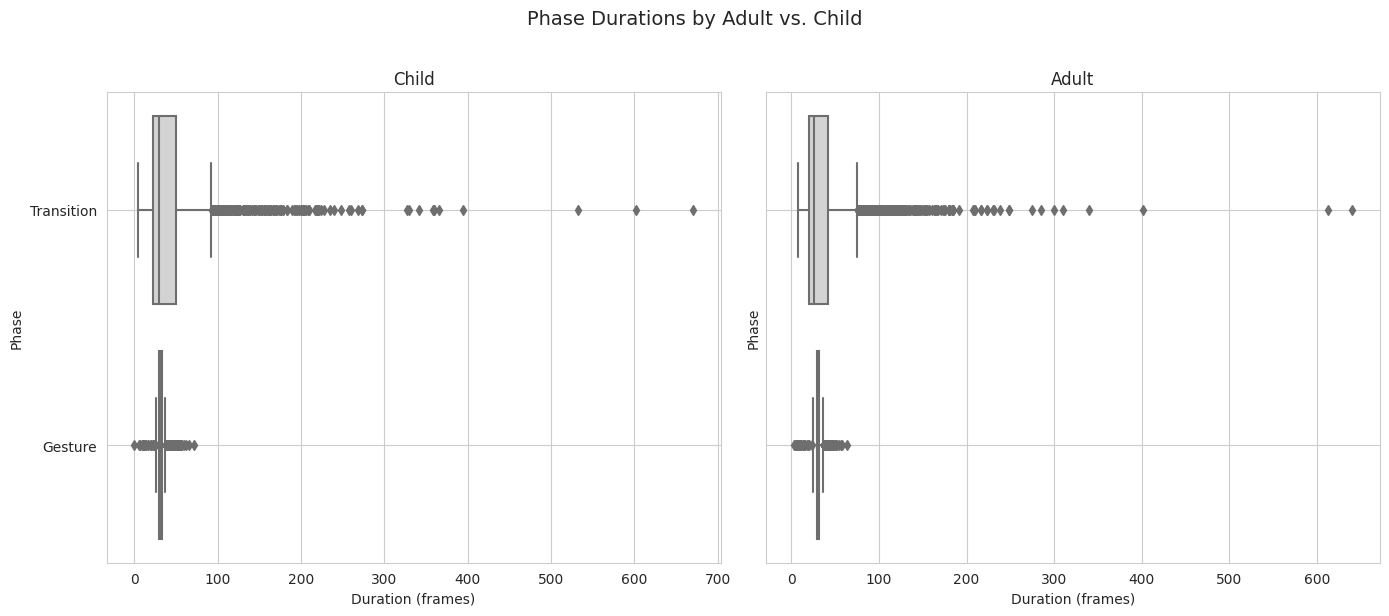

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# ─── Compute per-sequence phase durations for Adult vs. Child ─────────────────────────────────────────────────
dur_df = (
    train_df
    .groupby(['sequence_id', 'adult_child'])['phase']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

# Keep only Transition & Gesture columns
dur_df = dur_df[['sequence_id', 'adult_child', 'Transition', 'Gesture']]

# Melt to long form
dur_long = dur_df.melt(
    id_vars=['sequence_id', 'adult_child'],
    value_vars=['Transition', 'Gesture'],
    var_name='phase',
    value_name='duration_frames'
)

# Map adult_child to labels
dur_long['Group'] = dur_long['adult_child'].map({0: 'Child', 1: 'Adult'})

# ─── Plot side-by-side horizontal boxplots ─────────────────────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
plt.subplots_adjust(wspace=0.3)

for ax, group_label in zip(axes, ['Child', 'Adult']):
    subset = dur_long[dur_long['Group'] == group_label]
    sns.boxplot(
        data=subset,
        x='duration_frames',
        y='phase',
        orient='h',
        palette=['lightgray', 'lightcoral'],
        ax=ax
    )
    ax.set_title(f"{group_label}", fontsize=12)
    ax.set_xlabel("Duration (frames)", fontsize=10)
    ax.set_ylabel("Phase", fontsize=10)
    ax.grid(True)

plt.suptitle("Phase Durations by Adult vs. Child", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

⏩ Plots for Randomly Selected Subjects and One Gesture

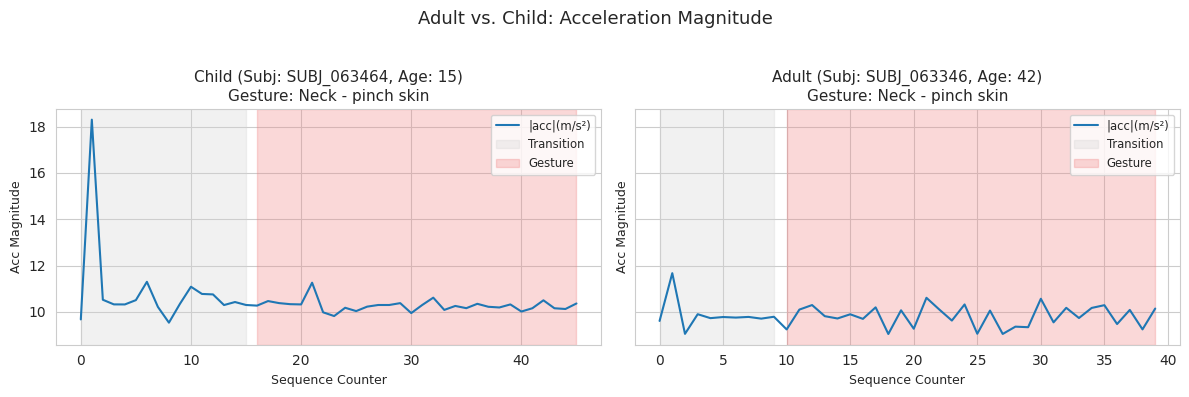

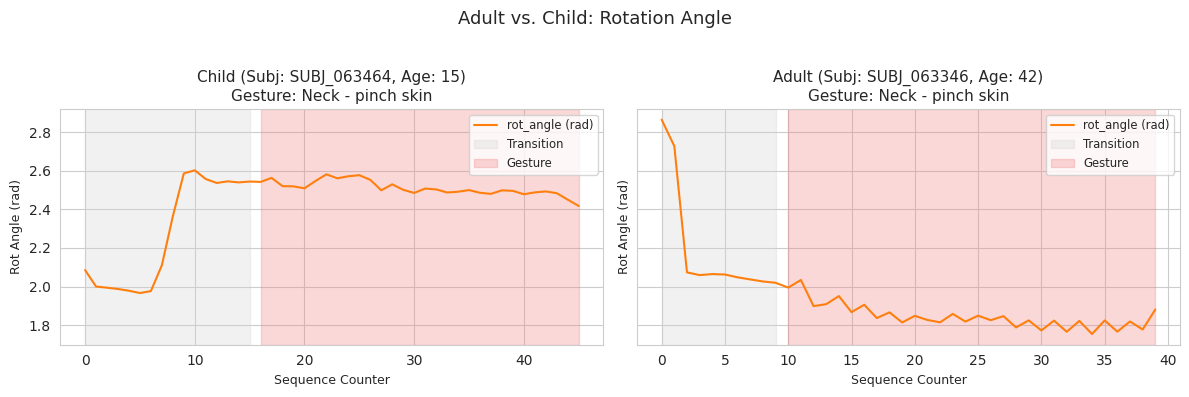

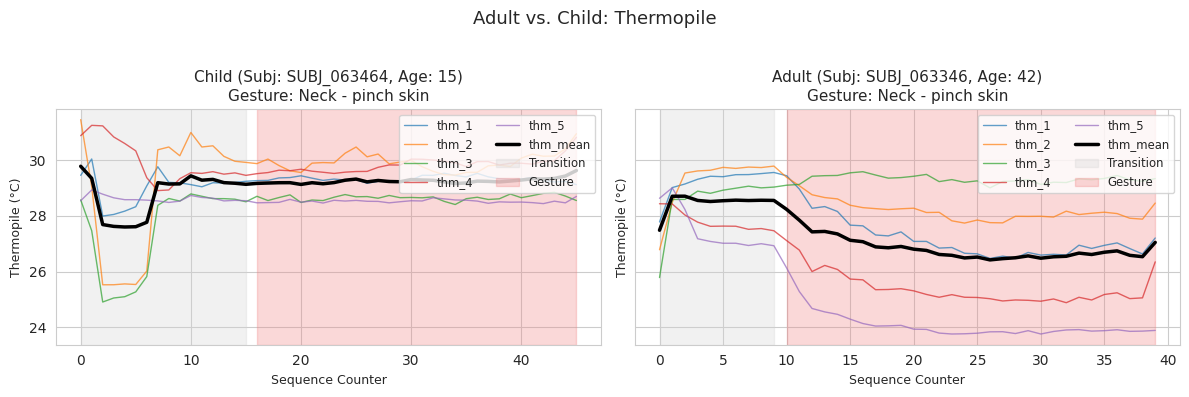

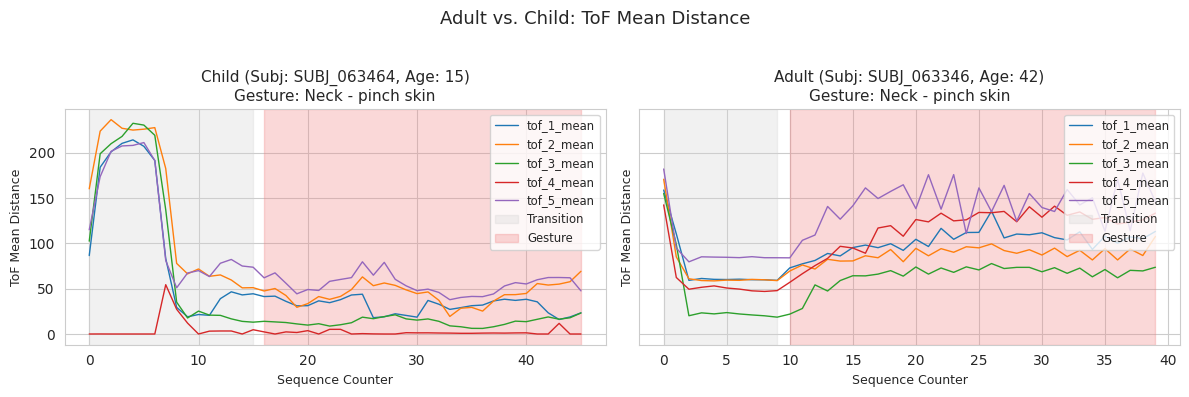

In [29]:
# ─── Cell B: Adult vs. Child Comparison for IMU, Rot, Thermopile, and ToF ───────────────────────────────────────

import numpy as np
import matplotlib.pyplot as plt

# (2) Pick one gesture to compare (change as needed)
gesture_to_plot = "Neck - pinch skin"

# (3) Filter to only rows with that gesture, split by adult_child (0=child, 1=adult)
df_gesture = train_df[train_df["gesture"] == gesture_to_plot].copy()
child_group = df_gesture[df_gesture["adult_child"] == 0]
adult_group = df_gesture[df_gesture["adult_child"] == 1]

if (child_group["sequence_id"].nunique() == 0) or (adult_group["sequence_id"].nunique() == 0):
    raise ValueError("Insufficient examples in one of the groups. Pick another gesture.")

child_seq = child_group["sequence_id"].unique()[0]
adult_seq = adult_group["sequence_id"].unique()[0]

df_child = train_df[train_df["sequence_id"] == child_seq].sort_values("sequence_counter")
df_adult = train_df[train_df["sequence_id"] == adult_seq].sort_values("sequence_counter")

# Compute derived IMU features on each
for df in (df_child, df_adult):
    df["acc_mag"] = np.sqrt(df["acc_x"]**2 + df["acc_y"]**2 + df["acc_z"]**2)
    df["rot_w_clipped"] = df["rot_w"].clip(-1, 1)
    df["rot_angle"] = 2 * np.arccos(df["rot_w_clipped"])

# Plot Helper to shade phases (re‐use function from Cell A)
def shade_phases(ax, seq_df):
    used = set()
    for phase_label, color in [("Transition", "lightgray"), ("Gesture", "lightcoral")]:
        mask = seq_df["phase"] == phase_label
        if not mask.any():
            continue
        idxs = seq_df.index[mask]
        diffs = np.where(np.diff(idxs) != 1)[0]
        spans = []
        start = idxs[0]
        for b in diffs:
            end = idxs[b]
            spans.append((start, end))
            start = idxs[b + 1]
        spans.append((start, idxs[-1]))
        for (s, e) in spans:
            t0 = seq_df.loc[s, "sequence_counter"]
            t1 = seq_df.loc[e, "sequence_counter"]
            label = phase_label if phase_label not in used else None
            ax.axvspan(t0, t1, color=color, alpha=0.3, label=label)
            used.add(phase_label)

# -----------------------------------------------------------------------------
# B.1: IMU – Acceleration Magnitude
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_child, df_adult],
    [f"Child (Subj: {df_child['subject'].iloc[0]}, Age: {df_child['age'].iloc[0]})",
     f"Adult (Subj: {df_adult['subject'].iloc[0]}, Age: {df_adult['age'].iloc[0]})"]
):
    ax.plot(df_seq["sequence_counter"], df_seq["acc_mag"],
            color="tab:blue", lw=1.5, label="|acc|(m/s²)")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Acc Magnitude", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Adult vs. Child: Acceleration Magnitude", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# B.2: IMU – Rotation Angle
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_child, df_adult],
    [f"Child (Subj: {df_child['subject'].iloc[0]}, Age: {df_child['age'].iloc[0]})",
     f"Adult (Subj: {df_adult['subject'].iloc[0]}, Age: {df_adult['age'].iloc[0]})"]
):
    ax.plot(df_seq["sequence_counter"], df_seq["rot_angle"],
            color="tab:orange", lw=1.5, label="rot_angle (rad)")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Rot Angle (rad)", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Adult vs. Child: Rotation Angle", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# B.3: Thermopile – 5 Channels + Mean
# -----------------------------------------------------------------------------
for df in (df_child, df_adult):
    thm_cols = [f"thm_{i}" for i in range(1,6)]
    df["thm_mean"] = df[thm_cols].mean(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_child, df_adult],
    [f"Child (Subj: {df_child['subject'].iloc[0]}, Age: {df_child['age'].iloc[0]})",
     f"Adult (Subj: {df_adult['subject'].iloc[0]}, Age: {df_adult['age'].iloc[0]})"]
):
    times = df_seq["sequence_counter"]
    for col in [f"thm_{i}" for i in range(1,6)]:
        ax.plot(times, df_seq[col], lw=1, label=col, alpha=0.7)
    ax.plot(times, df_seq["thm_mean"], color="black", lw=2.5, label="thm_mean")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Thermopile (°C)", fontsize=9)
    ax.legend(loc="upper right", fontsize="small", ncol=2)
    ax.grid(True)
plt.suptitle("Adult vs. Child: Thermopile", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# B.4: ToF – Five Mean‐Distance Channels
# -----------------------------------------------------------------------------
for df in (df_child, df_adult):
    for i_sensor in range(1,6):
        pixel_cols = [f"tof_{i_sensor}_v{pix}" for pix in range(64)]
        df[f"tof_{i_sensor}_mean"] = df[pixel_cols].replace(-1, np.nan).mean(axis=1)

mean_cols = [f"tof_{i}_mean" for i in range(1,6)]
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_child, df_adult],
    [f"Child (Subj: {df_child['subject'].iloc[0]}, Age: {df_child['age'].iloc[0]})",
     f"Adult (Subj: {df_adult['subject'].iloc[0]}, Age: {df_adult['age'].iloc[0]})"]
):
    times = df_seq["sequence_counter"]
    for col in mean_cols:
        ax.plot(times, df_seq[col], lw=1, label=col)
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("ToF Mean Distance", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Adult vs. Child: ToF Mean Distance", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 📌 Feature in Consideration:  **Sex (Female vs. Male)**

In this cell, we compare male versus female sensor patterns for one chosen gesture (e.g., “Forehead – scratch”). We produce the same four plots (IMU acc\_mag, IMU rot\_angle, thermopile, ToF). Differences may arise from average muscle strength, hand size, or gesture style.

**⏩ How to Interpret & Implications:**

* **IMU – Acceleration:** If males exhibit consistently higher acceleration peaks (due to greater average muscle output), the model can normalize IMU magnitude or learn sex‐specific calibration.
* **Rotation Angle:** Males and females might have different wrist rotation profiles; the classifier should not over‐rely on a particular rot\_angle pattern without considering sex.
* **Thermopile:** Female subjects often have slightly different baseline skin temperature, so thermopile curves may start at a different offset. Ensuring the model learns relative changes (rather than absolute) improves robustness.
* **ToF:** Male subjects’ hand shapes may produce different ToF cluster‐sizes. Incorporating sex helps the model adjust distance thresholds and spatial patterns, reducing misclassifications when evaluating proximity.

⏩ Plots for All Subjects and One Gesture

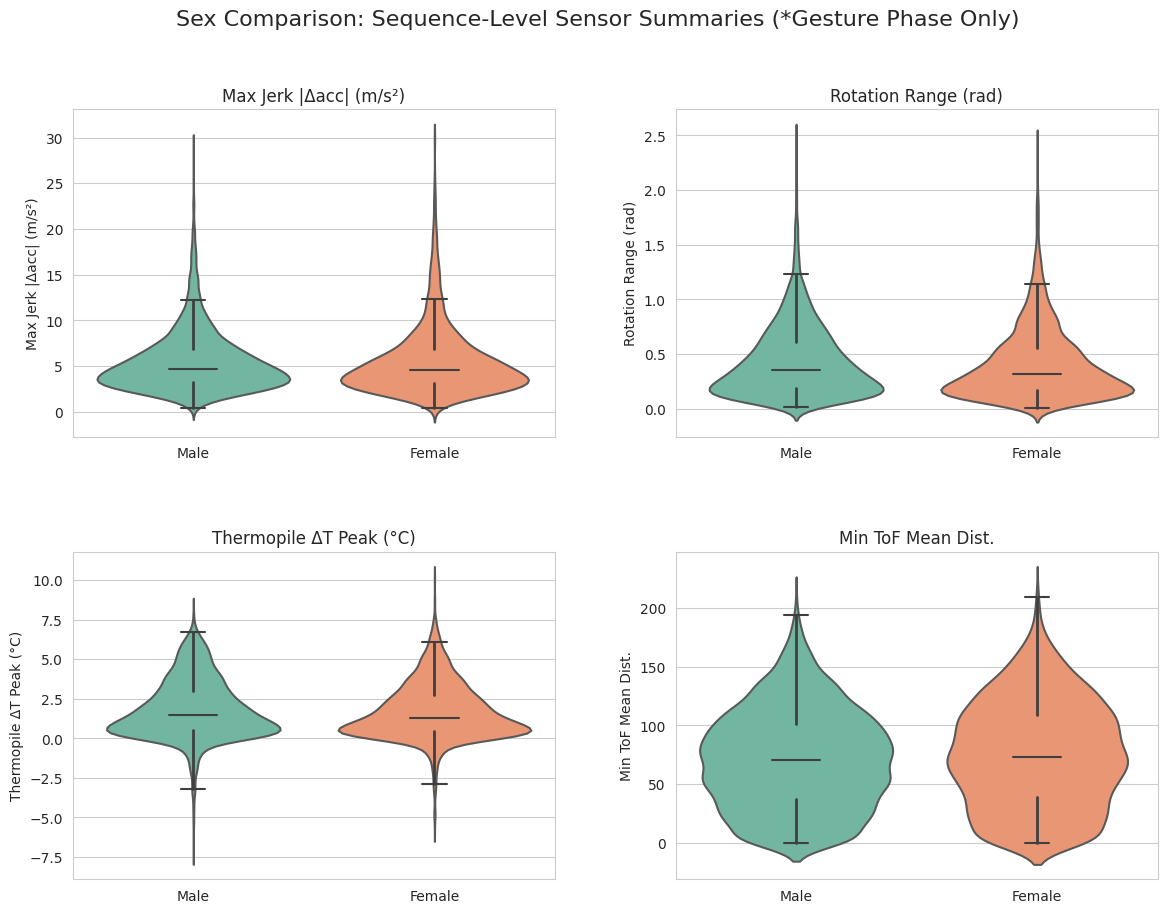

In [30]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ─── 1. Choose grouping variable for this cell ───────────────────────────────────────────────────────────────────
group_col = "sex"
group_map = {0: "Female", 1: "Male"}

# ─── 2. Build sequence-level summaries (if not yet created) ─────────────────────────────────────────────────────
# Reuse logic from the previous overview cell, but group on 'sex' instead of 'handedness'.

seq_stats = []
for seq_id, seq in train_df.groupby("sequence_id"):
    g = seq[group_col].iloc[0]
    if pd.isna(g):
        continue

    # Phase masks
    gest = seq["phase"] == "Gesture"

    # 1) IMU jerk
    acc = np.sqrt(seq["acc_x"]**2 + seq["acc_y"]**2 + seq["acc_z"]**2).values
    max_jerk = np.abs(np.diff(acc)).max() if len(acc)>1 else np.nan

    # 2) Rotation range in gesture
    rot = 2*np.arccos(seq["rot_w"].clip(-1,1))
    rot_range = rot[gest].max() - rot[gest].min() if gest.any() else np.nan

    # 3) Thermopile peak delta
    thms = seq[[f"thm_{i}" for i in range(1,6)]].ffill().bfill().mean(axis=1)
    baseline = thms[seq["phase"]=="Transition"].median() if (seq["phase"]=="Transition").any() else np.nan
    thm_peak = thms[gest].max() - baseline if gest.any() else np.nan

    # 4) ToF min mean distance
    tcols = []
    for i in range(1,6):
        col = f"tof_{i}_mean"
        if col not in seq:
            pix = seq[[f"tof_{i}_v{p}" for p in range(64)]].replace(-1, np.nan)
            seq[col] = pix.mean(axis=1)
        tcols.append(seq[col])
    tof_all = pd.concat(tcols, axis=1).mean(axis=1)
    tof_min = tof_all.min()

    seq_stats.append({
        "sequence_id": seq_id,
        group_col: g,
        "max_jerk": max_jerk,
        "rot_range": rot_range,
        "thm_peak_delta": thm_peak,
        "tof_min_distance": tof_min
    })

summary = pd.DataFrame(seq_stats).dropna()
summary["Group"] = summary[group_col].map(group_map)

# ─── 3. Plot tailored distributions ───────────────────────────────────────────────────────────────────────────
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.35, wspace=0.25)

metrics = [
    ("max_jerk",         "Max Jerk |Δacc| (m/s²)"),
    ("rot_range",        "Rotation Range (rad)"),
    ("thm_peak_delta",   "Thermopile ΔT Peak (°C)"),
    ("tof_min_distance", "Min ToF Mean Dist.")
]

for ax, (col, lbl) in zip(axes.flatten(), metrics):
    sns.violinplot(
        data=summary,
        x="Group", y=col,
        palette="Set2",
        inner=None,
        ax=ax
    )
    sns.boxplot(
        data=summary,
        x="Group", y=col,
        width=0.2,
        showcaps=True,
        boxprops={'facecolor':'white'},
        showfliers=False,
        whiskerprops={'linewidth':2},
        ax=ax
    )
    ax.set_title(lbl, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel(lbl, fontsize=10)

fig.suptitle("Sex Comparison: Sequence‐Level Sensor Summaries (*Gesture Phase Only)", fontsize=16)
plt.show()

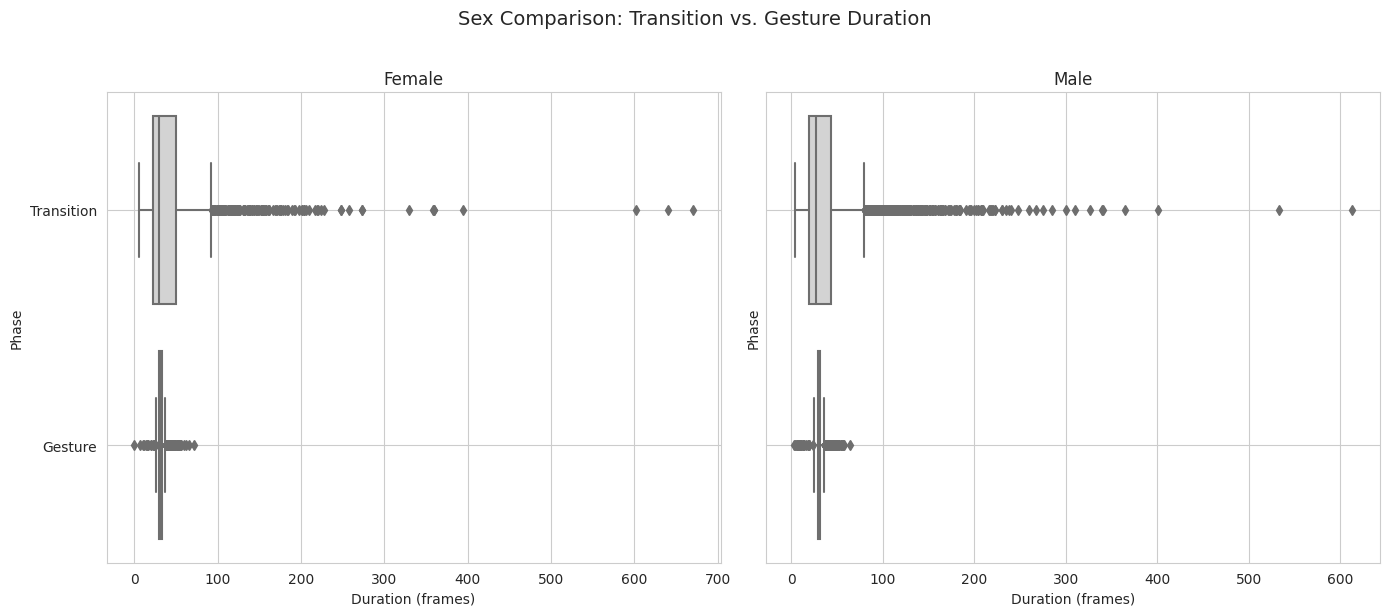

In [31]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ─── Compute per-sequence phase durations for Sex comparison ───────────────────────────────────────────────────────
# Assumes train_df already merged with train_dem_df

# Group by sequence_id and sex, count frames in each phase
dur_df_sex = (
    train_df
    .groupby(['sequence_id', 'sex'])['phase']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

# Keep only Transition & Gesture
dur_df_sex = dur_df_sex[['sequence_id', 'sex', 'Transition', 'Gesture']]

# Melt to long form
dur_long_sex = dur_df_sex.melt(
    id_vars=['sequence_id', 'sex'],
    value_vars=['Transition', 'Gesture'],
    var_name='phase',
    value_name='duration_frames'
)

# Map sex to labels
dur_long_sex['Group'] = dur_long_sex['sex'].map({0: 'Female', 1: 'Male'})

# ─── Plot horizontal boxplots side-by-side ─────────────────────────────────────────────────────────────────────────
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
plt.subplots_adjust(wspace=0.2)

for ax, group_label in zip(axes, ['Female', 'Male']):
    subset = dur_long_sex[dur_long_sex['Group'] == group_label]
    sns.boxplot(
        data=subset,
        x='duration_frames',
        y='phase',
        orient='h',
        palette={'Transition':'lightgray', 'Gesture':'lightcoral'},
        ax=ax
    )
    ax.set_title(f"{group_label}", fontsize=12)
    ax.set_xlabel("Duration (frames)", fontsize=10)
    ax.set_ylabel("Phase", fontsize=10)
    ax.grid(True)

fig.suptitle("Sex Comparison: Transition vs. Gesture Duration", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

⏩ Plots for Randomly Selected Subjects and One Gesture

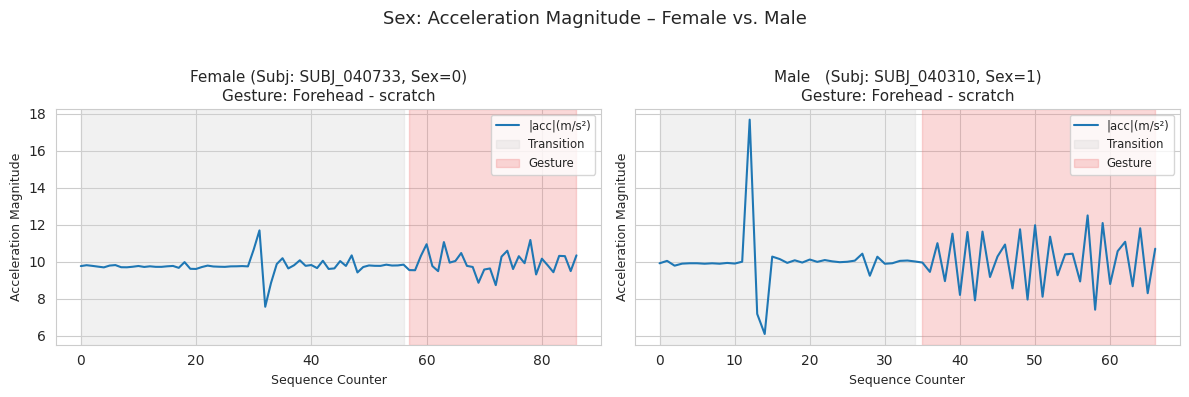

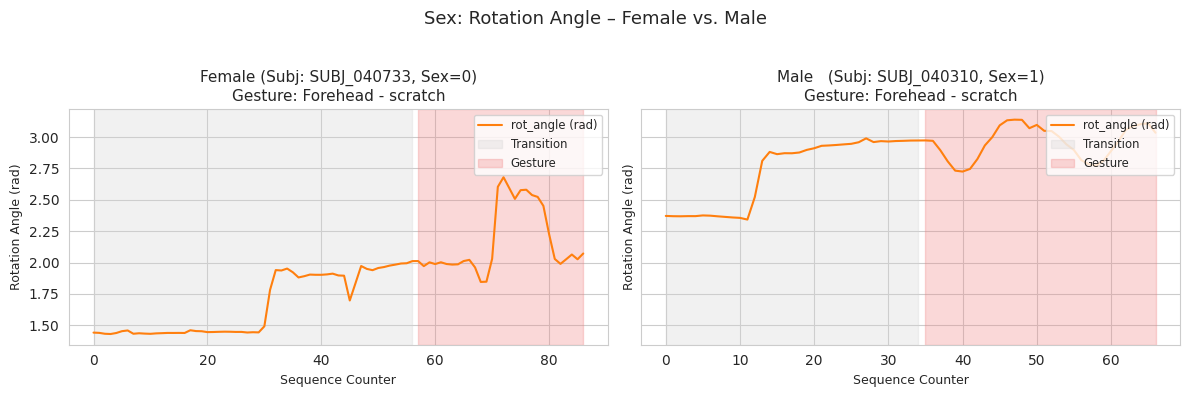

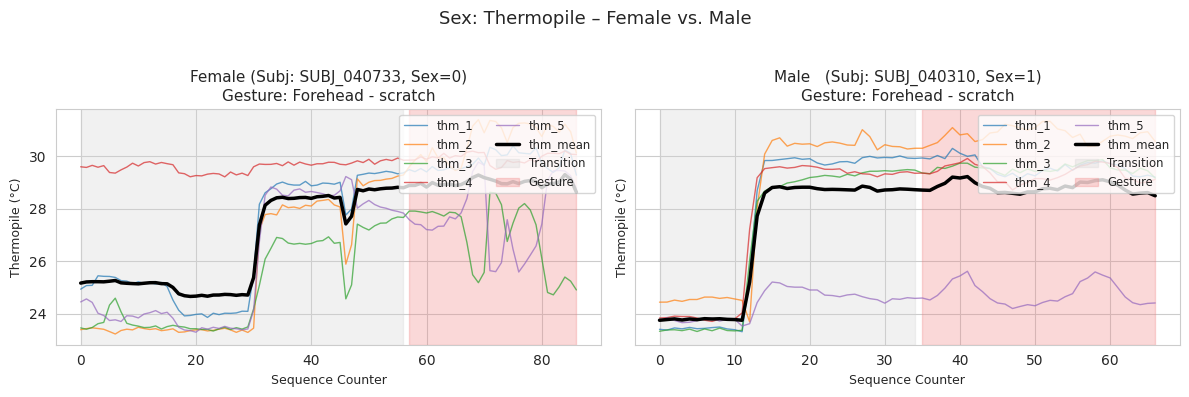

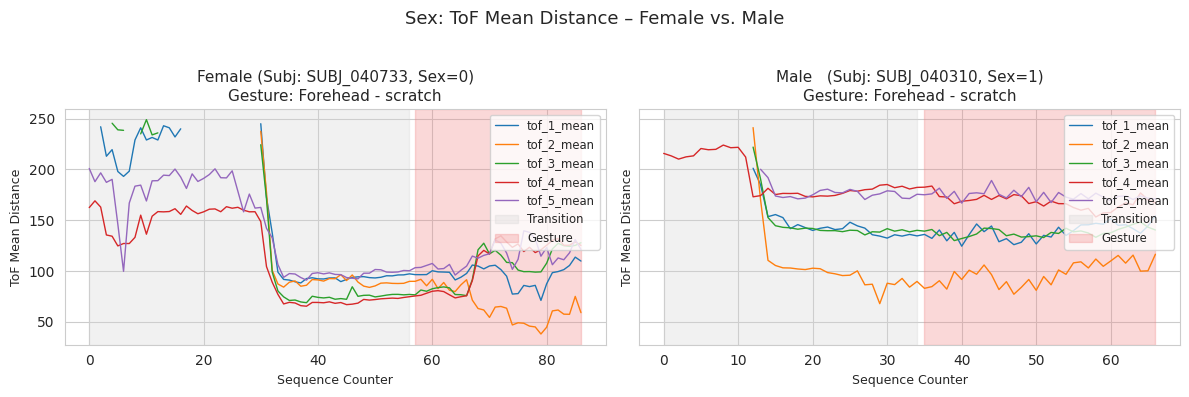

In [32]:
# ─── Cell C: Sex Comparison for IMU, Rot, Thermopile, and ToF ───────────────────────────────────────────────────

# (2) Pick one gesture to compare (change as needed)
gesture_to_plot = "Forehead - scratch"

# (3) Filter to only rows with that gesture, split by sex (0=female, 1=male)
df_gesture = train_df[train_df["gesture"] == gesture_to_plot].copy()
female_group = df_gesture[df_gesture["sex"] == 0]
male_group   = df_gesture[df_gesture["sex"] == 1]

if (female_group["sequence_id"].nunique() == 0) or (male_group["sequence_id"].nunique() == 0):
    raise ValueError("Not enough examples for each sex. Try a different gesture.")

female_seq = female_group["sequence_id"].unique()[0]
male_seq   = male_group["sequence_id"].unique()[0]

df_fem = train_df[train_df["sequence_id"] == female_seq].sort_values("sequence_counter")
df_male= train_df[train_df["sequence_id"] == male_seq].sort_values("sequence_counter")

# Compute derived IMU features
for df in (df_fem, df_male):
    df["acc_mag"] = np.sqrt(df["acc_x"]**2 + df["acc_y"]**2 + df["acc_z"]**2)
    df["rot_w_clipped"] = df["rot_w"].clip(-1, 1)
    df["rot_angle"] = 2 * np.arccos(df["rot_w_clipped"])

# Re‐use shading function
def shade_phases(ax, seq_df):
    used = set()
    for phase_label, color in [("Transition", "lightgray"), ("Gesture", "lightcoral")]:
        mask = seq_df["phase"] == phase_label
        if not mask.any():
            continue
        idxs = seq_df.index[mask]
        diffs = np.where(np.diff(idxs) != 1)[0]
        spans = []
        start = idxs[0]
        for b in diffs:
            end = idxs[b]
            spans.append((start, end))
            start = idxs[b + 1]
        spans.append((start, idxs[-1]))
        for (s, e) in spans:
            t0 = seq_df.loc[s, "sequence_counter"]
            t1 = seq_df.loc[e, "sequence_counter"]
            label = phase_label if phase_label not in used else None
            ax.axvspan(t0, t1, color=color, alpha=0.3, label=label)
            used.add(phase_label)

# -----------------------------------------------------------------------------
# C.1: IMU – Acceleration Magnitude
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_fem, df_male],
    [f"Female (Subj: {df_fem['subject'].iloc[0]}, Sex=0)",
     f"Male   (Subj: {df_male['subject'].iloc[0]}, Sex=1)"]
):
    ax.plot(df_seq["sequence_counter"], df_seq["acc_mag"],
            color="tab:blue", lw=1.5, label="|acc|(m/s²)")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Acceleration Magnitude", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Sex: Acceleration Magnitude – Female vs. Male", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# C.2: IMU – Rotation Angle
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_fem, df_male],
    [f"Female (Subj: {df_fem['subject'].iloc[0]}, Sex=0)",
     f"Male   (Subj: {df_male['subject'].iloc[0]}, Sex=1)"]
):
    ax.plot(df_seq["sequence_counter"], df_seq["rot_angle"],
            color="tab:orange", lw=1.5, label="rot_angle (rad)")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Rotation Angle (rad)", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Sex: Rotation Angle – Female vs. Male", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# C.3: Thermopile – 5 Channels + Mean
# -----------------------------------------------------------------------------
for df in (df_fem, df_male):
    thm_cols = [f"thm_{i}" for i in range(1,6)]
    df["thm_mean"] = df[thm_cols].mean(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_fem, df_male],
    [f"Female (Subj: {df_fem['subject'].iloc[0]}, Sex=0)",
     f"Male   (Subj: {df_male['subject'].iloc[0]}, Sex=1)"]
):
    times = df_seq["sequence_counter"]
    for col in [f"thm_{i}" for i in range(1,6)]:
        ax.plot(times, df_seq[col], lw=1, label=col, alpha=0.7)
    ax.plot(times, df_seq["thm_mean"], color="black", lw=2.5, label="thm_mean")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Thermopile (°C)", fontsize=9)
    ax.legend(loc="upper right", fontsize="small", ncol=2)
    ax.grid(True)
plt.suptitle("Sex: Thermopile – Female vs. Male", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# C.4: ToF – Five Mean‐Distance Channels
# -----------------------------------------------------------------------------
for df in (df_fem, df_male):
    for i_sensor in range(1,6):
        pixel_cols = [f"tof_{i_sensor}_v{pix}" for pix in range(64)]
        df[f"tof_{i_sensor}_mean"] = df[pixel_cols].replace(-1, np.nan).mean(axis=1)

mean_cols = [f"tof_{i}_mean" for i in range(1,6)]
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_fem, df_male],
    [f"Female (Subj: {df_fem['subject'].iloc[0]}, Sex=0)",
     f"Male   (Subj: {df_male['subject'].iloc[0]}, Sex=1)"]
):
    times = df_seq["sequence_counter"]
    for col in mean_cols:
        ax.plot(times, df_seq[col], lw=1, label=col)
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("ToF Mean Distance", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Sex: ToF Mean Distance – Female vs. Male", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 📌 Feature in Consideration: **Shoulder-to-Wrist Length**

This cell splits sequences by shoulder-to-wrist length (short vs. long arms) for one gesture (e.g., “Eyelash – pull hair”). We plot the same four sensor modalities. A subject with a longer arm may approach the face at a different angle and velocity, altering all sensor signatures.

**⏩ How to Interpret & Implications:**

* **IMU:** Longer‐armed subjects often have smoother “acc\_mag” curves (less abrupt changes) because longer limbs generate slower angular acceleration. The classifier can learn length‐normalized features to avoid penalizing a smoother acceleration pattern.
* **Rotation Angle:** Subjects with long arms might exhibit shallower “rot\_angle” peaks (larger arcs but slower rotation). The model’s temporal filters should adjust for this to avoid confusing “slower rotations” with a different gesture type.
* **Thermopile:** A longer arm may cause thermopile sensors to detect heat slightly later (because the wrist travels a greater distance). Training the model on both arm‐length groups prevents mislabeling a delay as “no contact.”
* **ToF:** The initial ToF distance drop for a long‐armed subject may occur at a higher distance (since the hand moves through more space before contact). By learning length‐informed thresholds, the model reduces false negatives when contact occurs farther away.

⏩ Plots for All Subjects and One Gesture

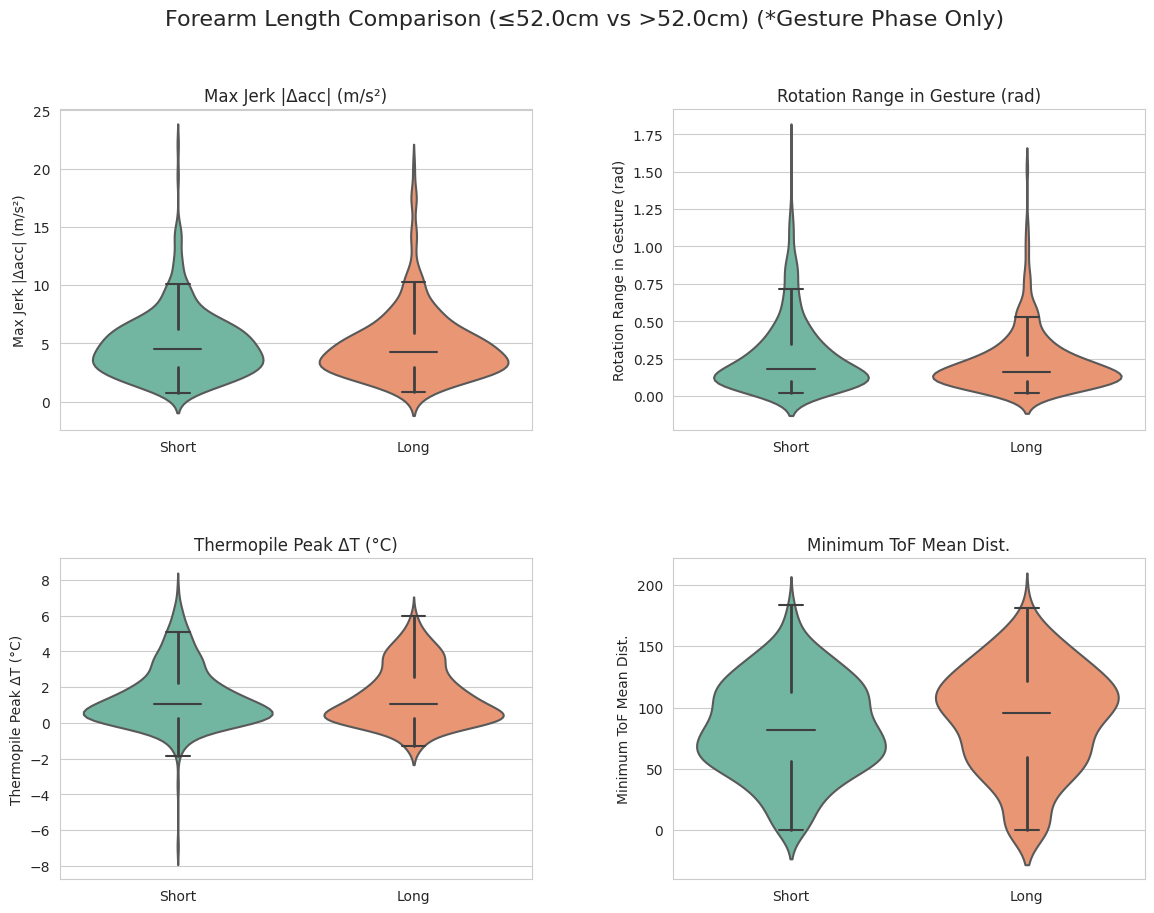

In [33]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ─── Sequence‐Level Summaries for Short vs. Long Forearm ───────────────────────────────────────────────────────────
# We define 4 tailored metrics as before, but group by
#   'short'  = shoulder_to_wrist_cm ≤ median
#   'long'   = shoulder_to_wrist_cm > median

# 1) Choose gesture (same as plotting cell)
gesture_to_plot = "Eyelash - pull hair"
df_g = train_df[train_df["gesture"] == gesture_to_plot].copy()

# 2) Determine median forearm length
median_len = df_g["shoulder_to_wrist_cm"].median()

# 3) Build summaries
records = []
for seq_id, seq in train_df[train_df["gesture"] == gesture_to_plot].groupby("sequence_id"):
    L = seq["shoulder_to_wrist_cm"].iloc[0]
    grp = "Short" if L <= median_len else "Long"
    # IMU jerk
    acc_mag = np.sqrt(seq["acc_x"]**2 + seq["acc_y"]**2 + seq["acc_z"]**2)
    jerks = np.abs(np.diff(acc_mag))
    max_jerk = jerks.max() if len(jerks)>0 else np.nan
    # Rotational range in Gesture
    rot = 2*np.arccos(seq["rot_w"].clip(-1,1))
    rot_rng = rot[seq["phase"]=="Gesture"].max() - rot[seq["phase"]=="Gesture"].min() \
              if (seq["phase"]=="Gesture").any() else np.nan
    # Thermopile peak delta
    thm_cols = [f"thm_{i}" for i in range(1,6)]
    thm_mean = seq[thm_cols].mean(axis=1)
    base = thm_mean[seq["phase"]=="Transition"].median()
    peak_dt = thm_mean[seq["phase"]=="Gesture"].max() - base \
              if (seq["phase"]=="Gesture").any() else np.nan
    # ToF min mean
    tof_means = []
    for i in range(1,6):
        pix = seq[[f"tof_{i}_v{p}" for p in range(64)]].replace(-1,np.nan)
        tof_means.append(pix.mean(axis=1))
    tof_all = pd.concat(tof_means,axis=1).mean(axis=1)
    min_tof = tof_all.min()
    records.append({
        "Group":         grp,
        "max_jerk":      max_jerk,
        "rot_range":     rot_rng,
        "thm_peak_dt":   peak_dt,
        "tof_min_dist":  min_tof
    })

summary = pd.DataFrame(records).dropna()

# ─── Plot tailored violin+box for each metric ───────────────────────────────────────────────────────────────────
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14,10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

metrics = [
    ("max_jerk",     "Max Jerk |Δacc| (m/s²)"),
    ("rot_range",    "Rotation Range in Gesture (rad)"),
    ("thm_peak_dt",  "Thermopile Peak ΔT (°C)"),
    ("tof_min_dist", "Minimum ToF Mean Dist.")
]

for ax, (col, label) in zip(axes.flatten(), metrics):
    sns.violinplot(data=summary, x="Group", y=col, palette="Set2", ax=ax, inner=None)
    sns.boxplot(data=summary, x="Group", y=col,
                width=0.2, showcaps=True, boxprops={'facecolor':'white'},
                showfliers=False, whiskerprops={'linewidth':2}, ax=ax)
    ax.set_title(label, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel(label, fontsize=10)

fig.suptitle(f"Forearm Length Comparison (≤{median_len:.1f}cm vs >{median_len:.1f}cm) (*Gesture Phase Only)", fontsize=16)
plt.show()

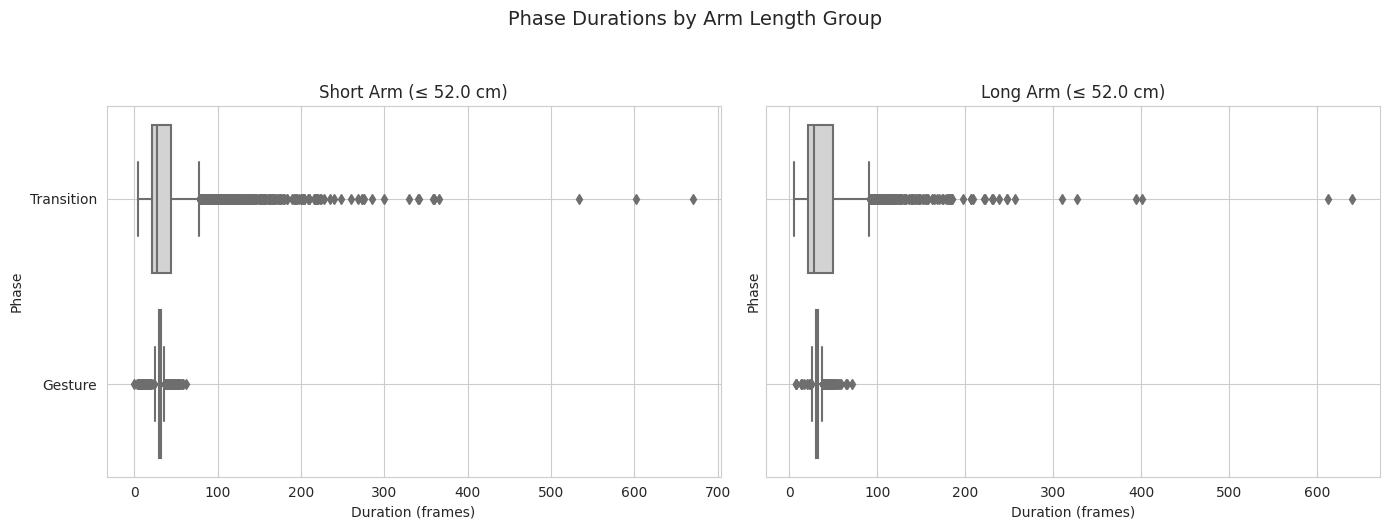

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ─── Compute per-sequence phase durations for all sequences ────────────────────────────────────────────────
# Assumes train_df already has shoulder_to_wrist_cm merged and 'phase' column

# Tag each sequence as Short vs. Long arm based on median shoulder_to_wrist_cm across all sequences
med = train_df.groupby('sequence_id')['shoulder_to_wrist_cm'].first().median()
seq_meta = (
    train_df
    .groupby('sequence_id')
    .agg({'shoulder_to_wrist_cm':'first'})
    .reset_index()
)
seq_meta['ArmGroup'] = np.where(seq_meta['shoulder_to_wrist_cm'] <= med,
                                'Short Arm', 'Long Arm')

# Count frames per phase per sequence
dur = (
    train_df
    .groupby(['sequence_id','phase'])['sequence_counter']
    .count()
    .unstack(fill_value=0)
    .reset_index()
)

# Merge in arm group label
dur = dur.merge(seq_meta[['sequence_id','ArmGroup']], on='sequence_id')

# Melt to long form
dur_long = dur.melt(id_vars=['sequence_id','ArmGroup'],
                    value_vars=['Transition','Gesture'],
                    var_name='Phase', value_name='Duration')

# ─── Plot Horizontal Boxplots: Short vs. Long Arm ─────────────────────────────────────────────────────────
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)
for ax, grp in zip(axes, ['Short Arm','Long Arm']):
    sub = dur_long[dur_long['ArmGroup']==grp]
    sns.boxplot(x='Duration', y='Phase', data=sub,
                palette=['lightgray','lightcoral'], ax=ax)
    ax.set_title(f"{grp} (≤ {med:.1f} cm)", fontsize=12)
    ax.set_xlabel("Duration (frames)", fontsize=10)
    ax.set_ylabel("Phase", fontsize=10)
    ax.grid(True)

plt.suptitle("Phase Durations by Arm Length Group", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

⏩ Plots for Randomly Selected Subjects and One Gesture

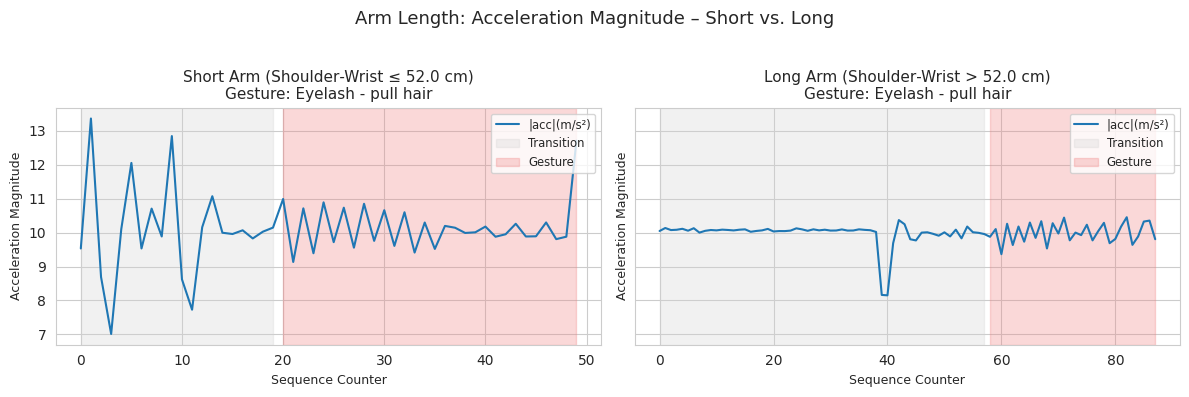

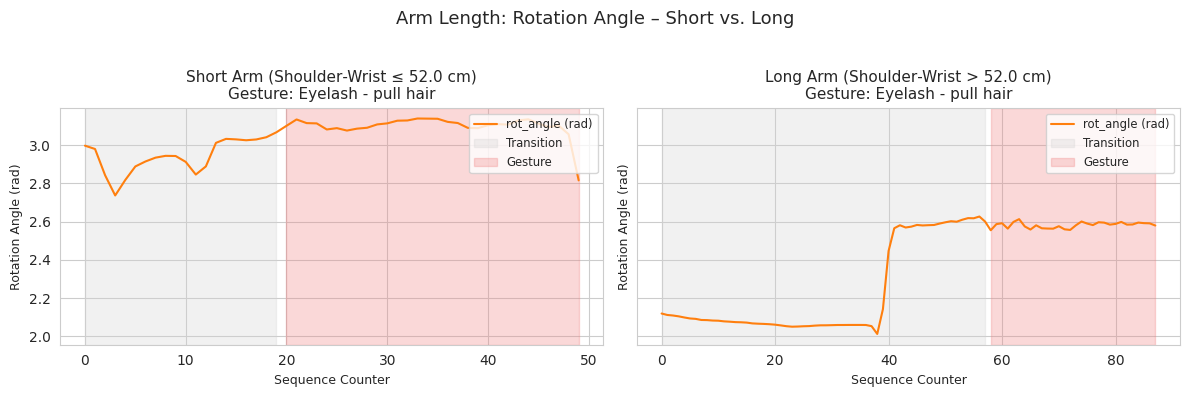

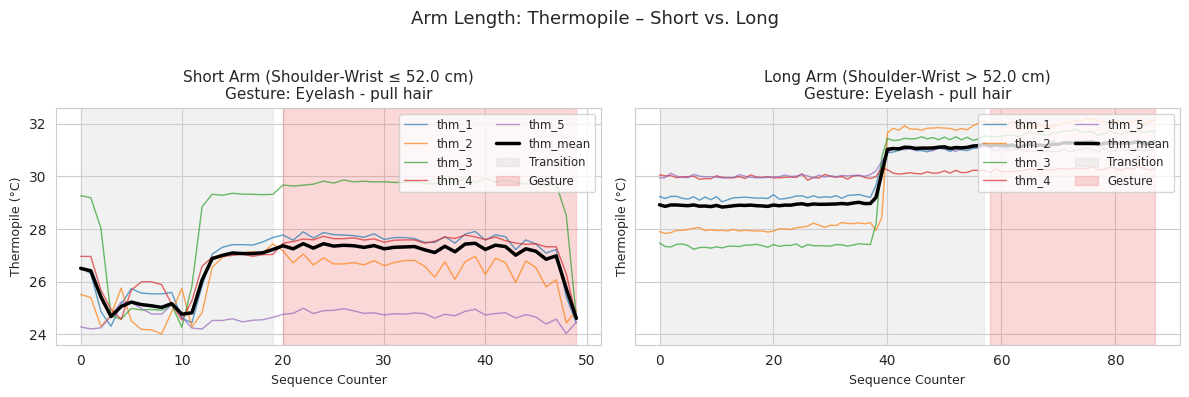

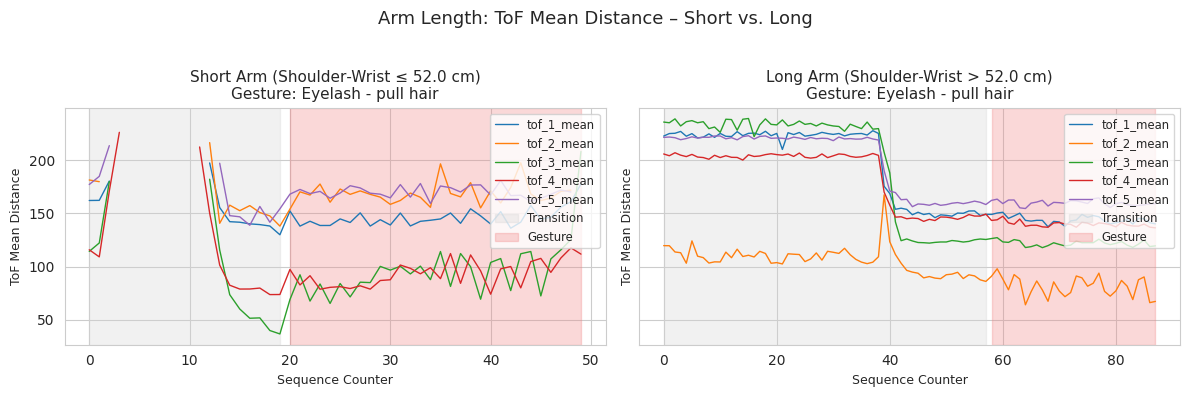

In [35]:
# ─── Cell D: Shoulder‐to‐Wrist Length Comparison (Short vs. Long) for IMU, Rot, Thermopile, and ToF ───────────

# (2) Pick one gesture to compare (change as needed)
gesture_to_plot = "Eyelash - pull hair"

# (3) Filter to that gesture and split by shoulder_to_wrist length using median
df_gesture = train_df[train_df["gesture"] == gesture_to_plot].copy()
median_shoulder = df_gesture["shoulder_to_wrist_cm"].median()

short_group = df_gesture[df_gesture["shoulder_to_wrist_cm"] <= median_shoulder]
long_group  = df_gesture[df_gesture["shoulder_to_wrist_cm"]  > median_shoulder]

if (short_group["sequence_id"].nunique() == 0) or (long_group["sequence_id"].nunique() == 0):
    raise ValueError("Not enough examples in one of the length‐groups. Try another gesture or adjust threshold.")

short_seq = short_group["sequence_id"].unique()[0]
long_seq  = long_group["sequence_id"].unique()[0]

df_short = train_df[train_df["sequence_id"] == short_seq].sort_values("sequence_counter")
df_long  = train_df[train_df["sequence_id"] == long_seq].sort_values("sequence_counter")

# Compute IMU derived features
for df in (df_short, df_long):
    df["acc_mag"] = np.sqrt(df["acc_x"]**2 + df["acc_y"]**2 + df["acc_z"]**2)
    df["rot_w_clipped"] = df["rot_w"].clip(-1, 1)
    df["rot_angle"] = 2 * np.arccos(df["rot_w_clipped"])

# Re‐use shading function
def shade_phases(ax, seq_df):
    used = set()
    for phase_label, color in [("Transition", "lightgray"), ("Gesture", "lightcoral")]:
        mask = seq_df["phase"] == phase_label
        if not mask.any():
            continue
        idxs = seq_df.index[mask]
        diffs = np.where(np.diff(idxs) != 1)[0]
        spans = []
        start = idxs[0]
        for b in diffs:
            end = idxs[b]
            spans.append((start, end))
            start = idxs[b + 1]
        spans.append((start, idxs[-1]))
        for (s, e) in spans:
            t0 = seq_df.loc[s, "sequence_counter"]
            t1 = seq_df.loc[e, "sequence_counter"]
            label = phase_label if phase_label not in used else None
            ax.axvspan(t0, t1, color=color, alpha=0.3, label=label)
            used.add(phase_label)

# -----------------------------------------------------------------------------
# D.1: IMU – Acceleration Magnitude
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_short, df_long],
    [f"Short Arm (Shoulder‐Wrist ≤ {median_shoulder:.1f} cm)",
     f"Long Arm (Shoulder‐Wrist > {median_shoulder:.1f} cm)"]
):
    ax.plot(df_seq["sequence_counter"], df_seq["acc_mag"],
            color="tab:blue", lw=1.5, label="|acc|(m/s²)")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Acceleration Magnitude", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Arm Length: Acceleration Magnitude – Short vs. Long", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# D.2: IMU – Rotation Angle
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_short, df_long],
    [f"Short Arm (Shoulder‐Wrist ≤ {median_shoulder:.1f} cm)",
     f"Long Arm (Shoulder‐Wrist > {median_shoulder:.1f} cm)"]
):
    ax.plot(df_seq["sequence_counter"], df_seq["rot_angle"],
            color="tab:orange", lw=1.5, label="rot_angle (rad)")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Rotation Angle (rad)", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Arm Length: Rotation Angle – Short vs. Long", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# D.3: Thermopile – 5 Channels + Mean
# -----------------------------------------------------------------------------
for df in (df_short, df_long):
    thm_cols = [f"thm_{i}" for i in range(1,6)]
    df["thm_mean"] = df[thm_cols].mean(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_short, df_long],
    [f"Short Arm (Shoulder‐Wrist ≤ {median_shoulder:.1f} cm)",
     f"Long Arm (Shoulder‐Wrist > {median_shoulder:.1f} cm)"]
):
    times = df_seq["sequence_counter"]
    for col in [f"thm_{i}" for i in range(1,6)]:
        ax.plot(times, df_seq[col], lw=1, label=col, alpha=0.7)
    ax.plot(times, df_seq["thm_mean"], color="black", lw=2.5, label="thm_mean")
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("Thermopile (°C)", fontsize=9)
    ax.legend(loc="upper right", fontsize="small", ncol=2)
    ax.grid(True)
plt.suptitle("Arm Length: Thermopile – Short vs. Long", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------------
# D.4: ToF – Five Mean‐Distance Channels
# -----------------------------------------------------------------------------
for df in (df_short, df_long):
    for i_sensor in range(1,6):
        pixel_cols = [f"tof_{i_sensor}_v{pix}" for pix in range(64)]
        df[f"tof_{i_sensor}_mean"] = df[pixel_cols].replace(-1, np.nan).mean(axis=1)

mean_cols = [f"tof_{i}_mean" for i in range(1,6)]
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, df_seq, title in zip(
    axes,
    [df_short, df_long],
    [f"Short Arm (Shoulder‐Wrist ≤ {median_shoulder:.1f} cm)",
     f"Long Arm (Shoulder‐Wrist > {median_shoulder:.1f} cm)"]
):
    times = df_seq["sequence_counter"]
    for col in mean_cols:
        ax.plot(times, df_seq[col], lw=1, label=col)
    shade_phases(ax, df_seq)
    ax.set_title(f"{title}\nGesture: {gesture_to_plot}", fontsize=11)
    ax.set_xlabel("Sequence Counter", fontsize=9)
    ax.set_ylabel("ToF Mean Distance", fontsize=9)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
plt.suptitle("Arm Length: ToF Mean Distance – Short vs. Long", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<b><span style="color: #FFFFFF; background-color: #2E8B57; padding: 20px; font-size: 18px; border-left: 8px solid #006400"> [3.3.3] <strong>Correlation Analysis</strong></span></b>

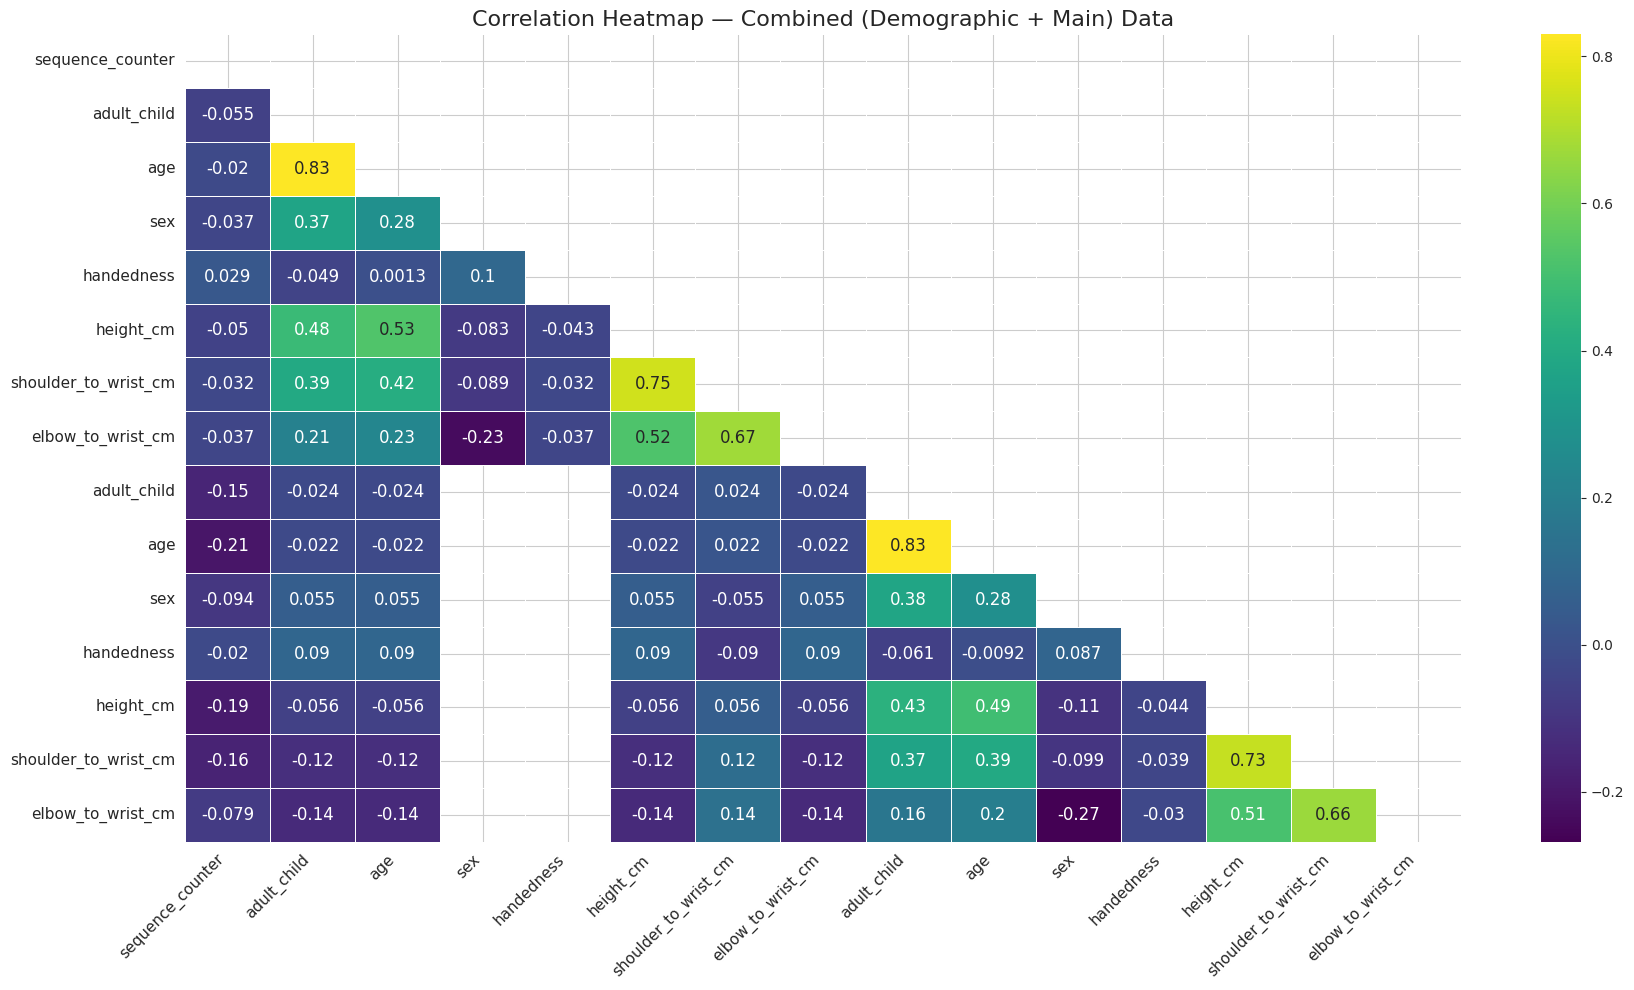

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine train & test for both datasets
combined_main = pd.concat([train_df, test_df], axis=0)
combined_demo = pd.concat([train_dem_df, test_dem_df], axis=0)

# Set target
target_variable = 'gesture'

# Define sensor prefixes and exclusion list
sensor_prefixes = ('acc_', 'rot_', 'thm_', 'tof_')
excluded_columns = [target_variable]

# Identify usable numerical variables (non-sensor, numeric only)
def get_numerical_columns(df, exclude_prefixes, excluded_cols):
    return [col for col in df.columns 
            if pd.api.types.is_numeric_dtype(df[col]) 
            and not col.startswith(exclude_prefixes)
            and col not in excluded_cols]

main_vars = get_numerical_columns(combined_main, sensor_prefixes, excluded_columns)
demo_vars = get_numerical_columns(combined_demo, (), excluded_columns)

# Combine both for global correlation
combined_data = pd.concat([
    combined_main[main_vars].reset_index(drop=True),
    combined_demo[demo_vars].reset_index(drop=True)
], axis=1)

# Compute correlation and mask upper triangle
corr_all = combined_data.corr()
mask_all = np.triu(np.ones_like(corr_all, dtype=bool))

# Plot
plt.figure(figsize=(18, 10))
ax = sns.heatmap(
    corr_all, mask=mask_all, cmap='viridis', annot=True, 
    square=False, linewidths=.5, annot_kws={"size": 12}
)
plt.title('Correlation Heatmap — Combined (Demographic + Main) Data', fontsize=16)

# Rotate x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.tight_layout()
plt.show()

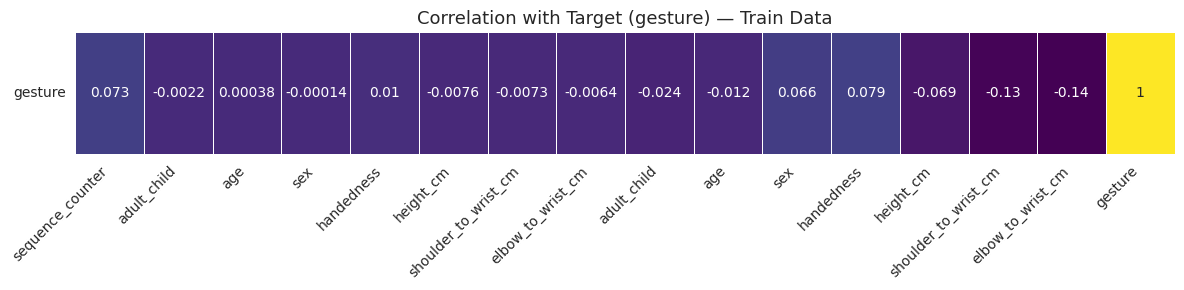

In [37]:
from sklearn.preprocessing import LabelEncoder

# Copy and encode target
train_corr_df = train_df.copy()
train_corr_df[target_variable] = LabelEncoder().fit_transform(train_corr_df[target_variable])

# Extract valid numerical features from train only
train_main_vars = get_numerical_columns(train_corr_df, sensor_prefixes, excluded_columns)

# Include demographic features too
train_demo_vars = get_numerical_columns(train_dem_df, (), excluded_columns)

# Combine both
train_all_corr = pd.concat([train_corr_df[train_main_vars], train_dem_df[train_demo_vars],
                            train_corr_df[[target_variable]]], axis=1)

# Correlation with target only
corr_target_only = train_all_corr.corr()[[target_variable]].T

# Plot
plt.figure(figsize=(12, 3))
sns.heatmap(corr_target_only, cmap='viridis', annot=True, linewidths=0.5, cbar=False, annot_kws={"size": 10})
plt.title("Correlation with Target (gesture) — Train Data", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<div style="background-color: #FEF9E7; border-left: 8px solid #F1C40F; padding: 20px; border-radius: 8px; font-size: 14px; color: #7D6608;">
  <h3 style="font-size: 18px; margin-bottom: 10px;">🚧 <strong>Notebook In Progress</strong></h3>
  <hr style="border-color: #F7DC6F;">
  <p>This notebook is a <strong>work in progress</strong>. I'm currently focusing on <em>exploratory data analysis</em> and will be extending it with <strong>preprocessing steps</strong> and <strong>model development</strong> soon.</p>
</div>

In [38]:
import os
import numpy as np
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import joblib

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import kaggle_evaluation.cmi_inference_server

# ----------------------------------------------------------------------
# 1. Utility functions
# ----------------------------------------------------------------------

def mixup_data(x, y, alpha=0.2):
    """
    Return mixed inputs and mixed targets (one-hot) for mixup.
    x: Tensor of shape (batch_size, features, seq_len)
    y: Tensor of shape (batch_size, num_classes)
    """
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    mixed_y = lam * y + (1 - lam) * y[index, :]
    return mixed_x, mixed_y

class SequenceDataset(Dataset):
    def __init__(self, X, y=None):
        """
        X: np.ndarray of shape (n_samples, features, seq_len)
        y: np.ndarray of shape (n_samples, num_classes) or None for test
        """
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).float() if y is not None else None

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        else:
            return self.X[idx]

# ----------------------------------------------------------------------
# 2. Load & preprocess data
# ----------------------------------------------------------------------

print("Loading datasets...")
train_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv")
train_dem_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/train_demographics.csv")
test_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/test.csv")
test_dem_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/test_demographics.csv")
print(f"Train rows: {len(train_df)}, Test rows: {len(test_df)}")

# Encode labels
label_encoder = LabelEncoder()
train_df['gesture'] = label_encoder.fit_transform(train_df['gesture'].astype(str))
gesture_classes = label_encoder.classes_
np.save('gesture_classes.npy', gesture_classes)

# Exclude metadata columns
excluded_cols = {
    'gesture', 'sequence_type', 'behavior', 'orientation',
    'row_id', 'subject', 'phase',
    'sequence_id', 'sequence_counter'
}
all_feature_cols = [c for c in train_df.columns if c not in excluded_cols]

# Split feature columns into IMU vs. TOF/Thermal
imu_cols = [c for c in all_feature_cols if not (c.startswith('thm_') or c.startswith('tof_'))]
tof_thm_cols = [c for c in all_feature_cols if c.startswith('thm_') or c.startswith('tof_')]

# Reorder so that IMU features come first
feature_cols = imu_cols + tof_thm_cols
imu_dim = len(imu_cols)
tof_thm_dim = len(tof_thm_cols)
print(f"IMU features: {imu_dim}, TOF/Thermal features: {tof_thm_dim}, Total features: {len(feature_cols)}")

# Check for missing values
nan_counts = train_df[feature_cols].isna().sum().sum()
print("Total NaNs in train features:", nan_counts)

# Fit StandardScaler on all training data
print("Fitting StandardScaler on train data...")
all_values = train_df[feature_cols].ffill().bfill().fillna(0).values
scaler = StandardScaler().fit(all_values)
joblib.dump(scaler, 'global_scaler.pkl')

# Group sequences and build padded arrays
print("Building sequences...")
sequences = train_df.groupby('sequence_id')
X_list = []
lengths = []
y_list = []

for i, (seq_id, seq) in enumerate(sequences):
    seq_data = seq[feature_cols].ffill().bfill().fillna(0).values
    scaled = scaler.transform(seq_data)
    X_list.append(scaled)
    lengths.append(scaled.shape[0])
    y_list.append(seq['gesture'].iloc[0])
    if i % 500 == 0 and i > 0:
        print(f"  Processed {i} sequences...")

# Determine pad length (90th percentile)
pad_len = int(np.percentile(lengths, 90))
print(f"Pad/truncate all sequences to length {pad_len} (90th percentile).")
np.save("sequence_maxlen.npy", pad_len)

# Pad/truncate sequences
print("Padding/truncating sequences...")
from tensorflow.keras.preprocessing.sequence import pad_sequences as keras_pad_sequences
X = keras_pad_sequences(
    X_list,
    maxlen=pad_len,
    dtype='float32',
    padding='post',
    truncating='post'
)  # shape: (n_samples, pad_len, total_features)

y = np.array(y_list)  # shape: (n_samples,)

# One-hot encode labels for mixup
num_classes = len(np.unique(y))
y_cat = np.eye(num_classes)[y]  # shape: (n_samples, num_classes)

# Split into train/validation
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y
)
print("Train/Val shapes:", X_train_np.shape, X_val_np.shape, y_train_np.shape, y_val_np.shape)

# Transpose to (n_samples, features, seq_len) for PyTorch
X_train_np = np.transpose(X_train_np, (0, 2, 1))
X_val_np = np.transpose(X_val_np, (0, 2, 1))

# Compute class weights on integer labels
labels_train = np.argmax(y_train_np, axis=1)
class_weights_values = compute_class_weight('balanced',
                                            classes=np.unique(labels_train),
                                            y=labels_train)
class_weights = torch.tensor(class_weights_values, dtype=torch.float)

# ----------------------------------------------------------------------
# 3. Dataset and DataLoader
# ----------------------------------------------------------------------

batch_size = 128

train_dataset = SequenceDataset(X_train_np, y_train_np)
val_dataset = SequenceDataset(X_val_np, y_val_np)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ----------------------------------------------------------------------
# 4. Model definition (Two-branch: IMU + TOF/Thermal, SE-CNN, BiLSTM, Attention, Dense)
# ----------------------------------------------------------------------

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=8):
        super(SEBlock, self).__init__()
        self.fc1 = nn.Linear(channels, channels // reduction, bias=True)
        self.relu = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(channels // reduction, channels, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x: (batch, channels, seq_len)
        # Squeeze: global average pooling over time dimension
        se = x.mean(dim=2)                      # (batch, channels)
        se = self.relu(self.fc1(se))            # (batch, channels//reduction)
        se = self.sigmoid(self.fc2(se))         # (batch, channels)
        se = se.unsqueeze(2)                    # (batch, channels, 1)
        return x * se                           # scale channels

class ResidualSEBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, pool_size=2, dropout_rate=0.3):
        super(ResidualSEBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size,
                               padding=kernel_size//2, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size,
                               padding=kernel_size//2, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)

        self.se = SEBlock(out_channels, reduction=8)

        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1, bias=False),
                nn.BatchNorm1d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

        self.pool = nn.MaxPool1d(kernel_size=pool_size)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        # x: (batch, in_channels, seq_len)
        shortcut = self.shortcut(x)                                 # (batch, out_channels, seq_len)
        out = self.conv1(x)                                          # (batch, out_channels, seq_len)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)                                        # (batch, out_channels, seq_len)
        out = self.bn2(out)

        out = self.se(out)                                           # SE scaling

        out = out + shortcut                                         # skip connection
        out = self.relu(out)

        out = self.pool(out)                                         # (batch, out_channels, seq_len//pool_size)
        out = self.dropout(out)
        return out

class Attention(nn.Module):
    def __init__(self, input_dim):
        super(Attention, self).__init__()
        self.score_fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        # x: (batch, seq_len, features)
        scores = torch.tanh(self.score_fc(x))            # (batch, seq_len, 1)
        scores = scores.squeeze(2)                       # (batch, seq_len)
        weights = F.softmax(scores, dim=1)               # (batch, seq_len)
        weights = weights.unsqueeze(2)                   # (batch, seq_len, 1)
        weighted = x * weights                           # (batch, seq_len, features)
        context = weighted.sum(dim=1)                    # (batch, features)
        return context

class TwoBranchHARModel(nn.Module):
    def __init__(self, total_features, imu_dim, tof_thm_dim, pad_len, num_classes, wd=1e-4):
        super(TwoBranchHARModel, self).__init__()
        # IMU branch
        self.resblock1 = ResidualSEBlock(imu_dim, 64, kernel_size=3, pool_size=2, dropout_rate=0.3)
        self.resblock2 = ResidualSEBlock(64, 128, kernel_size=5, pool_size=2, dropout_rate=0.3)

        # TOF/Thermal branch
        self.conv1_ttf = nn.Conv1d(tof_thm_dim, 64, kernel_size=3, padding=1, bias=False)
        self.bn1_ttf = nn.BatchNorm1d(64)
        self.pool1_ttf = nn.MaxPool1d(kernel_size=2)
        self.drop1_ttf = nn.Dropout(0.3)

        self.conv2_ttf = nn.Conv1d(64, 128, kernel_size=3, padding=1, bias=False)
        self.bn2_ttf = nn.BatchNorm1d(128)
        self.pool2_ttf = nn.MaxPool1d(kernel_size=2)
        self.drop2_ttf = nn.Dropout(0.3)

        # After pooling twice, seq_len reduced by factor of 4
        reduced_len = pad_len // 4
        merged_channels = 128 + 128  # from IMU and TTF

        # BiLSTM
        self.lstm = nn.LSTM(
            input_size=merged_channels,
            hidden_size=128,
            num_layers=1,
            batch_first=True,
            bidirectional=True
        )
        self.drop_lstm = nn.Dropout(0.4)

        # Attention
        self.attention = Attention(input_dim=256)

        # Dense head
        self.fc1 = nn.Linear(256, 256, bias=False)
        self.bn_fc1 = nn.BatchNorm1d(256)
        self.drop_fc1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(256, 128, bias=False)
        self.bn_fc2 = nn.BatchNorm1d(128)
        self.drop_fc2 = nn.Dropout(0.3)

        self.out = nn.Linear(128, num_classes)

    def forward(self, x):
        # x: (batch, total_features, seq_len)
        x_imu = x[:, :imu_dim, :]           # (batch, imu_dim, seq_len)
        x_ttf = x[:, imu_dim:, :]           # (batch, tof_thm_dim, seq_len)

        # IMU branch
        b1 = self.resblock1(x_imu)          # (batch, 64, seq_len/2)
        b1 = self.resblock2(b1)             # (batch, 128, seq_len/4)

        # TTF branch
        b2 = self.conv1_ttf(x_ttf)          # (batch, 64, seq_len)
        b2 = self.bn1_ttf(b2)
        b2 = F.relu(b2)
        b2 = self.pool1_ttf(b2)             # (batch, 64, seq_len/2)
        b2 = self.drop1_ttf(b2)

        b2 = self.conv2_ttf(b2)             # (batch, 128, seq_len/2)
        b2 = self.bn2_ttf(b2)
        b2 = F.relu(b2)
        b2 = self.pool2_ttf(b2)             # (batch, 128, seq_len/4)
        b2 = self.drop2_ttf(b2)

        # Concatenate branches along channel dimension
        merged = torch.cat([b1, b2], dim=1)  # (batch, 256, seq_len/4)

        # Prepare for LSTM: (batch, seq_len/4, 256)
        merged = merged.permute(0, 2, 1)

        # BiLSTM
        lstm_out, _ = self.lstm(merged)       # (batch, seq_len/4, 256)
        lstm_out = self.drop_lstm(lstm_out)   # (batch, seq_len/4, 256)

        # Attention
        context = self.attention(lstm_out)    # (batch, 256)

        # Dense head
        x = self.fc1(context)                 # (batch, 256)
        x = self.bn_fc1(x)
        x = F.relu(x)
        x = self.drop_fc1(x)

        x = self.fc2(x)                       # (batch, 128)
        x = self.bn_fc2(x)
        x = F.relu(x)
        x = self.drop_fc2(x)

        out = self.out(x)                     # (batch, num_classes)
        return out

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Instantiate model
input_shape = (len(feature_cols), pad_len)
model = TwoBranchHARModel(
    total_features=len(feature_cols),
    imu_dim=imu_dim,
    tof_thm_dim=tof_thm_dim,
    pad_len=pad_len,
    num_classes=num_classes,
    wd=1e-4
).to(device)

# Count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Model parameters: {count_parameters(model)}")

# ----------------------------------------------------------------------
# 5. Training setup (optimizer, loss, scheduler)
# ----------------------------------------------------------------------

# Optimizer with weight decay for L2 regularization
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)

# CosineAnnealingWarmRestarts to mimic CosineDecayRestarts
steps_per_epoch = len(train_loader)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer,
    T_0=5 * steps_per_epoch,
    T_mult=2,
    eta_min=1e-5
)

# Loss: use manual cross-entropy for soft labels
def soft_cross_entropy(pred, soft_targets):
    """
    pred: (batch, num_classes) raw scores (no softmax)
    soft_targets: (batch, num_classes) probabilities
    """
    log_probs = F.log_softmax(pred, dim=1)
    loss = -torch.sum(soft_targets * log_probs, dim=1).mean()
    return loss

# Early stopping parameters
patience = 10
best_val_loss = np.inf
epochs_no_improve = 0
num_epochs = 100

# ----------------------------------------------------------------------
# 6. Training loop with Mixup
# ----------------------------------------------------------------------

print("Starting training...")
for epoch in range(1, num_epochs + 1):
    model.train()
    train_loss = 0.0
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device)           # (batch, features, seq_len)
        batch_y = batch_y.to(device)           # (batch, num_classes)

        # Apply mixup
        mixed_x, mixed_y = mixup_data(batch_x, batch_y, alpha=0.2)

        optimizer.zero_grad()
        outputs = model(mixed_x)               # (batch, num_classes)
        loss = soft_cross_entropy(outputs, mixed_y)
        # Add class-weighted penalty? Already accounted in mixup soft labels; skip.
        loss.backward()
        optimizer.step()
        scheduler.step()

        train_loss += loss.item() * batch_x.size(0)

    train_loss /= len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            outputs = model(batch_x)
            loss = soft_cross_entropy(outputs, batch_y)
            val_loss += loss.item() * batch_x.size(0)
    val_loss /= len(val_loader.dataset)

    print(f"Epoch {epoch:02d}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch}. Restoring best model.")
            model.load_state_dict(best_model_state)
            break

# Save the trained model
torch.save(best_model_state, "gesture_two_branch_mixup_pytorch.pth")
print("Model training complete and saved as gesture_two_branch_mixup_pytorch.pth")

# ----------------------------------------------------------------------
# 7. Inference function for Kaggle evaluation
# ----------------------------------------------------------------------

# Load artifacts
gesture_classes = np.load("gesture_classes.npy", allow_pickle=True)
pad_len = int(np.load("sequence_maxlen.npy", allow_pickle=True))
scaler = joblib.load('global_scaler.pkl')

# Recreate model and load weights
model = TwoBranchHARModel(
    total_features=len(feature_cols),
    imu_dim=imu_dim,
    tof_thm_dim=tof_thm_dim,
    pad_len=pad_len,
    num_classes=num_classes,
    wd=1e-4
).to(device)
state_dict = torch.load("gesture_two_branch_mixup_pytorch.pth", map_location=device)
model.load_state_dict(state_dict)
model.eval()

def preprocess_sequence(df_seq: pd.DataFrame):
    """
    Process a single sequence DataFrame (pandas):
    - Forward/backward fill missing
    - Scale using loaded scaler
    - Pad/truncate to pad_len
    - Return torch.Tensor of shape (1, features, seq_len)
    """
    data = df_seq[feature_cols].ffill().bfill().fillna(0).values
    scaled = scaler.transform(data)  # (seq_len_actual, total_features)
    # Pad/truncate
    padded = keras_pad_sequences(
        [scaled],
        maxlen=pad_len,
        dtype='float32',
        padding='post',
        truncating='post'
    )[0]  # (pad_len, total_features)
    # Transpose to (features, pad_len)
    tensor = torch.from_numpy(padded.T).unsqueeze(0).float()  # (1, features, pad_len)
    return tensor

def predict(sequence: pl.DataFrame, demographics: pl.DataFrame) -> str:
    """
    Kaggle evaluation API will call this for each sequence.
    sequence: polars DataFrame for a single sequence
    demographics: unused in this model
    Returns: predicted gesture string
    """
    df_seq = sequence.to_pandas()
    x_tensor = preprocess_sequence(df_seq).to(device)
    with torch.no_grad():
        outputs = model(x_tensor)                  # (1, num_classes)
        pred_idx = torch.argmax(outputs, dim=1).item()
    return str(gesture_classes[pred_idx])

Loading datasets...
Train rows: 574945, Test rows: 107
IMU features: 7, TOF/Thermal features: 325, Total features: 332
Total NaNs in train features: 3597807
Fitting StandardScaler on train data...
Building sequences...
  Processed 500 sequences...
  Processed 1000 sequences...
  Processed 1500 sequences...
  Processed 2000 sequences...
  Processed 2500 sequences...
  Processed 3000 sequences...
  Processed 3500 sequences...
  Processed 4000 sequences...
  Processed 4500 sequences...
  Processed 5000 sequences...
  Processed 5500 sequences...
  Processed 6000 sequences...
  Processed 6500 sequences...
  Processed 7000 sequences...
  Processed 7500 sequences...
  Processed 8000 sequences...
Pad/truncate all sequences to length 103 (90th percentile).
Padding/truncating sequences...


2025-08-24 11:02:54.517026: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756033374.715111      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756033374.771908      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Train/Val shapes: (6520, 103, 332) (1631, 103, 332) (6520, 18) (1631, 18)
Using device: cuda
Model parameters: 735915
Starting training...
Epoch 01: Train Loss = 2.3938, Val Loss = 1.9021
Epoch 02: Train Loss = 1.9388, Val Loss = 1.5541
Epoch 03: Train Loss = 1.8010, Val Loss = 1.4336
Epoch 04: Train Loss = 1.6427, Val Loss = 1.3619
Epoch 05: Train Loss = 1.5867, Val Loss = 1.3325
Epoch 06: Train Loss = 1.6427, Val Loss = 1.3291
Epoch 07: Train Loss = 1.6019, Val Loss = 1.2507
Epoch 08: Train Loss = 1.4653, Val Loss = 1.1889
Epoch 09: Train Loss = 1.4498, Val Loss = 1.1493
Epoch 10: Train Loss = 1.3795, Val Loss = 1.1020
Epoch 11: Train Loss = 1.2811, Val Loss = 1.0502
Epoch 12: Train Loss = 1.2834, Val Loss = 1.0183
Epoch 13: Train Loss = 1.2949, Val Loss = 0.9980
Epoch 14: Train Loss = 1.1863, Val Loss = 0.9829
Epoch 15: Train Loss = 1.1507, Val Loss = 0.9797
Epoch 16: Train Loss = 1.4209, Val Loss = 1.1220
Epoch 17: Train Loss = 1.3057, Val Loss = 1.0965
Epoch 18: Train Loss = 1.343

In [39]:
# ----------------------------------------------------------------------
# 8. Launch inference server / run local gateway
# ----------------------------------------------------------------------

inference_server = kaggle_evaluation.cmi_inference_server.CMIInferenceServer(predict)

if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    inference_server.serve()
else:
    inference_server.run_local_gateway(
        data_paths=(
            '/kaggle/input/cmi-detect-behavior-with-sensor-data/test.csv',
            '/kaggle/input/cmi-detect-behavior-with-sensor-data/test_demographics.csv',
        )
    )